<a href="https://colab.research.google.com/github/JF11579/Adelphi/blob/main/Sprint_6_Sat_Porc_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

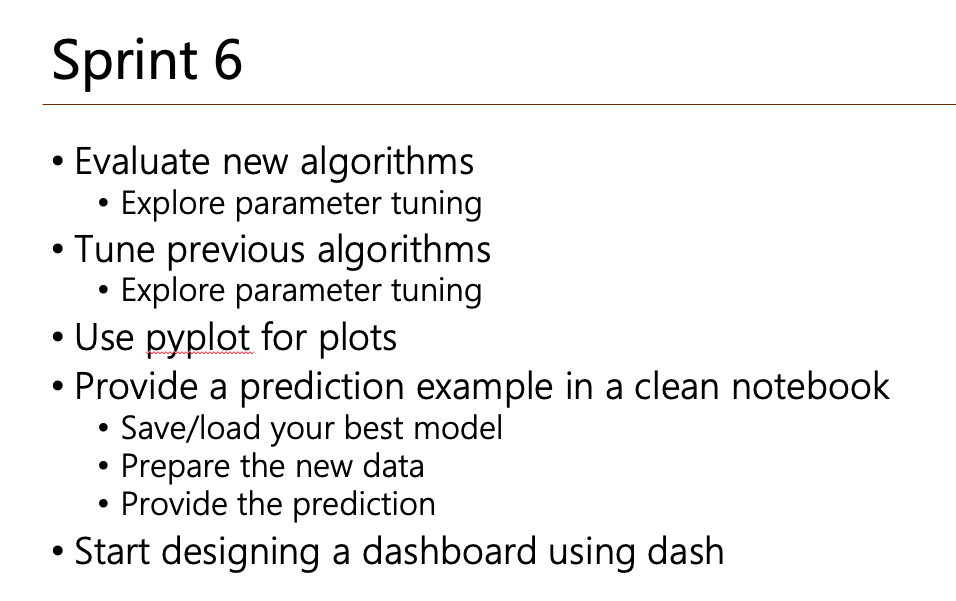

# CATBOOST SECTION

Can work with large and smak datasets.

Can work with Categorical data.

Said to be faster than other gradient boosters.

It has a GPU version

An improvement in overfitting over other Gradient boosters.

Works wekl on hetergeneous data




#  **Brian I started a cell at the bottom for yours?  Move it on top , delete it , whatever you like**

# Usefull links

*   https://colab.research.google.com/github/ahmadkhan242/jupyter_widgets/blob/main/jupyter_widgets.ipynb#scrollTo=UfOucuOo8-Cl

*   https://towardsdatascience.com/4-easy-steps-for-implementing-catboost-c196fd82274b

*   https://medium.com/analytics-vidhya/catboost-101-fb2fdc3398f3

*  https://medium.com/aiplusoau/hyperparameter-tuning-a5fe69d2a6c7






# Library

## Pip Install

In [87]:
from google.colab import output
output.enable_custom_widget_manager()

In [88]:
from google.colab import output
output.disable_custom_widget_manager()

In [89]:
#!pip install catboost

In [90]:
#!pip install ipywidgets

In [91]:
#!jupyter nbextension enable  — py widgetsnbextension

## Packages

In [92]:
import pandas as pd
from ipywidgets import widgets
from IPython.display import display

In [93]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn import metrics 
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Data

In [94]:
dataframe = pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
dataframe.head(3)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.0200,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.500,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.8390,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24
2,2017-03-01,-1.346258,-0.267695,114667.2587,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1099919.669,1083268.231,241130.4555,568447.4880,218640.3600,55049.9274,0.0665,14753.34784,206242.568,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,...,4119152.514,6258157.459,3447128.397,478975.7922,1302860.802,5430241.566,555441.9044,7916686.911,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,814

# Pre Processing

move date to index

Subset data

Change Qty

In [95]:
# move date to 
#df.set_index('month')
dataframe = dataframe.set_index('date')

In [96]:
dataframe = dataframe[[ 'Quantity', 'Seasonal', 'Gray_cement_dispatch_comercial', 'ISE',
       'Construction_lic_area/unt_SIlag_4' ]]

In [97]:
dataframe.at[39,'Quantity'] = -1.3035153046741994

In [98]:
dataframe.head(3)

,Quantity,Seasonal,Gray_cement_dispatch_comercial,ISE,Construction_lic_area/unt_SIlag_4
date,,,,,
2017-01-01,1.503548,0.699923,502084.8330,102.548972,69.107759
2017-02-01,0.076213,0.316156,530826.1625,102.919033,61.576356
2017-03-01,-1.346258,-0.267695,568447.4880,102.162670,57.195909


# Split

In [101]:
y = dataframe['Quantity']
X = dataframe.loc[: ,dataframe.columns != 'Quantity']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

Apply Model
the most important part is to designate your categorical variables, so that you can get the most out of your CatBoost model.

CatBoost has some awesome plots that visualize the error metric improvements over iterations, so if you want to visually see how the train and test set compare over time, setting the plot to True

## Here are the main model commands:

In [103]:
#CAT_FEATURES = [Feature_Names.0] #list of your categorical features



# set up the model
catboost_model = CatBoostRegressor(n_estimators=100,
                                   loss_function = 'RMSE',
                                   eval_metric = 'RMSE')
                                   #cat_features = CAT_FEATURES)

In [ ]:
# fit model
catboost_model.fit(X_train, y_train, 
                   eval_set = (X_test, y_test),
                   use_best_model = True,
                   plot = True)

In [105]:
from google.colab import output
output.enable_custom_widget_manager()

In [106]:
from google.colab import output
output.disable_custom_widget_manager()

In [107]:
# get your predictions
preds = catboost_model.predict(X_test)

In [108]:
preds

array([ 0.43874328, -0.58262884,  0.42949485, -0.1250164 , -0.22791917,
        0.50210145, -0.52849225, -0.33300017, -0.17433587,  0.04908679,
       -0.53776775, -0.91610083,  0.60272138,  0.50227282])

In [109]:
# The data was split 0.75 = Train set
# The X test comes to 13.75 hence the 14  items in "preds"
55 * 0.25


13.75

### B
Here i will attempt to plug in juan;s code

# Juan's functions

In [110]:
def Model_Performance(model,X_train,y_train,X_test, y_test):
     
    model.fit(X_train,y_train) 
    #model.fit(X_train,y_train, verbose = 0)#For Catboost
    y_pred_Train = model.predict(X_train) #Predictions
    y_pred_Test = model.predict(X_test) #Predictions
    
    Metrics(y_test, y_pred_Test)
    
    Predicted_Plot(y_train, y_pred_Train, y_test, y_pred_Test)
    
    Multiple_Runs(model,X_train,y_train,X_test, y_test)
    
    return

In [111]:
def Metrics(y_test, y_pred_Test):
    print('Test Metrics:')
    print('R squared:', metrics.r2_score(y_test, y_pred_Test))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test)))
    
    return

In [112]:
def Predicted_Plot(y_train, y_pred_Train, y_test, y_pred_Test):

    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    ax[0].scatter(y_train, y_pred_Train)
    ax[0].grid()
    ax[0].set_xlabel('Observed Label')
    ax[0].set_ylabel('Predicted Label')
    ax[0].set_title('Training Set')

    ax[1].scatter(y_test, y_pred_Test)
    ax[1].grid()
    ax[1].set_xlabel('Observed Label')
    ax[1].set_ylabel('Predicted Label')
    ax[1].set_title('Testing Set')
    plt.show()
    
    return

In [113]:
def Multiple_Runs(model,X_train,y_train,X_test, y_test):

    Train_MSE = [] #Empty list to Store MSEs for training data set
    Test_MSE = []  #Empty list to Store MSEs for testing data set

    Train_R2 = [] #Empty list to Store R2s for training data set
    Test_R2 = []  #Empty list to Store R2s for testing data set

    for i in tqdm(range(100)):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
        model.fit(X_train, y_train) #Train the model
        #model.fit(X_train,y_train, verbose = 0)#For Catboost    
        y_pred_Train  = model.predict(X_train)  #Predictions on training model
        y_pred_Test   = model.predict(X_test)   #Predictions on testing model
    
        train_R2 = metrics.r2_score(y_train, y_pred_Train) #Obtaining the metrics
        test_R2  = metrics.r2_score(y_test, y_pred_Test)
    
        train_MSE = metrics.mean_squared_error(y_train, y_pred_Train)
        test_MSE  = metrics.mean_squared_error(y_test, y_pred_Test)
    
        Train_MSE.append(train_MSE) #Storing the metrics in the lists
        Test_MSE.append(test_MSE) 
    
        Train_R2.append(train_R2) #Storing the metrics in the lists
        Test_R2.append(test_R2)  
    
    print('Train MSE median:', np.median(Train_MSE))
    print('Test MSE median:', np.median(Test_MSE))

    print('\nTrain_R2 median:', np.median(Train_R2))
    print('Test_R2 median:', np.median(Test_R2))

    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    ax[0].boxplot([Train_MSE, Test_MSE])
    ax[0].set_xticks([1,2],minor = False)                   #setting boxplot names
    ax[0].set_xticklabels(['Train','Test'], minor = False)  #setting boxplot names
    ax[0].grid()
    ax[0].set_title('Mean Squared Error')

    ax[1].boxplot([Train_R2, Test_R2])
    ax[1].set_xticks([1,2],minor = False)
    ax[1].set_xticklabels(['Train','Test'], minor = False)
    ax[1].grid()
    ax[1].set_title('R squared')

    plt.show()

    print('Train MSE standard deviation:', np.std(Train_MSE))
    print('Test MSE standard deviation: ', np.std(Test_MSE))

    print('\nTrain_R2 standard deviation:', np.std(Train_R2))
    print('Test_R2 standard deviation: ', np.std(Test_R2))

## Stadardiztion (Juan's functions will be looking for these)


### Training Set Mean

In [114]:
mean = X_train.mean()
print(mean)

Seasonal                                 -0.007304
Gray_cement_dispatch_comercial       540485.571116
ISE                                     105.707051
Construction_lic_area/unt_SIlag_4        62.605747
dtype: float64


<font color = 'blue'>Training Test Standard Deviation
### 


In [115]:
stdev = X_train.std()
print(stdev)

Seasonal                                 1.050611
Gray_cement_dispatch_comercial       79567.183196
ISE                                      4.942473
Construction_lic_area/unt_SIlag_4        3.488844
dtype: float64


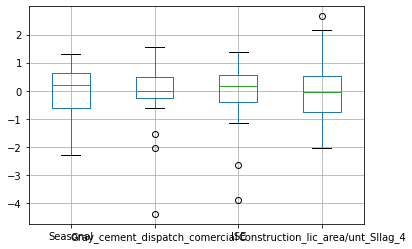

In [116]:
#run without this for KNN first
X_train_st = (X_train - mean)/stdev 
X_train_st.boxplot()

### Test Set preparations, Notice that test is standardized using training set mean and standard deviations

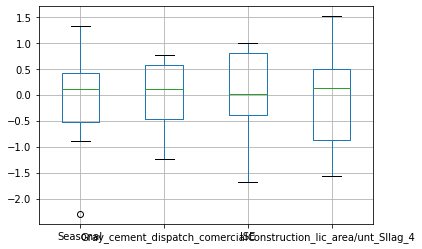

In [117]:
X_test_st = (X_test - mean)/stdev 
X_test_st.boxplot()

Learning rate set to 0.160694
0:	learn: 0.9813696	total: 543us	remaining: 53.8ms
1:	learn: 0.9356888	total: 3.18ms	remaining: 156ms
2:	learn: 0.8875495	total: 4.87ms	remaining: 157ms
3:	learn: 0.8582278	total: 5.96ms	remaining: 143ms
4:	learn: 0.8235573	total: 7.02ms	remaining: 133ms
5:	learn: 0.7946661	total: 8.85ms	remaining: 139ms
6:	learn: 0.7614589	total: 9.3ms	remaining: 124ms
7:	learn: 0.7313558	total: 11.6ms	remaining: 133ms
8:	learn: 0.7013984	total: 12.7ms	remaining: 129ms
9:	learn: 0.6719941	total: 13.7ms	remaining: 124ms
10:	learn: 0.6463130	total: 14.9ms	remaining: 121ms
11:	learn: 0.6214553	total: 15.9ms	remaining: 116ms
12:	learn: 0.5965114	total: 16.5ms	remaining: 110ms
13:	learn: 0.5752500	total: 17.6ms	remaining: 108ms
14:	learn: 0.5527897	total: 18.5ms	remaining: 105ms
15:	learn: 0.5361291	total: 19.5ms	remaining: 102ms
16:	learn: 0.5204020	total: 20.6ms	remaining: 101ms
17:	learn: 0.5055247	total: 21.7ms	remaining: 99ms
18:	learn: 0.4876332	total: 22.8ms	remaining: 

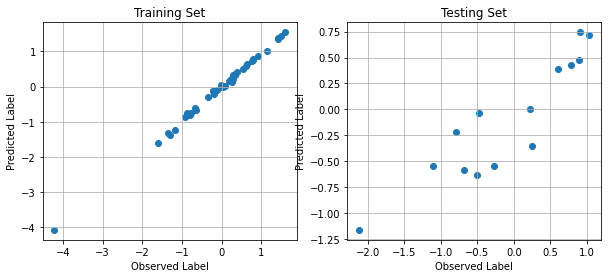

  1%|          | 1/100 [00:00<00:11,  8.86it/s]

Learning rate set to 0.162497
0:	learn: 0.9536340	total: 1.16ms	remaining: 115ms
1:	learn: 0.8980799	total: 1.5ms	remaining: 73.6ms
2:	learn: 0.8445324	total: 1.83ms	remaining: 59.2ms
3:	learn: 0.8030826	total: 2.16ms	remaining: 51.9ms
4:	learn: 0.7604998	total: 2.48ms	remaining: 47.2ms
5:	learn: 0.7261994	total: 2.82ms	remaining: 44.2ms
6:	learn: 0.6877683	total: 3.18ms	remaining: 42.3ms
7:	learn: 0.6578503	total: 3.5ms	remaining: 40.3ms
8:	learn: 0.6243627	total: 3.84ms	remaining: 38.8ms
9:	learn: 0.5946781	total: 4.15ms	remaining: 37.4ms
10:	learn: 0.5726569	total: 4.46ms	remaining: 36.1ms
11:	learn: 0.5513317	total: 4.79ms	remaining: 35.2ms
12:	learn: 0.5292573	total: 5.11ms	remaining: 34.2ms
13:	learn: 0.5125821	total: 5.29ms	remaining: 32.5ms
14:	learn: 0.4979126	total: 5.61ms	remaining: 31.8ms
15:	learn: 0.4801397	total: 5.92ms	remaining: 31.1ms
16:	learn: 0.4621166	total: 6.26ms	remaining: 30.6ms
17:	learn: 0.4394904	total: 6.58ms	remaining: 30ms
18:	learn: 0.4188017	total: 6.9

  3%|▎         | 3/100 [00:00<00:11,  8.81it/s]

Learning rate set to 0.162497
0:	learn: 0.9918958	total: 417us	remaining: 41.3ms
1:	learn: 0.9360113	total: 1.04ms	remaining: 51.1ms
2:	learn: 0.8845282	total: 1.62ms	remaining: 52.4ms
3:	learn: 0.8495191	total: 2.15ms	remaining: 51.6ms
4:	learn: 0.8073022	total: 2.58ms	remaining: 49.1ms
5:	learn: 0.7695115	total: 3.12ms	remaining: 48.9ms
6:	learn: 0.7364352	total: 3.67ms	remaining: 48.7ms
7:	learn: 0.7016197	total: 4.22ms	remaining: 48.6ms
8:	learn: 0.6703484	total: 4.78ms	remaining: 48.4ms
9:	learn: 0.6449970	total: 5.32ms	remaining: 47.9ms
10:	learn: 0.6180599	total: 5.86ms	remaining: 47.4ms
11:	learn: 0.5958704	total: 6.39ms	remaining: 46.8ms
12:	learn: 0.5723594	total: 6.91ms	remaining: 46.2ms
13:	learn: 0.5551414	total: 7.47ms	remaining: 45.9ms
14:	learn: 0.5348313	total: 8ms	remaining: 45.3ms
15:	learn: 0.5168835	total: 8.54ms	remaining: 44.8ms
16:	learn: 0.5025969	total: 9.08ms	remaining: 44.3ms
17:	learn: 0.4834456	total: 9.63ms	remaining: 43.9ms
18:	learn: 0.4656347	total: 10

  5%|▌         | 5/100 [00:00<00:10,  8.86it/s]

Learning rate set to 0.162497
0:	learn: 0.8400253	total: 498us	remaining: 49.4ms
1:	learn: 0.7991382	total: 903us	remaining: 44.2ms
2:	learn: 0.7582594	total: 1.32ms	remaining: 42.6ms
3:	learn: 0.7189814	total: 1.72ms	remaining: 41.3ms
4:	learn: 0.6765143	total: 2.11ms	remaining: 40.1ms
5:	learn: 0.6465921	total: 2.44ms	remaining: 38.2ms
6:	learn: 0.6118293	total: 2.76ms	remaining: 36.7ms
7:	learn: 0.5839962	total: 3.08ms	remaining: 35.4ms
8:	learn: 0.5543154	total: 3.39ms	remaining: 34.3ms
9:	learn: 0.5291492	total: 3.72ms	remaining: 33.5ms
10:	learn: 0.5027723	total: 4.04ms	remaining: 32.7ms
11:	learn: 0.4776616	total: 4.38ms	remaining: 32.1ms
12:	learn: 0.4539731	total: 4.69ms	remaining: 31.4ms
13:	learn: 0.4335578	total: 4.88ms	remaining: 30ms
14:	learn: 0.4123654	total: 5.2ms	remaining: 29.4ms
15:	learn: 0.3907375	total: 5.51ms	remaining: 28.9ms
16:	learn: 0.3770404	total: 5.84ms	remaining: 28.5ms
17:	learn: 0.3578252	total: 6.37ms	remaining: 29ms
18:	learn: 0.3422865	total: 6.88m

  7%|▋         | 7/100 [00:00<00:10,  8.84it/s]

Learning rate set to 0.162497
0:	learn: 0.9520543	total: 436us	remaining: 43.2ms
1:	learn: 0.9134681	total: 807us	remaining: 39.6ms
2:	learn: 0.8660087	total: 1.14ms	remaining: 36.7ms
3:	learn: 0.8429258	total: 1.35ms	remaining: 32.5ms
4:	learn: 0.8044680	total: 1.67ms	remaining: 31.8ms
5:	learn: 0.7700595	total: 2ms	remaining: 31.3ms
6:	learn: 0.7421785	total: 2.32ms	remaining: 30.8ms
7:	learn: 0.7166337	total: 2.63ms	remaining: 30.3ms
8:	learn: 0.6855201	total: 2.96ms	remaining: 30ms
9:	learn: 0.6551734	total: 3.27ms	remaining: 29.5ms
10:	learn: 0.6291428	total: 3.61ms	remaining: 29.2ms
11:	learn: 0.6068578	total: 3.93ms	remaining: 28.9ms
12:	learn: 0.5842649	total: 4.47ms	remaining: 29.9ms
13:	learn: 0.5741030	total: 4.84ms	remaining: 29.8ms
14:	learn: 0.5447691	total: 5.33ms	remaining: 30.2ms
15:	learn: 0.5245299	total: 5.74ms	remaining: 30.2ms
16:	learn: 0.5080868	total: 6.25ms	remaining: 30.5ms
17:	learn: 0.4880975	total: 6.76ms	remaining: 30.8ms
18:	learn: 0.4744560	total: 7.28m

  9%|▉         | 9/100 [00:01<00:10,  8.85it/s]

Learning rate set to 0.162497
0:	learn: 0.9660017	total: 431us	remaining: 42.7ms
1:	learn: 0.9134130	total: 825us	remaining: 40.5ms
2:	learn: 0.8687592	total: 1.38ms	remaining: 44.7ms
3:	learn: 0.8303284	total: 1.93ms	remaining: 46.4ms
4:	learn: 0.7922902	total: 2.41ms	remaining: 45.8ms
5:	learn: 0.7629660	total: 2.96ms	remaining: 46.4ms
6:	learn: 0.7224177	total: 3.54ms	remaining: 47ms
7:	learn: 0.6902768	total: 4.09ms	remaining: 47.1ms
8:	learn: 0.6611085	total: 4.63ms	remaining: 46.8ms
9:	learn: 0.6349672	total: 5.16ms	remaining: 46.4ms
10:	learn: 0.6054210	total: 5.69ms	remaining: 46ms
11:	learn: 0.5859859	total: 6.2ms	remaining: 45.5ms
12:	learn: 0.5657016	total: 6.71ms	remaining: 44.9ms
13:	learn: 0.5486556	total: 7.25ms	remaining: 44.5ms
14:	learn: 0.5298161	total: 7.76ms	remaining: 44ms
15:	learn: 0.5104602	total: 8.23ms	remaining: 43.2ms
16:	learn: 0.4897146	total: 8.75ms	remaining: 42.7ms
17:	learn: 0.4788491	total: 9.26ms	remaining: 42.2ms
18:	learn: 0.4630582	total: 9.79ms	

 11%|█         | 11/100 [00:01<00:10,  8.69it/s]

Learning rate set to 0.162497
0:	learn: 0.9600889	total: 448us	remaining: 44.4ms
1:	learn: 0.9193142	total: 1.06ms	remaining: 52.2ms
2:	learn: 0.8663907	total: 1.6ms	remaining: 51.9ms
3:	learn: 0.8348392	total: 2.62ms	remaining: 62.9ms
4:	learn: 0.7982895	total: 8.55ms	remaining: 163ms
5:	learn: 0.7636977	total: 9.21ms	remaining: 144ms
6:	learn: 0.7331278	total: 9.76ms	remaining: 130ms
7:	learn: 0.7019408	total: 10.3ms	remaining: 118ms
8:	learn: 0.6789996	total: 10.8ms	remaining: 109ms
9:	learn: 0.6510997	total: 11.3ms	remaining: 102ms
10:	learn: 0.6295543	total: 11.8ms	remaining: 95.6ms
11:	learn: 0.6042923	total: 12.6ms	remaining: 92.1ms
12:	learn: 0.5796967	total: 13.1ms	remaining: 87.6ms
13:	learn: 0.5582293	total: 13.6ms	remaining: 83.8ms
14:	learn: 0.5356001	total: 14.1ms	remaining: 79.9ms
15:	learn: 0.5146073	total: 14.6ms	remaining: 76.8ms
16:	learn: 0.4997704	total: 15.2ms	remaining: 74.1ms
17:	learn: 0.4822646	total: 15.7ms	remaining: 71.5ms
18:	learn: 0.4670335	total: 16.2ms

 13%|█▎        | 13/100 [00:01<00:09,  8.71it/s]

Learning rate set to 0.162497
0:	learn: 0.8341286	total: 613us	remaining: 60.7ms
1:	learn: 0.7783322	total: 1.9ms	remaining: 93.1ms
2:	learn: 0.7350945	total: 2.62ms	remaining: 84.7ms
3:	learn: 0.6917950	total: 3.18ms	remaining: 76.3ms
4:	learn: 0.6524444	total: 3.74ms	remaining: 71.1ms
5:	learn: 0.6254726	total: 4.31ms	remaining: 67.5ms
6:	learn: 0.5991412	total: 4.67ms	remaining: 62ms
7:	learn: 0.5694799	total: 5.2ms	remaining: 59.7ms
8:	learn: 0.5420679	total: 5.74ms	remaining: 58ms
9:	learn: 0.5130086	total: 6.26ms	remaining: 56.3ms
10:	learn: 0.4891135	total: 6.79ms	remaining: 54.9ms
11:	learn: 0.4692929	total: 7.29ms	remaining: 53.4ms
12:	learn: 0.4440184	total: 7.81ms	remaining: 52.3ms
13:	learn: 0.4231064	total: 8.34ms	remaining: 51.2ms
14:	learn: 0.4079547	total: 8.87ms	remaining: 50.3ms
15:	learn: 0.3956403	total: 9.39ms	remaining: 49.3ms
16:	learn: 0.3783867	total: 9.9ms	remaining: 48.4ms
17:	learn: 0.3648408	total: 10.4ms	remaining: 47.5ms
18:	learn: 0.3503747	total: 10.9ms

 15%|█▌        | 15/100 [00:01<00:10,  8.29it/s]

Learning rate set to 0.162497
0:	learn: 0.9980440	total: 624us	remaining: 61.8ms
1:	learn: 0.9510332	total: 1.32ms	remaining: 64.5ms
2:	learn: 0.9003757	total: 1.93ms	remaining: 62.4ms
3:	learn: 0.8640595	total: 2.43ms	remaining: 58.3ms
4:	learn: 0.8246601	total: 4.02ms	remaining: 76.3ms
5:	learn: 0.7869952	total: 4.5ms	remaining: 70.5ms
6:	learn: 0.7465044	total: 4.95ms	remaining: 65.8ms
7:	learn: 0.7144711	total: 5.47ms	remaining: 62.9ms
8:	learn: 0.6842574	total: 7.41ms	remaining: 74.9ms
9:	learn: 0.6541839	total: 8.14ms	remaining: 73.3ms
10:	learn: 0.6358499	total: 8.54ms	remaining: 69.1ms
11:	learn: 0.6098298	total: 9.43ms	remaining: 69.1ms
12:	learn: 0.5823984	total: 10.1ms	remaining: 67.7ms
13:	learn: 0.5589234	total: 10.7ms	remaining: 65.5ms
14:	learn: 0.5443057	total: 11.5ms	remaining: 65.1ms
15:	learn: 0.5290338	total: 12.1ms	remaining: 63.3ms
16:	learn: 0.5085928	total: 12.7ms	remaining: 62.1ms
17:	learn: 0.4914576	total: 13.2ms	remaining: 60.4ms
18:	learn: 0.4791622	total: 

 17%|█▋        | 17/100 [00:01<00:09,  8.30it/s]

Learning rate set to 0.162497
0:	learn: 0.8133644	total: 3.85ms	remaining: 381ms
1:	learn: 0.7545806	total: 5.1ms	remaining: 250ms
2:	learn: 0.7113070	total: 6.07ms	remaining: 196ms
3:	learn: 0.6758011	total: 6.99ms	remaining: 168ms
4:	learn: 0.6388828	total: 7.49ms	remaining: 142ms
5:	learn: 0.6084251	total: 8.07ms	remaining: 126ms
6:	learn: 0.5786153	total: 8.61ms	remaining: 114ms
7:	learn: 0.5458956	total: 9.16ms	remaining: 105ms
8:	learn: 0.5155885	total: 9.71ms	remaining: 98.2ms
9:	learn: 0.4866680	total: 10.4ms	remaining: 93.3ms
10:	learn: 0.4616556	total: 11ms	remaining: 88.9ms
11:	learn: 0.4413013	total: 11.5ms	remaining: 84.6ms
12:	learn: 0.4173130	total: 12.2ms	remaining: 81.4ms
13:	learn: 0.3949099	total: 12.7ms	remaining: 78.3ms
14:	learn: 0.3752552	total: 13.3ms	remaining: 75.3ms
15:	learn: 0.3582902	total: 13.8ms	remaining: 72.6ms
16:	learn: 0.3424053	total: 14.4ms	remaining: 70.1ms
17:	learn: 0.3286585	total: 14.9ms	remaining: 67.8ms
18:	learn: 0.3151937	total: 15.4ms	re

 20%|██        | 20/100 [00:02<00:08,  8.92it/s]

Learning rate set to 0.162497
0:	learn: 0.9785757	total: 526us	remaining: 52.1ms
1:	learn: 0.9316582	total: 895us	remaining: 43.9ms
2:	learn: 0.8909658	total: 1.47ms	remaining: 47.6ms
3:	learn: 0.8736983	total: 1.89ms	remaining: 45.3ms
4:	learn: 0.8336107	total: 2.41ms	remaining: 45.8ms
5:	learn: 0.7995097	total: 2.94ms	remaining: 46ms
6:	learn: 0.7640898	total: 3.48ms	remaining: 46.2ms
7:	learn: 0.7324875	total: 3.98ms	remaining: 45.7ms
8:	learn: 0.7069220	total: 4.49ms	remaining: 45.4ms
9:	learn: 0.6706009	total: 5.01ms	remaining: 45.1ms
10:	learn: 0.6418781	total: 5.51ms	remaining: 44.6ms
11:	learn: 0.6183667	total: 6.02ms	remaining: 44.2ms
12:	learn: 0.5908083	total: 6.54ms	remaining: 43.7ms
13:	learn: 0.5691121	total: 7.04ms	remaining: 43.3ms
14:	learn: 0.5488825	total: 7.72ms	remaining: 43.7ms
15:	learn: 0.5270033	total: 8.63ms	remaining: 45.3ms
16:	learn: 0.5048116	total: 9.23ms	remaining: 45.1ms
17:	learn: 0.4868053	total: 9.93ms	remaining: 45.2ms
18:	learn: 0.4725671	total: 10

 21%|██        | 21/100 [00:02<00:09,  8.73it/s]

Learning rate set to 0.162497
0:	learn: 0.9922395	total: 1.03ms	remaining: 102ms
1:	learn: 0.9474429	total: 1.48ms	remaining: 72.4ms
2:	learn: 0.8965873	total: 1.84ms	remaining: 59.4ms
3:	learn: 0.8621570	total: 2.34ms	remaining: 56.1ms
4:	learn: 0.8160094	total: 2.71ms	remaining: 51.4ms
5:	learn: 0.7785791	total: 3.18ms	remaining: 49.9ms
6:	learn: 0.7496556	total: 3.56ms	remaining: 47.2ms
7:	learn: 0.7158064	total: 3.91ms	remaining: 44.9ms
8:	learn: 0.6815996	total: 4.41ms	remaining: 44.6ms
9:	learn: 0.6548168	total: 16.4ms	remaining: 147ms
10:	learn: 0.6347843	total: 17.6ms	remaining: 142ms
11:	learn: 0.6064885	total: 20.8ms	remaining: 152ms
12:	learn: 0.5740455	total: 21.1ms	remaining: 141ms
13:	learn: 0.5500584	total: 21.4ms	remaining: 131ms
14:	learn: 0.5250757	total: 22.5ms	remaining: 128ms
15:	learn: 0.5045252	total: 23.1ms	remaining: 121ms
16:	learn: 0.4797273	total: 23.7ms	remaining: 116ms
17:	learn: 0.4681105	total: 24.2ms	remaining: 110ms
18:	learn: 0.4493667	total: 24.7ms	r

 23%|██▎       | 23/100 [00:02<00:08,  8.92it/s]

Learning rate set to 0.162497
0:	learn: 0.7679091	total: 406us	remaining: 40.2ms
1:	learn: 0.7197399	total: 837us	remaining: 41.1ms
2:	learn: 0.6793645	total: 1.43ms	remaining: 46.2ms
3:	learn: 0.6491757	total: 1.95ms	remaining: 46.7ms
4:	learn: 0.6158185	total: 2.63ms	remaining: 50.1ms
5:	learn: 0.5957743	total: 3.21ms	remaining: 50.3ms
6:	learn: 0.5654658	total: 3.75ms	remaining: 49.9ms
7:	learn: 0.5365324	total: 4.27ms	remaining: 49.1ms
8:	learn: 0.5148666	total: 4.8ms	remaining: 48.6ms
9:	learn: 0.4909430	total: 5.52ms	remaining: 49.6ms
10:	learn: 0.4675783	total: 6.05ms	remaining: 49ms
11:	learn: 0.4476621	total: 6.57ms	remaining: 48.1ms
12:	learn: 0.4295396	total: 7.09ms	remaining: 47.5ms
13:	learn: 0.4112398	total: 7.48ms	remaining: 46ms
14:	learn: 0.3990697	total: 8.01ms	remaining: 45.4ms
15:	learn: 0.3817504	total: 8.54ms	remaining: 44.8ms
16:	learn: 0.3678152	total: 9.25ms	remaining: 45.2ms
17:	learn: 0.3459948	total: 9.82ms	remaining: 44.8ms
18:	learn: 0.3313740	total: 10.4m

 25%|██▌       | 25/100 [00:02<00:09,  8.27it/s]

Learning rate set to 0.162497
0:	learn: 0.9727750	total: 412us	remaining: 40.9ms
1:	learn: 0.9249153	total: 2.13ms	remaining: 104ms
2:	learn: 0.8695152	total: 3.11ms	remaining: 100ms
3:	learn: 0.8365573	total: 3.96ms	remaining: 95.1ms
4:	learn: 0.7939451	total: 4.43ms	remaining: 84.1ms
5:	learn: 0.7614017	total: 4.96ms	remaining: 77.7ms
6:	learn: 0.7258959	total: 5.51ms	remaining: 73.3ms
7:	learn: 0.6962874	total: 6.05ms	remaining: 69.6ms
8:	learn: 0.6608124	total: 6.57ms	remaining: 66.4ms
9:	learn: 0.6321808	total: 6.94ms	remaining: 62.4ms
10:	learn: 0.6058659	total: 7.47ms	remaining: 60.4ms
11:	learn: 0.5907122	total: 8.01ms	remaining: 58.8ms
12:	learn: 0.5676398	total: 8.54ms	remaining: 57.1ms
13:	learn: 0.5462710	total: 9.06ms	remaining: 55.7ms
14:	learn: 0.5287906	total: 9.58ms	remaining: 54.3ms
15:	learn: 0.5166277	total: 9.97ms	remaining: 52.4ms
16:	learn: 0.4987023	total: 10.5ms	remaining: 51.4ms
17:	learn: 0.4835363	total: 11.2ms	remaining: 51.2ms
18:	learn: 0.4714758	total: 1

 27%|██▋       | 27/100 [00:03<00:08,  8.45it/s]

Learning rate set to 0.162497
0:	learn: 0.9375208	total: 426us	remaining: 42.2ms
1:	learn: 0.8821422	total: 2.2ms	remaining: 108ms
2:	learn: 0.8357933	total: 3.21ms	remaining: 104ms
3:	learn: 0.8131003	total: 3.64ms	remaining: 87.3ms
4:	learn: 0.7742311	total: 4.2ms	remaining: 79.8ms
5:	learn: 0.7369577	total: 4.78ms	remaining: 74.9ms
6:	learn: 0.7057223	total: 5.31ms	remaining: 70.6ms
7:	learn: 0.6758949	total: 5.84ms	remaining: 67.1ms
8:	learn: 0.6520546	total: 6.4ms	remaining: 64.7ms
9:	learn: 0.6224489	total: 6.92ms	remaining: 62.3ms
10:	learn: 0.6082307	total: 7.3ms	remaining: 59ms
11:	learn: 0.5848274	total: 7.82ms	remaining: 57.4ms
12:	learn: 0.5643252	total: 8.32ms	remaining: 55.7ms
13:	learn: 0.5453110	total: 8.84ms	remaining: 54.3ms
14:	learn: 0.5262661	total: 9.34ms	remaining: 52.9ms
15:	learn: 0.5080973	total: 9.73ms	remaining: 51.1ms
16:	learn: 0.4908542	total: 10.3ms	remaining: 50.1ms
17:	learn: 0.4708665	total: 10.8ms	remaining: 49.1ms
18:	learn: 0.4530655	total: 11.3ms	

 29%|██▉       | 29/100 [00:03<00:08,  8.56it/s]

Learning rate set to 0.162497
0:	learn: 0.9632765	total: 380us	remaining: 37.7ms
1:	learn: 0.9124773	total: 969us	remaining: 47.5ms
2:	learn: 0.8750404	total: 1.52ms	remaining: 49.1ms
3:	learn: 0.8442432	total: 2.02ms	remaining: 48.6ms
4:	learn: 0.8074210	total: 2.46ms	remaining: 46.8ms
5:	learn: 0.7811804	total: 2.98ms	remaining: 46.6ms
6:	learn: 0.7458694	total: 3.49ms	remaining: 46.4ms
7:	learn: 0.7119206	total: 4.01ms	remaining: 46.1ms
8:	learn: 0.6835171	total: 4.53ms	remaining: 45.8ms
9:	learn: 0.6601375	total: 5.05ms	remaining: 45.5ms
10:	learn: 0.6306418	total: 5.69ms	remaining: 46.1ms
11:	learn: 0.6077139	total: 6.28ms	remaining: 46ms
12:	learn: 0.5863810	total: 6.87ms	remaining: 46ms
13:	learn: 0.5656541	total: 7.4ms	remaining: 45.5ms
14:	learn: 0.5460679	total: 7.91ms	remaining: 44.8ms
15:	learn: 0.5234983	total: 8.41ms	remaining: 44.2ms
16:	learn: 0.5102696	total: 8.97ms	remaining: 43.8ms
17:	learn: 0.4924525	total: 9.49ms	remaining: 43.2ms
18:	learn: 0.4753509	total: 10ms	

 31%|███       | 31/100 [00:03<00:07,  8.64it/s]

Learning rate set to 0.162497
0:	learn: 0.9674631	total: 411us	remaining: 40.7ms
1:	learn: 0.9110561	total: 770us	remaining: 37.7ms
2:	learn: 0.8552163	total: 1.1ms	remaining: 35.7ms
3:	learn: 0.8263873	total: 1.45ms	remaining: 34.7ms
4:	learn: 0.7835542	total: 1.77ms	remaining: 33.7ms
5:	learn: 0.7462199	total: 2.1ms	remaining: 33ms
6:	learn: 0.7106643	total: 2.44ms	remaining: 32.4ms
7:	learn: 0.6812101	total: 2.76ms	remaining: 31.8ms
8:	learn: 0.6525570	total: 3.3ms	remaining: 33.4ms
9:	learn: 0.6235962	total: 3.81ms	remaining: 34.3ms
10:	learn: 0.6020533	total: 4.34ms	remaining: 35.1ms
11:	learn: 0.5791968	total: 4.86ms	remaining: 35.6ms
12:	learn: 0.5621815	total: 5.34ms	remaining: 35.8ms
13:	learn: 0.5461148	total: 5.88ms	remaining: 36.2ms
14:	learn: 0.5285234	total: 6.38ms	remaining: 36.2ms
15:	learn: 0.5135495	total: 6.89ms	remaining: 36.2ms
16:	learn: 0.4965087	total: 7.43ms	remaining: 36.3ms
17:	learn: 0.4830480	total: 7.93ms	remaining: 36.1ms
18:	learn: 0.4718423	total: 8.48m

 34%|███▍      | 34/100 [00:03<00:07,  8.91it/s]

Learning rate set to 0.162497
0:	learn: 1.0270675	total: 419us	remaining: 41.5ms
1:	learn: 0.9672562	total: 1.05ms	remaining: 51.3ms
2:	learn: 0.9095956	total: 1.59ms	remaining: 51.5ms
3:	learn: 0.8810152	total: 1.99ms	remaining: 47.7ms
4:	learn: 0.8362251	total: 2.49ms	remaining: 47.4ms
5:	learn: 0.7950852	total: 3.04ms	remaining: 47.7ms
6:	learn: 0.7603786	total: 3.6ms	remaining: 47.9ms
7:	learn: 0.7267509	total: 4.12ms	remaining: 47.4ms
8:	learn: 0.6987883	total: 4.66ms	remaining: 47.1ms
9:	learn: 0.6656153	total: 5.18ms	remaining: 46.6ms
10:	learn: 0.6366424	total: 5.7ms	remaining: 46.1ms
11:	learn: 0.6126108	total: 6.23ms	remaining: 45.7ms
12:	learn: 0.5824679	total: 6.74ms	remaining: 45.1ms
13:	learn: 0.5640497	total: 7.15ms	remaining: 43.9ms
14:	learn: 0.5385493	total: 7.64ms	remaining: 43.3ms
15:	learn: 0.5170963	total: 8.15ms	remaining: 42.8ms
16:	learn: 0.4968904	total: 8.68ms	remaining: 42.4ms
17:	learn: 0.4766960	total: 9.18ms	remaining: 41.8ms
18:	learn: 0.4546424	total: 9

 35%|███▌      | 35/100 [00:04<00:07,  8.89it/s]

Learning rate set to 0.162497
0:	learn: 0.9942122	total: 684us	remaining: 67.7ms
1:	learn: 0.9336535	total: 1.05ms	remaining: 51.3ms
2:	learn: 0.8834258	total: 1.39ms	remaining: 45ms
3:	learn: 0.8440731	total: 1.83ms	remaining: 44ms
4:	learn: 0.8046671	total: 2.22ms	remaining: 42.3ms
5:	learn: 0.7696051	total: 2.58ms	remaining: 40.4ms
6:	learn: 0.7323357	total: 2.9ms	remaining: 38.6ms
7:	learn: 0.7002765	total: 3.23ms	remaining: 37.2ms
8:	learn: 0.6626638	total: 3.57ms	remaining: 36.1ms
9:	learn: 0.6333664	total: 3.89ms	remaining: 35ms
10:	learn: 0.6078083	total: 4.23ms	remaining: 34.2ms
11:	learn: 0.5838089	total: 4.54ms	remaining: 33.3ms
12:	learn: 0.5631922	total: 4.85ms	remaining: 32.5ms
13:	learn: 0.5462753	total: 5.18ms	remaining: 31.8ms
14:	learn: 0.5261611	total: 5.48ms	remaining: 31ms
15:	learn: 0.5092612	total: 5.83ms	remaining: 30.6ms
16:	learn: 0.4894748	total: 6.14ms	remaining: 30ms
17:	learn: 0.4724273	total: 6.46ms	remaining: 29.4ms
18:	learn: 0.4622014	total: 6.78ms	rem

 37%|███▋      | 37/100 [00:04<00:07,  8.68it/s]

Learning rate set to 0.162497
0:	learn: 0.8393347	total: 583us	remaining: 57.8ms
1:	learn: 0.7956895	total: 1.38ms	remaining: 67.7ms
2:	learn: 0.7478009	total: 2.49ms	remaining: 80.6ms
3:	learn: 0.7079154	total: 3.04ms	remaining: 72.9ms
4:	learn: 0.6654044	total: 3.45ms	remaining: 65.6ms
5:	learn: 0.6382048	total: 4.1ms	remaining: 64.3ms
6:	learn: 0.6093755	total: 4.48ms	remaining: 59.5ms
7:	learn: 0.5795783	total: 5.02ms	remaining: 57.8ms
8:	learn: 0.5527088	total: 5.54ms	remaining: 56.1ms
9:	learn: 0.5232994	total: 6.08ms	remaining: 54.7ms
10:	learn: 0.4967183	total: 6.59ms	remaining: 53.3ms
11:	learn: 0.4770629	total: 7.3ms	remaining: 53.6ms
12:	learn: 0.4538979	total: 8.02ms	remaining: 53.7ms
13:	learn: 0.4344110	total: 8.6ms	remaining: 52.8ms
14:	learn: 0.4164413	total: 9.29ms	remaining: 52.6ms
15:	learn: 0.4025542	total: 9.85ms	remaining: 51.7ms
16:	learn: 0.3832102	total: 10.4ms	remaining: 50.7ms
17:	learn: 0.3706280	total: 10.9ms	remaining: 49.9ms
18:	learn: 0.3572844	total: 11

 39%|███▉      | 39/100 [00:04<00:07,  8.54it/s]

Learning rate set to 0.162497
0:	learn: 1.0134531	total: 540us	remaining: 53.5ms
1:	learn: 0.9591519	total: 911us	remaining: 44.7ms
2:	learn: 0.9098048	total: 1.4ms	remaining: 45.2ms
3:	learn: 0.8739529	total: 2.87ms	remaining: 68.8ms
4:	learn: 0.8362954	total: 3.29ms	remaining: 62.5ms
5:	learn: 0.7966736	total: 3.86ms	remaining: 60.5ms
6:	learn: 0.7532800	total: 4.2ms	remaining: 55.8ms
7:	learn: 0.7145535	total: 4.54ms	remaining: 52.2ms
8:	learn: 0.6826344	total: 4.85ms	remaining: 49ms
9:	learn: 0.6537043	total: 5.28ms	remaining: 47.5ms
10:	learn: 0.6220087	total: 5.74ms	remaining: 46.5ms
11:	learn: 0.5985689	total: 6.26ms	remaining: 45.9ms
12:	learn: 0.5766646	total: 11.6ms	remaining: 77.4ms
13:	learn: 0.5570081	total: 11.9ms	remaining: 73ms
14:	learn: 0.5384093	total: 12.2ms	remaining: 69.1ms
15:	learn: 0.5237334	total: 12.5ms	remaining: 65.5ms
16:	learn: 0.4994927	total: 12.8ms	remaining: 62.4ms
17:	learn: 0.4840176	total: 14.4ms	remaining: 65.4ms
18:	learn: 0.4702973	total: 15ms	r

 41%|████      | 41/100 [00:04<00:07,  8.32it/s]

Learning rate set to 0.162497
0:	learn: 0.9540741	total: 484us	remaining: 48ms
1:	learn: 0.9031429	total: 1.08ms	remaining: 53ms
2:	learn: 0.8543208	total: 1.62ms	remaining: 52.4ms
3:	learn: 0.8181501	total: 2.19ms	remaining: 52.6ms
4:	learn: 0.7805280	total: 2.64ms	remaining: 50.2ms
5:	learn: 0.7433858	total: 3.16ms	remaining: 49.5ms
6:	learn: 0.7045797	total: 3.7ms	remaining: 49.1ms
7:	learn: 0.6752070	total: 4.22ms	remaining: 48.6ms
8:	learn: 0.6430195	total: 4.73ms	remaining: 47.8ms
9:	learn: 0.6157285	total: 5.3ms	remaining: 47.7ms
10:	learn: 0.5866244	total: 5.85ms	remaining: 47.3ms
11:	learn: 0.5673245	total: 6.39ms	remaining: 46.9ms
12:	learn: 0.5409372	total: 7.1ms	remaining: 47.5ms
13:	learn: 0.5252657	total: 7.7ms	remaining: 47.3ms
14:	learn: 0.5041660	total: 8.28ms	remaining: 46.9ms
15:	learn: 0.4874441	total: 8.86ms	remaining: 46.5ms
16:	learn: 0.4699804	total: 9.45ms	remaining: 46.1ms
17:	learn: 0.4563216	total: 10ms	remaining: 45.7ms
18:	learn: 0.4459668	total: 10.9ms	re

 43%|████▎     | 43/100 [00:05<00:07,  8.11it/s]

76:	learn: 0.0908569	total: 56.1ms	remaining: 16.7ms
77:	learn: 0.0884524	total: 56.5ms	remaining: 15.9ms
78:	learn: 0.0868445	total: 57ms	remaining: 15.2ms
79:	learn: 0.0841358	total: 62.5ms	remaining: 15.6ms
80:	learn: 0.0811428	total: 63.9ms	remaining: 15ms
81:	learn: 0.0779825	total: 64.3ms	remaining: 14.1ms
82:	learn: 0.0757857	total: 64.9ms	remaining: 13.3ms
83:	learn: 0.0749653	total: 65.7ms	remaining: 12.5ms
84:	learn: 0.0732265	total: 66.2ms	remaining: 11.7ms
85:	learn: 0.0714734	total: 66.8ms	remaining: 10.9ms
86:	learn: 0.0690955	total: 67.1ms	remaining: 10ms
87:	learn: 0.0669186	total: 67.6ms	remaining: 9.22ms
88:	learn: 0.0661957	total: 68.2ms	remaining: 8.43ms
89:	learn: 0.0655328	total: 68.7ms	remaining: 7.63ms
90:	learn: 0.0639965	total: 69.2ms	remaining: 6.85ms
91:	learn: 0.0627351	total: 69.8ms	remaining: 6.07ms
92:	learn: 0.0614496	total: 70.1ms	remaining: 5.27ms
93:	learn: 0.0593237	total: 70.7ms	remaining: 4.51ms
94:	learn: 0.0568111	total: 71.3ms	remaining: 3.75ms

 44%|████▍     | 44/100 [00:05<00:07,  7.92it/s]

9:	learn: 0.6339108	total: 7.1ms	remaining: 63.9ms
10:	learn: 0.6082038	total: 7.53ms	remaining: 60.9ms
11:	learn: 0.5856676	total: 7.95ms	remaining: 58.3ms
12:	learn: 0.5606752	total: 8.37ms	remaining: 56ms
13:	learn: 0.5404451	total: 9.35ms	remaining: 57.4ms
14:	learn: 0.5187548	total: 9.79ms	remaining: 55.5ms
15:	learn: 0.4968691	total: 11.5ms	remaining: 60.3ms
16:	learn: 0.4800913	total: 11.9ms	remaining: 58.3ms
17:	learn: 0.4570064	total: 12.3ms	remaining: 56.3ms
18:	learn: 0.4393775	total: 12.7ms	remaining: 54.3ms
19:	learn: 0.4242349	total: 13.2ms	remaining: 52.7ms
20:	learn: 0.4103284	total: 13.6ms	remaining: 51.2ms
21:	learn: 0.3978860	total: 14ms	remaining: 49.7ms
22:	learn: 0.3831970	total: 14.4ms	remaining: 48.2ms
23:	learn: 0.3693117	total: 14.8ms	remaining: 46.9ms
24:	learn: 0.3555229	total: 15.5ms	remaining: 46.5ms
25:	learn: 0.3456043	total: 15.9ms	remaining: 45.3ms
26:	learn: 0.3401377	total: 16.1ms	remaining: 43.5ms
27:	learn: 0.3320216	total: 16.5ms	remaining: 42.4ms

 46%|████▌     | 46/100 [00:05<00:06,  7.99it/s]

Learning rate set to 0.162497
0:	learn: 0.9305852	total: 455us	remaining: 45.1ms
1:	learn: 0.8815566	total: 1.25ms	remaining: 61.4ms
2:	learn: 0.8346167	total: 5.31ms	remaining: 172ms
3:	learn: 0.8168974	total: 5.89ms	remaining: 141ms
4:	learn: 0.7782360	total: 6.59ms	remaining: 125ms
5:	learn: 0.7426698	total: 6.89ms	remaining: 108ms
6:	learn: 0.7063209	total: 7.21ms	remaining: 95.8ms
7:	learn: 0.6766227	total: 8.69ms	remaining: 100ms
8:	learn: 0.6561558	total: 9.22ms	remaining: 93.2ms
9:	learn: 0.6221894	total: 9.55ms	remaining: 85.9ms
10:	learn: 0.5975119	total: 10.6ms	remaining: 85.9ms
11:	learn: 0.5767939	total: 11.2ms	remaining: 81.9ms
12:	learn: 0.5525975	total: 11.5ms	remaining: 76.7ms
13:	learn: 0.5376441	total: 11.8ms	remaining: 72.2ms
14:	learn: 0.5176481	total: 12.7ms	remaining: 71.9ms
15:	learn: 0.5003698	total: 13.2ms	remaining: 69.3ms
16:	learn: 0.4830435	total: 13.7ms	remaining: 67.1ms
17:	learn: 0.4660864	total: 14.3ms	remaining: 65ms
18:	learn: 0.4528471	total: 14.8ms

 48%|████▊     | 48/100 [00:05<00:06,  8.58it/s]

Learning rate set to 0.162497
0:	learn: 0.8054677	total: 428us	remaining: 42.4ms
1:	learn: 0.7616259	total: 774us	remaining: 37.9ms
2:	learn: 0.7206227	total: 1.14ms	remaining: 36.7ms
3:	learn: 0.6837869	total: 1.47ms	remaining: 35.2ms
4:	learn: 0.6395719	total: 1.81ms	remaining: 34.4ms
5:	learn: 0.6084438	total: 2.15ms	remaining: 33.7ms
6:	learn: 0.5764078	total: 2.48ms	remaining: 32.9ms
7:	learn: 0.5522123	total: 2.81ms	remaining: 32.3ms
8:	learn: 0.5263886	total: 3.14ms	remaining: 31.7ms
9:	learn: 0.5015795	total: 3.46ms	remaining: 31.1ms
10:	learn: 0.4736079	total: 3.78ms	remaining: 30.6ms
11:	learn: 0.4545047	total: 4.11ms	remaining: 30.1ms
12:	learn: 0.4335642	total: 4.42ms	remaining: 29.6ms
13:	learn: 0.4170825	total: 4.61ms	remaining: 28.3ms
14:	learn: 0.3977683	total: 4.93ms	remaining: 28ms
15:	learn: 0.3800891	total: 5.25ms	remaining: 27.6ms
16:	learn: 0.3650238	total: 5.58ms	remaining: 27.2ms
17:	learn: 0.3465143	total: 5.91ms	remaining: 26.9ms
18:	learn: 0.3358208	total: 6.

 50%|█████     | 50/100 [00:05<00:05,  8.48it/s]

Learning rate set to 0.162497
0:	learn: 0.7825414	total: 422us	remaining: 41.8ms
1:	learn: 0.7369873	total: 1.05ms	remaining: 51.3ms
2:	learn: 0.6899882	total: 2.24ms	remaining: 72.4ms
3:	learn: 0.6539437	total: 2.82ms	remaining: 67.7ms
4:	learn: 0.6225879	total: 3.35ms	remaining: 63.8ms
5:	learn: 0.5995531	total: 3.91ms	remaining: 61.2ms
6:	learn: 0.5708568	total: 4.45ms	remaining: 59.2ms
7:	learn: 0.5387022	total: 4.98ms	remaining: 57.3ms
8:	learn: 0.5161382	total: 5.52ms	remaining: 55.8ms
9:	learn: 0.4959275	total: 6.22ms	remaining: 56ms
10:	learn: 0.4708518	total: 6.99ms	remaining: 56.6ms
11:	learn: 0.4539838	total: 7.54ms	remaining: 55.3ms
12:	learn: 0.4350935	total: 8.11ms	remaining: 54.3ms
13:	learn: 0.4177863	total: 8.65ms	remaining: 53.1ms
14:	learn: 0.3985245	total: 9.21ms	remaining: 52.2ms
15:	learn: 0.3818178	total: 9.74ms	remaining: 51.1ms
16:	learn: 0.3667289	total: 10.3ms	remaining: 50.2ms
17:	learn: 0.3519743	total: 10.8ms	remaining: 49.3ms
18:	learn: 0.3357569	total: 1

 52%|█████▏    | 52/100 [00:06<00:05,  8.22it/s]

Learning rate set to 0.162497
0:	learn: 0.9865324	total: 415us	remaining: 41.1ms
1:	learn: 0.9456585	total: 1.36ms	remaining: 66.8ms
2:	learn: 0.8933022	total: 8.03ms	remaining: 260ms
3:	learn: 0.8674063	total: 8.31ms	remaining: 200ms
4:	learn: 0.8230487	total: 8.91ms	remaining: 169ms
5:	learn: 0.7813545	total: 9.65ms	remaining: 151ms
6:	learn: 0.7492785	total: 10.2ms	remaining: 136ms
7:	learn: 0.7177364	total: 10.8ms	remaining: 124ms
8:	learn: 0.6927200	total: 11.4ms	remaining: 115ms
9:	learn: 0.6623918	total: 12ms	remaining: 108ms
10:	learn: 0.6365827	total: 12.6ms	remaining: 102ms
11:	learn: 0.6140511	total: 13.1ms	remaining: 96ms
12:	learn: 0.5893789	total: 13.6ms	remaining: 91.2ms
13:	learn: 0.5677293	total: 14.2ms	remaining: 87.1ms
14:	learn: 0.5513482	total: 14.7ms	remaining: 83.1ms
15:	learn: 0.5320968	total: 15.2ms	remaining: 79.9ms
16:	learn: 0.5085951	total: 15.7ms	remaining: 76.9ms
17:	learn: 0.4955106	total: 16.3ms	remaining: 74.1ms
18:	learn: 0.4837742	total: 16.8ms	remai

 54%|█████▍    | 54/100 [00:06<00:05,  7.83it/s]

78:	learn: 0.0439633	total: 52.5ms	remaining: 14ms
79:	learn: 0.0433972	total: 53.1ms	remaining: 13.3ms
80:	learn: 0.0417150	total: 53.6ms	remaining: 12.6ms
81:	learn: 0.0404726	total: 54.6ms	remaining: 12ms
82:	learn: 0.0400063	total: 55.2ms	remaining: 11.3ms
83:	learn: 0.0395819	total: 55.6ms	remaining: 10.6ms
84:	learn: 0.0387417	total: 66.4ms	remaining: 11.7ms
85:	learn: 0.0372051	total: 68.2ms	remaining: 11.1ms
86:	learn: 0.0360496	total: 69ms	remaining: 10.3ms
87:	learn: 0.0350002	total: 69.7ms	remaining: 9.51ms
88:	learn: 0.0338819	total: 70.1ms	remaining: 8.67ms
89:	learn: 0.0328160	total: 70.7ms	remaining: 7.85ms
90:	learn: 0.0312900	total: 71.3ms	remaining: 7.05ms
91:	learn: 0.0299655	total: 71.9ms	remaining: 6.25ms
92:	learn: 0.0291775	total: 72.4ms	remaining: 5.45ms
93:	learn: 0.0283845	total: 72.9ms	remaining: 4.65ms
94:	learn: 0.0276376	total: 73.5ms	remaining: 3.87ms
95:	learn: 0.0271832	total: 74ms	remaining: 3.08ms
96:	learn: 0.0267459	total: 74.7ms	remaining: 2.31ms
9

 55%|█████▌    | 55/100 [00:06<00:05,  7.99it/s]

7:	learn: 0.6884571	total: 6.08ms	remaining: 69.9ms
8:	learn: 0.6519321	total: 6.56ms	remaining: 66.3ms
9:	learn: 0.6197856	total: 7.02ms	remaining: 63.2ms
10:	learn: 0.5859271	total: 8.1ms	remaining: 65.5ms
11:	learn: 0.5644524	total: 8.54ms	remaining: 62.6ms
12:	learn: 0.5379297	total: 8.97ms	remaining: 60ms
13:	learn: 0.5163686	total: 16ms	remaining: 98.4ms
14:	learn: 0.4959895	total: 17.2ms	remaining: 97.3ms
15:	learn: 0.4799572	total: 17.6ms	remaining: 92.2ms
16:	learn: 0.4610880	total: 18.4ms	remaining: 90.1ms
17:	learn: 0.4457781	total: 19ms	remaining: 86.7ms
18:	learn: 0.4317706	total: 19.3ms	remaining: 82.3ms
19:	learn: 0.4142667	total: 19.6ms	remaining: 78.3ms
20:	learn: 0.3984716	total: 19.9ms	remaining: 74.8ms
21:	learn: 0.3846359	total: 20.7ms	remaining: 73.3ms
22:	learn: 0.3739010	total: 21.2ms	remaining: 71ms
23:	learn: 0.3641465	total: 21.7ms	remaining: 68.8ms
24:	learn: 0.3538152	total: 22.2ms	remaining: 66.7ms
25:	learn: 0.3422887	total: 22.7ms	remaining: 64.7ms
26:	l

 57%|█████▋    | 57/100 [00:06<00:05,  8.45it/s]

Learning rate set to 0.162497
0:	learn: 0.9532947	total: 393us	remaining: 39ms
1:	learn: 0.9066974	total: 1ms	remaining: 49.1ms
2:	learn: 0.8587926	total: 1.57ms	remaining: 50.9ms
3:	learn: 0.8396162	total: 1.98ms	remaining: 47.4ms
4:	learn: 0.7978363	total: 2.5ms	remaining: 47.5ms
5:	learn: 0.7615032	total: 3.02ms	remaining: 47.3ms
6:	learn: 0.7255417	total: 3.56ms	remaining: 47.2ms
7:	learn: 0.6940471	total: 4ms	remaining: 46ms
8:	learn: 0.6685101	total: 4.51ms	remaining: 45.6ms
9:	learn: 0.6347374	total: 5.05ms	remaining: 45.5ms
10:	learn: 0.6109333	total: 5.59ms	remaining: 45.2ms
11:	learn: 0.5924201	total: 6.1ms	remaining: 44.7ms
12:	learn: 0.5660716	total: 6.64ms	remaining: 44.5ms
13:	learn: 0.5451493	total: 7.17ms	remaining: 44ms
14:	learn: 0.5231080	total: 7.61ms	remaining: 43.1ms
15:	learn: 0.5017580	total: 8.12ms	remaining: 42.7ms
16:	learn: 0.4818157	total: 8.64ms	remaining: 42.2ms
17:	learn: 0.4636044	total: 9.15ms	remaining: 41.7ms
18:	learn: 0.4456364	total: 9.68ms	remain

 59%|█████▉    | 59/100 [00:06<00:04,  8.50it/s]

Learning rate set to 0.162497
0:	learn: 0.9678708	total: 404us	remaining: 40.1ms
1:	learn: 0.9108932	total: 827us	remaining: 40.5ms
2:	learn: 0.8680896	total: 1.19ms	remaining: 38.5ms
3:	learn: 0.8271309	total: 1.53ms	remaining: 36.7ms
4:	learn: 0.7804941	total: 1.86ms	remaining: 35.4ms
5:	learn: 0.7435896	total: 2.2ms	remaining: 34.5ms
6:	learn: 0.7067806	total: 2.36ms	remaining: 31.3ms
7:	learn: 0.6742111	total: 2.69ms	remaining: 30.9ms
8:	learn: 0.6466465	total: 3.01ms	remaining: 30.4ms
9:	learn: 0.6167150	total: 3.35ms	remaining: 30.2ms
10:	learn: 0.5948659	total: 3.68ms	remaining: 29.8ms
11:	learn: 0.5692917	total: 4ms	remaining: 29.4ms
12:	learn: 0.5442873	total: 4.33ms	remaining: 28.9ms
13:	learn: 0.5249461	total: 4.64ms	remaining: 28.5ms
14:	learn: 0.5072707	total: 4.96ms	remaining: 28.1ms
15:	learn: 0.4907722	total: 5.28ms	remaining: 27.7ms
16:	learn: 0.4713843	total: 5.6ms	remaining: 27.3ms
17:	learn: 0.4570500	total: 5.91ms	remaining: 26.9ms
18:	learn: 0.4453275	total: 6.23m

 61%|██████    | 61/100 [00:07<00:04,  8.56it/s]

Learning rate set to 0.162497
0:	learn: 0.7694091	total: 1.72ms	remaining: 170ms
1:	learn: 0.7259541	total: 3.12ms	remaining: 153ms
2:	learn: 0.6905704	total: 4.03ms	remaining: 130ms
3:	learn: 0.6580096	total: 4.67ms	remaining: 112ms
4:	learn: 0.6168192	total: 5.22ms	remaining: 99.2ms
5:	learn: 0.5923185	total: 5.73ms	remaining: 89.8ms
6:	learn: 0.5642617	total: 6.09ms	remaining: 80.9ms
7:	learn: 0.5358419	total: 6.59ms	remaining: 75.8ms
8:	learn: 0.5211624	total: 7.11ms	remaining: 71.9ms
9:	learn: 0.4936393	total: 7.64ms	remaining: 68.8ms
10:	learn: 0.4678402	total: 8.14ms	remaining: 65.9ms
11:	learn: 0.4475255	total: 8.66ms	remaining: 63.5ms
12:	learn: 0.4263202	total: 9.16ms	remaining: 61.3ms
13:	learn: 0.4120512	total: 9.67ms	remaining: 59.4ms
14:	learn: 0.3975792	total: 10.2ms	remaining: 57.8ms
15:	learn: 0.3820037	total: 10.7ms	remaining: 56.2ms
16:	learn: 0.3652789	total: 11.2ms	remaining: 54.9ms
17:	learn: 0.3517508	total: 11.7ms	remaining: 53.5ms
18:	learn: 0.3408326	total: 12

 63%|██████▎   | 63/100 [00:07<00:04,  8.15it/s]

Learning rate set to 0.162497
0:	learn: 0.9310880	total: 489us	remaining: 48.5ms
1:	learn: 0.8803387	total: 1.34ms	remaining: 65.7ms
2:	learn: 0.8342030	total: 2.63ms	remaining: 84.9ms
3:	learn: 0.7997269	total: 3.33ms	remaining: 80ms
4:	learn: 0.7598411	total: 3.58ms	remaining: 68ms
5:	learn: 0.7289533	total: 4.65ms	remaining: 72.8ms
6:	learn: 0.6923922	total: 5.13ms	remaining: 68.1ms
7:	learn: 0.6626333	total: 5.61ms	remaining: 64.5ms
8:	learn: 0.6289225	total: 5.97ms	remaining: 60.4ms
9:	learn: 0.6081004	total: 6.39ms	remaining: 57.5ms
10:	learn: 0.5941479	total: 6.63ms	remaining: 53.6ms
11:	learn: 0.5737908	total: 7.19ms	remaining: 52.7ms
12:	learn: 0.5495429	total: 12.1ms	remaining: 81ms
13:	learn: 0.5319047	total: 12.8ms	remaining: 78.7ms
14:	learn: 0.5127212	total: 13.4ms	remaining: 75.7ms
15:	learn: 0.4929260	total: 13.9ms	remaining: 72.9ms
16:	learn: 0.4748987	total: 14.4ms	remaining: 70.2ms
17:	learn: 0.4602701	total: 14.9ms	remaining: 68ms
18:	learn: 0.4473783	total: 15.4ms	

 65%|██████▌   | 65/100 [00:07<00:04,  8.14it/s]

Learning rate set to 0.162497
0:	learn: 0.9355419	total: 477us	remaining: 47.3ms
1:	learn: 0.8832164	total: 1.13ms	remaining: 55.3ms
2:	learn: 0.8350283	total: 1.71ms	remaining: 55.3ms
3:	learn: 0.7997635	total: 2.62ms	remaining: 62.9ms
4:	learn: 0.7605296	total: 3.09ms	remaining: 58.6ms
5:	learn: 0.7317396	total: 3.6ms	remaining: 56.4ms
6:	learn: 0.7043682	total: 4.13ms	remaining: 54.9ms
7:	learn: 0.6759336	total: 4.69ms	remaining: 53.9ms
8:	learn: 0.6527954	total: 5.23ms	remaining: 52.9ms
9:	learn: 0.6299826	total: 5.74ms	remaining: 51.7ms
10:	learn: 0.6157486	total: 6.16ms	remaining: 49.8ms
11:	learn: 0.5931326	total: 6.68ms	remaining: 49ms
12:	learn: 0.5690715	total: 7.19ms	remaining: 48.1ms
13:	learn: 0.5521819	total: 7.72ms	remaining: 47.4ms
14:	learn: 0.5297898	total: 8.25ms	remaining: 46.8ms
15:	learn: 0.5150328	total: 8.63ms	remaining: 45.3ms
16:	learn: 0.4968315	total: 9.16ms	remaining: 44.7ms
17:	learn: 0.4791567	total: 9.69ms	remaining: 44.2ms
18:	learn: 0.4628875	total: 10

 67%|██████▋   | 67/100 [00:07<00:03,  8.33it/s]

99:	learn: 0.0473797	total: 56ms	remaining: 0us
Learning rate set to 0.162497
0:	learn: 0.9411142	total: 481us	remaining: 47.7ms
1:	learn: 0.8917706	total: 1.22ms	remaining: 59.9ms
2:	learn: 0.8531353	total: 1.86ms	remaining: 60.1ms
3:	learn: 0.8330947	total: 2.29ms	remaining: 55ms
4:	learn: 0.7948156	total: 2.89ms	remaining: 54.9ms
5:	learn: 0.7594766	total: 3.46ms	remaining: 54.3ms
6:	learn: 0.7264148	total: 4ms	remaining: 53.2ms
7:	learn: 0.6932023	total: 4.53ms	remaining: 52.1ms
8:	learn: 0.6709646	total: 5.1ms	remaining: 51.6ms
9:	learn: 0.6421172	total: 5.63ms	remaining: 50.6ms
10:	learn: 0.6135856	total: 6.16ms	remaining: 49.8ms
11:	learn: 0.5894439	total: 6.7ms	remaining: 49.1ms
12:	learn: 0.5643333	total: 7.29ms	remaining: 48.8ms
13:	learn: 0.5483410	total: 8ms	remaining: 49.2ms
14:	learn: 0.5283847	total: 8.56ms	remaining: 48.5ms
15:	learn: 0.5103158	total: 9.04ms	remaining: 47.4ms
16:	learn: 0.4898937	total: 9.54ms	remaining: 46.6ms
17:	learn: 0.4802236	total: 9.9ms	remainin

 69%|██████▉   | 69/100 [00:08<00:03,  8.12it/s]

32:	learn: 0.3149217	total: 30.4ms	remaining: 61.7ms
33:	learn: 0.3104141	total: 30.8ms	remaining: 59.9ms
34:	learn: 0.3032390	total: 31.2ms	remaining: 58ms
35:	learn: 0.2909402	total: 31.7ms	remaining: 56.3ms
36:	learn: 0.2850526	total: 32.1ms	remaining: 54.6ms
37:	learn: 0.2751633	total: 32.6ms	remaining: 53.2ms
38:	learn: 0.2705308	total: 33ms	remaining: 51.6ms
39:	learn: 0.2655845	total: 35.3ms	remaining: 53ms
40:	learn: 0.2614902	total: 35.8ms	remaining: 51.5ms
41:	learn: 0.2511258	total: 36.2ms	remaining: 49.9ms
42:	learn: 0.2450213	total: 36.5ms	remaining: 48.5ms
43:	learn: 0.2372659	total: 36.9ms	remaining: 47ms
44:	learn: 0.2311413	total: 37.3ms	remaining: 45.6ms
45:	learn: 0.2257603	total: 37.6ms	remaining: 44.2ms
46:	learn: 0.2218654	total: 38ms	remaining: 42.8ms
47:	learn: 0.2181513	total: 38.4ms	remaining: 41.6ms
48:	learn: 0.2102535	total: 38.7ms	remaining: 40.3ms
49:	learn: 0.2037034	total: 39.1ms	remaining: 39.1ms
50:	learn: 0.1962672	total: 39.5ms	remaining: 38ms
51:	l

 70%|███████   | 70/100 [00:08<00:03,  7.99it/s]

Learning rate set to 0.162497
0:	learn: 0.7430075	total: 616us	remaining: 61ms
1:	learn: 0.7044728	total: 1.09ms	remaining: 53.7ms
2:	learn: 0.6659501	total: 1.6ms	remaining: 51.7ms
3:	learn: 0.6337147	total: 2.07ms	remaining: 49.6ms
4:	learn: 0.6016473	total: 2.48ms	remaining: 47.1ms
5:	learn: 0.5773329	total: 2.88ms	remaining: 45.2ms
6:	learn: 0.5489254	total: 8.46ms	remaining: 112ms
7:	learn: 0.5234095	total: 9.69ms	remaining: 111ms
8:	learn: 0.5041690	total: 10.8ms	remaining: 109ms
9:	learn: 0.4804619	total: 11.8ms	remaining: 106ms
10:	learn: 0.4578209	total: 12.6ms	remaining: 102ms
11:	learn: 0.4367283	total: 13.5ms	remaining: 99.1ms
12:	learn: 0.4204468	total: 14.1ms	remaining: 94.2ms
13:	learn: 0.4041688	total: 14.6ms	remaining: 89.9ms
14:	learn: 0.3907029	total: 15.2ms	remaining: 86ms
15:	learn: 0.3781232	total: 15.7ms	remaining: 82.5ms
16:	learn: 0.3618959	total: 16.3ms	remaining: 79.4ms
17:	learn: 0.3519647	total: 16.8ms	remaining: 76.5ms
18:	learn: 0.3400228	total: 17.3ms	re

 72%|███████▏  | 72/100 [00:08<00:03,  8.26it/s]

Learning rate set to 0.162497
0:	learn: 1.0030232	total: 546us	remaining: 54.1ms
1:	learn: 0.9459179	total: 1.01ms	remaining: 49.6ms
2:	learn: 0.8945331	total: 3.13ms	remaining: 101ms
3:	learn: 0.8524370	total: 3.77ms	remaining: 90.4ms
4:	learn: 0.8100600	total: 4.34ms	remaining: 82.5ms
5:	learn: 0.7753080	total: 4.91ms	remaining: 77ms
6:	learn: 0.7354794	total: 5.48ms	remaining: 72.9ms
7:	learn: 0.7041528	total: 6.02ms	remaining: 69.2ms
8:	learn: 0.6791391	total: 6.61ms	remaining: 66.8ms
9:	learn: 0.6481865	total: 7.14ms	remaining: 64.3ms
10:	learn: 0.6136323	total: 7.69ms	remaining: 62.2ms
11:	learn: 0.5899392	total: 8.24ms	remaining: 60.5ms
12:	learn: 0.5681910	total: 8.77ms	remaining: 58.7ms
13:	learn: 0.5505263	total: 9.16ms	remaining: 56.3ms
14:	learn: 0.5342949	total: 9.68ms	remaining: 54.8ms
15:	learn: 0.5158930	total: 10.2ms	remaining: 53.6ms
16:	learn: 0.4936917	total: 10.7ms	remaining: 52.5ms
17:	learn: 0.4725678	total: 11.3ms	remaining: 51.3ms
18:	learn: 0.4518914	total: 11

 74%|███████▍  | 74/100 [00:08<00:03,  7.40it/s]

70:	learn: 0.1162236	total: 69.1ms	remaining: 28.2ms
71:	learn: 0.1137595	total: 69.6ms	remaining: 27.1ms
72:	learn: 0.1107199	total: 70ms	remaining: 25.9ms
73:	learn: 0.1094187	total: 70.5ms	remaining: 24.8ms
74:	learn: 0.1082163	total: 70.9ms	remaining: 23.6ms
75:	learn: 0.1054287	total: 71.4ms	remaining: 22.5ms
76:	learn: 0.1036789	total: 74.2ms	remaining: 22.2ms
77:	learn: 0.1026163	total: 74.7ms	remaining: 21.1ms
78:	learn: 0.0998728	total: 75.6ms	remaining: 20.1ms
79:	learn: 0.0982871	total: 76.1ms	remaining: 19ms
80:	learn: 0.0968113	total: 76.5ms	remaining: 17.9ms
81:	learn: 0.0940422	total: 76.9ms	remaining: 16.9ms
82:	learn: 0.0929926	total: 77.3ms	remaining: 15.8ms
83:	learn: 0.0920483	total: 80.8ms	remaining: 15.4ms
84:	learn: 0.0911743	total: 81.4ms	remaining: 14.4ms
85:	learn: 0.0905299	total: 81.8ms	remaining: 13.3ms
86:	learn: 0.0868534	total: 82.4ms	remaining: 12.3ms
87:	learn: 0.0861317	total: 82.9ms	remaining: 11.3ms
88:	learn: 0.0853491	total: 83.4ms	remaining: 10.3

 75%|███████▌  | 75/100 [00:08<00:03,  7.55it/s]

Learning rate set to 0.162497
0:	learn: 1.0052771	total: 571us	remaining: 56.5ms
1:	learn: 0.9511824	total: 2.6ms	remaining: 127ms
2:	learn: 0.8894887	total: 3.82ms	remaining: 123ms
3:	learn: 0.8521975	total: 4.89ms	remaining: 117ms
4:	learn: 0.8091751	total: 5.98ms	remaining: 114ms
5:	learn: 0.7803411	total: 6.9ms	remaining: 108ms
6:	learn: 0.7428177	total: 7.93ms	remaining: 105ms
7:	learn: 0.7092533	total: 8.89ms	remaining: 102ms
8:	learn: 0.6714483	total: 9.8ms	remaining: 99.1ms
9:	learn: 0.6478734	total: 10.8ms	remaining: 97.2ms
10:	learn: 0.6228121	total: 11.1ms	remaining: 90.1ms
11:	learn: 0.5970049	total: 11.5ms	remaining: 84.2ms
12:	learn: 0.5769194	total: 11.8ms	remaining: 79.1ms
13:	learn: 0.5580149	total: 12.1ms	remaining: 74.6ms
14:	learn: 0.5378103	total: 12.5ms	remaining: 70.7ms
15:	learn: 0.5206905	total: 12.8ms	remaining: 67.2ms
16:	learn: 0.5046114	total: 13.1ms	remaining: 64.2ms
17:	learn: 0.4838521	total: 13.5ms	remaining: 61.4ms
18:	learn: 0.4658378	total: 13.8ms	re

 76%|███████▌  | 76/100 [00:09<00:04,  5.55it/s]

Learning rate set to 0.162497
0:	learn: 0.9564205	total: 650us	remaining: 64.4ms
1:	learn: 0.9095113	total: 1.31ms	remaining: 64.2ms
2:	learn: 0.8670527	total: 1.89ms	remaining: 61.2ms
3:	learn: 0.8371917	total: 2.68ms	remaining: 64.4ms
4:	learn: 0.7988793	total: 2.93ms	remaining: 55.7ms
5:	learn: 0.7707065	total: 3.29ms	remaining: 51.6ms
6:	learn: 0.7369222	total: 3.6ms	remaining: 47.9ms
7:	learn: 0.7072781	total: 3.89ms	remaining: 44.8ms
8:	learn: 0.6737697	total: 4.23ms	remaining: 42.8ms
9:	learn: 0.6488103	total: 5.5ms	remaining: 49.5ms
10:	learn: 0.6220873	total: 6.08ms	remaining: 49.2ms
11:	learn: 0.6009892	total: 6.63ms	remaining: 48.6ms
12:	learn: 0.5823954	total: 7.21ms	remaining: 48.3ms
13:	learn: 0.5633866	total: 7.83ms	remaining: 48.1ms
14:	learn: 0.5433085	total: 8.37ms	remaining: 47.4ms
15:	learn: 0.5276023	total: 8.93ms	remaining: 46.9ms
16:	learn: 0.5090000	total: 9.5ms	remaining: 46.4ms
17:	learn: 0.4916632	total: 10ms	remaining: 45.7ms
18:	learn: 0.4784820	total: 10.6

 78%|███████▊  | 78/100 [00:09<00:03,  6.63it/s]

96:	learn: 0.0695063	total: 66.2ms	remaining: 2.05ms
97:	learn: 0.0668297	total: 66.9ms	remaining: 1.36ms
98:	learn: 0.0652375	total: 67.3ms	remaining: 680us
99:	learn: 0.0633757	total: 67.8ms	remaining: 0us
Learning rate set to 0.162497
0:	learn: 1.0189792	total: 504us	remaining: 49.9ms
1:	learn: 0.9693723	total: 899us	remaining: 44.1ms
2:	learn: 0.9122808	total: 1.31ms	remaining: 42.5ms
3:	learn: 0.8664597	total: 1.67ms	remaining: 40.1ms
4:	learn: 0.8186064	total: 2.1ms	remaining: 40ms
5:	learn: 0.7837023	total: 2.69ms	remaining: 42.2ms
6:	learn: 0.7464699	total: 3.15ms	remaining: 41.9ms
7:	learn: 0.7091381	total: 3.51ms	remaining: 40.3ms
8:	learn: 0.6765303	total: 3.83ms	remaining: 38.7ms
9:	learn: 0.6437060	total: 4.15ms	remaining: 37.4ms
10:	learn: 0.6146356	total: 4.47ms	remaining: 36.2ms
11:	learn: 0.5885987	total: 4.79ms	remaining: 35.2ms
12:	learn: 0.5683427	total: 5.13ms	remaining: 34.3ms
13:	learn: 0.5470849	total: 5.45ms	remaining: 33.5ms
14:	learn: 0.5276642	total: 5.92ms	

 80%|████████  | 80/100 [00:09<00:02,  7.67it/s]

59:	learn: 0.1464915	total: 33.3ms	remaining: 22.2ms
60:	learn: 0.1425583	total: 33.7ms	remaining: 21.6ms
61:	learn: 0.1391523	total: 34.2ms	remaining: 20.9ms
62:	learn: 0.1367241	total: 35.4ms	remaining: 20.8ms
63:	learn: 0.1328283	total: 35.9ms	remaining: 20.2ms
64:	learn: 0.1278989	total: 36.4ms	remaining: 19.6ms
65:	learn: 0.1260270	total: 36.9ms	remaining: 19ms
66:	learn: 0.1240368	total: 37.3ms	remaining: 18.4ms
67:	learn: 0.1201253	total: 39.8ms	remaining: 18.7ms
68:	learn: 0.1168823	total: 40.3ms	remaining: 18.1ms
69:	learn: 0.1129671	total: 40.9ms	remaining: 17.5ms
70:	learn: 0.1115158	total: 41.5ms	remaining: 16.9ms
71:	learn: 0.1092937	total: 42.1ms	remaining: 16.4ms
72:	learn: 0.1049155	total: 42.6ms	remaining: 15.8ms
73:	learn: 0.1022746	total: 43.2ms	remaining: 15.2ms
74:	learn: 0.0987936	total: 43.8ms	remaining: 14.6ms
75:	learn: 0.0950735	total: 44.4ms	remaining: 14ms
76:	learn: 0.0927315	total: 45ms	remaining: 13.4ms
77:	learn: 0.0897115	total: 45.6ms	remaining: 12.9ms

 81%|████████  | 81/100 [00:09<00:02,  7.56it/s]

38:	learn: 0.2940211	total: 28.1ms	remaining: 43.9ms
39:	learn: 0.2865388	total: 28.6ms	remaining: 42.9ms
40:	learn: 0.2791029	total: 30ms	remaining: 43.2ms
41:	learn: 0.2754532	total: 30.6ms	remaining: 42.3ms
42:	learn: 0.2643133	total: 31.1ms	remaining: 41.3ms
43:	learn: 0.2562385	total: 31.7ms	remaining: 40.3ms
44:	learn: 0.2531473	total: 32.4ms	remaining: 39.6ms
45:	learn: 0.2507100	total: 33.1ms	remaining: 38.8ms
46:	learn: 0.2468208	total: 33.6ms	remaining: 37.9ms
47:	learn: 0.2418481	total: 34.2ms	remaining: 37ms
48:	learn: 0.2358960	total: 34.7ms	remaining: 36.1ms
49:	learn: 0.2303371	total: 35.4ms	remaining: 35.4ms
50:	learn: 0.2231308	total: 35.9ms	remaining: 34.5ms
51:	learn: 0.2211061	total: 37ms	remaining: 34.1ms
52:	learn: 0.2164447	total: 37.5ms	remaining: 33.3ms
53:	learn: 0.2104680	total: 39.5ms	remaining: 33.6ms
54:	learn: 0.2011644	total: 44ms	remaining: 36ms
55:	learn: 0.1976799	total: 46.6ms	remaining: 36.6ms
56:	learn: 0.1960824	total: 47.4ms	remaining: 35.7ms
57:

 83%|████████▎ | 83/100 [00:10<00:02,  8.21it/s]

Learning rate set to 0.162497
0:	learn: 1.0265215	total: 415us	remaining: 41.1ms
1:	learn: 0.9746658	total: 745us	remaining: 36.5ms
2:	learn: 0.9180495	total: 1.08ms	remaining: 34.9ms
3:	learn: 0.8759422	total: 1.41ms	remaining: 33.8ms
4:	learn: 0.8322373	total: 1.73ms	remaining: 32.9ms
5:	learn: 0.7976381	total: 2.1ms	remaining: 32.9ms
6:	learn: 0.7610105	total: 2.49ms	remaining: 33.1ms
7:	learn: 0.7277642	total: 2.83ms	remaining: 32.6ms
8:	learn: 0.6982339	total: 3.33ms	remaining: 33.7ms
9:	learn: 0.6702697	total: 3.69ms	remaining: 33.2ms
10:	learn: 0.6381486	total: 4.05ms	remaining: 32.8ms
11:	learn: 0.6130379	total: 4.4ms	remaining: 32.3ms
12:	learn: 0.5902567	total: 4.91ms	remaining: 32.8ms
13:	learn: 0.5648774	total: 5.43ms	remaining: 33.4ms
14:	learn: 0.5477991	total: 5.98ms	remaining: 33.9ms
15:	learn: 0.5325276	total: 6.33ms	remaining: 33.3ms
16:	learn: 0.5074190	total: 6.67ms	remaining: 32.6ms
17:	learn: 0.4919048	total: 6.99ms	remaining: 31.8ms
18:	learn: 0.4800699	total: 7.

 85%|████████▌ | 85/100 [00:10<00:01,  8.25it/s]

Learning rate set to 0.162497
0:	learn: 0.9582947	total: 554us	remaining: 54.9ms
1:	learn: 0.9129503	total: 1.8ms	remaining: 88.2ms
2:	learn: 0.8655794	total: 3.14ms	remaining: 102ms
3:	learn: 0.8453350	total: 4.2ms	remaining: 101ms
4:	learn: 0.8056160	total: 5.05ms	remaining: 96ms
5:	learn: 0.7689106	total: 6.6ms	remaining: 103ms
6:	learn: 0.7410377	total: 7.46ms	remaining: 99.1ms
7:	learn: 0.7111975	total: 7.97ms	remaining: 91.7ms
8:	learn: 0.6863690	total: 8.53ms	remaining: 86.2ms
9:	learn: 0.6590992	total: 9.08ms	remaining: 81.7ms
10:	learn: 0.6443812	total: 9.47ms	remaining: 76.7ms
11:	learn: 0.6277557	total: 10ms	remaining: 73.3ms
12:	learn: 0.6051320	total: 10.5ms	remaining: 70.2ms
13:	learn: 0.5821782	total: 11ms	remaining: 67.7ms
14:	learn: 0.5600114	total: 11.6ms	remaining: 65.5ms
15:	learn: 0.5406331	total: 11.9ms	remaining: 62.7ms
16:	learn: 0.5196455	total: 12.5ms	remaining: 60.9ms
17:	learn: 0.4994212	total: 13ms	remaining: 59.1ms
18:	learn: 0.4823111	total: 13.5ms	remain

 87%|████████▋ | 87/100 [00:10<00:01,  8.19it/s]

Learning rate set to 0.162497
0:	learn: 0.9780386	total: 383us	remaining: 38ms
1:	learn: 0.9270010	total: 1.01ms	remaining: 49.5ms
2:	learn: 0.8774151	total: 1.81ms	remaining: 58.6ms
3:	learn: 0.8494307	total: 2.25ms	remaining: 54ms
4:	learn: 0.7992585	total: 2.78ms	remaining: 52.8ms
5:	learn: 0.7611974	total: 3.34ms	remaining: 52.4ms
6:	learn: 0.7308853	total: 3.92ms	remaining: 52.1ms
7:	learn: 0.6981010	total: 4.44ms	remaining: 51.1ms
8:	learn: 0.6720448	total: 4.98ms	remaining: 50.3ms
9:	learn: 0.6409184	total: 5.51ms	remaining: 49.6ms
10:	learn: 0.6134568	total: 6.04ms	remaining: 48.9ms
11:	learn: 0.5903922	total: 6.58ms	remaining: 48.3ms
12:	learn: 0.5636132	total: 7.1ms	remaining: 47.5ms
13:	learn: 0.5446569	total: 7.62ms	remaining: 46.8ms
14:	learn: 0.5257791	total: 8.14ms	remaining: 46.1ms
15:	learn: 0.5063992	total: 8.66ms	remaining: 45.4ms
16:	learn: 0.4834143	total: 9.19ms	remaining: 44.9ms
17:	learn: 0.4654273	total: 9.71ms	remaining: 44.2ms
18:	learn: 0.4531188	total: 10.2

 89%|████████▉ | 89/100 [00:10<00:01,  8.40it/s]

Learning rate set to 0.162497
0:	learn: 0.7648817	total: 542us	remaining: 53.7ms
1:	learn: 0.7174305	total: 987us	remaining: 48.4ms
2:	learn: 0.6729506	total: 1.41ms	remaining: 45.7ms
3:	learn: 0.6397490	total: 1.83ms	remaining: 44ms
4:	learn: 0.6058122	total: 2.2ms	remaining: 41.7ms
5:	learn: 0.5799775	total: 3.83ms	remaining: 60.1ms
6:	learn: 0.5475314	total: 4.29ms	remaining: 56.9ms
7:	learn: 0.5211561	total: 4.69ms	remaining: 54ms
8:	learn: 0.4972489	total: 6.39ms	remaining: 64.7ms
9:	learn: 0.4727510	total: 6.97ms	remaining: 62.7ms
10:	learn: 0.4513899	total: 7.56ms	remaining: 61.1ms
11:	learn: 0.4302323	total: 8.22ms	remaining: 60.3ms
12:	learn: 0.4104411	total: 8.52ms	remaining: 57ms
13:	learn: 0.3901126	total: 9ms	remaining: 55.3ms
14:	learn: 0.3700028	total: 9.55ms	remaining: 54.1ms
15:	learn: 0.3569970	total: 10.1ms	remaining: 52.9ms
16:	learn: 0.3406182	total: 10.6ms	remaining: 51.8ms
17:	learn: 0.3242883	total: 11.1ms	remaining: 50.7ms
18:	learn: 0.3093095	total: 11.6ms	rem

 91%|█████████ | 91/100 [00:11<00:01,  8.45it/s]

Learning rate set to 0.162497
0:	learn: 0.9126578	total: 587us	remaining: 58.1ms
1:	learn: 0.8636586	total: 3.09ms	remaining: 152ms
2:	learn: 0.8139679	total: 4.09ms	remaining: 132ms
3:	learn: 0.7956992	total: 4.53ms	remaining: 109ms
4:	learn: 0.7568145	total: 4.86ms	remaining: 92.3ms
5:	learn: 0.7181405	total: 5.2ms	remaining: 81.4ms
6:	learn: 0.6826656	total: 5.52ms	remaining: 73.3ms
7:	learn: 0.6524402	total: 5.83ms	remaining: 67.1ms
8:	learn: 0.6299603	total: 6.16ms	remaining: 62.2ms
9:	learn: 0.6031644	total: 6.48ms	remaining: 58.3ms
10:	learn: 0.5801592	total: 6.84ms	remaining: 55.3ms
11:	learn: 0.5612968	total: 7.28ms	remaining: 53.4ms
12:	learn: 0.5385922	total: 7.61ms	remaining: 50.9ms
13:	learn: 0.5205143	total: 7.93ms	remaining: 48.7ms
14:	learn: 0.5004738	total: 8.28ms	remaining: 46.9ms
15:	learn: 0.4858871	total: 8.59ms	remaining: 45.1ms
16:	learn: 0.4684982	total: 8.91ms	remaining: 43.5ms
17:	learn: 0.4546718	total: 9.23ms	remaining: 42.1ms
18:	learn: 0.4420408	total: 9.5

 93%|█████████▎| 93/100 [00:11<00:00,  8.19it/s]

Learning rate set to 0.162497
0:	learn: 1.0037293	total: 1.3ms	remaining: 129ms
1:	learn: 0.9437846	total: 1.83ms	remaining: 89.6ms
2:	learn: 0.8908158	total: 2.72ms	remaining: 88.1ms
3:	learn: 0.8473604	total: 3.39ms	remaining: 81.3ms
4:	learn: 0.8071988	total: 4.01ms	remaining: 76.2ms
5:	learn: 0.7677363	total: 4.58ms	remaining: 71.8ms
6:	learn: 0.7255262	total: 5.28ms	remaining: 70.2ms
7:	learn: 0.6891998	total: 5.78ms	remaining: 66.5ms
8:	learn: 0.6609997	total: 6.42ms	remaining: 64.9ms
9:	learn: 0.6356903	total: 8.98ms	remaining: 80.9ms
10:	learn: 0.6040268	total: 9.56ms	remaining: 77.4ms
11:	learn: 0.5798636	total: 10.2ms	remaining: 74.5ms
12:	learn: 0.5560744	total: 10.7ms	remaining: 71.7ms
13:	learn: 0.5398599	total: 11.5ms	remaining: 70.5ms
14:	learn: 0.5253686	total: 12ms	remaining: 68.3ms
15:	learn: 0.5113086	total: 12.9ms	remaining: 67.5ms
16:	learn: 0.4964648	total: 13.5ms	remaining: 65.7ms
17:	learn: 0.4812971	total: 14.2ms	remaining: 64.5ms
18:	learn: 0.4725697	total: 14

 95%|█████████▌| 95/100 [00:11<00:00,  8.25it/s]

99:	learn: 0.0684967	total: 69.8ms	remaining: 0us
Learning rate set to 0.162497
0:	learn: 0.9634014	total: 699us	remaining: 69.3ms
1:	learn: 0.9119078	total: 1.53ms	remaining: 75.3ms
2:	learn: 0.8650470	total: 2.52ms	remaining: 81.6ms
3:	learn: 0.8430166	total: 3.23ms	remaining: 77.5ms
4:	learn: 0.8070144	total: 3.92ms	remaining: 74.4ms
5:	learn: 0.7672048	total: 4.85ms	remaining: 76ms
6:	learn: 0.7337063	total: 5.73ms	remaining: 76.2ms
7:	learn: 0.6992100	total: 7.11ms	remaining: 81.7ms
8:	learn: 0.6783943	total: 7.72ms	remaining: 78.1ms
9:	learn: 0.6499773	total: 8.56ms	remaining: 77ms
10:	learn: 0.6376614	total: 8.95ms	remaining: 72.4ms
11:	learn: 0.6192439	total: 9.73ms	remaining: 71.3ms
12:	learn: 0.5962178	total: 10.3ms	remaining: 68.8ms
13:	learn: 0.5743894	total: 10.9ms	remaining: 66.7ms
14:	learn: 0.5515626	total: 11.4ms	remaining: 64.5ms
15:	learn: 0.5359881	total: 11.8ms	remaining: 61.9ms
16:	learn: 0.5164378	total: 12.3ms	remaining: 60.1ms
17:	learn: 0.5044313	total: 12.8ms

 97%|█████████▋| 97/100 [00:11<00:00,  8.11it/s]

66:	learn: 0.1257127	total: 49.7ms	remaining: 24.5ms
67:	learn: 0.1243889	total: 50.2ms	remaining: 23.6ms
68:	learn: 0.1226140	total: 50.6ms	remaining: 22.7ms
69:	learn: 0.1213739	total: 51ms	remaining: 21.9ms
70:	learn: 0.1178755	total: 51.4ms	remaining: 21ms
71:	learn: 0.1162760	total: 52.8ms	remaining: 20.5ms
72:	learn: 0.1148128	total: 54.4ms	remaining: 20.1ms
73:	learn: 0.1133285	total: 55ms	remaining: 19.3ms
74:	learn: 0.1122455	total: 56.1ms	remaining: 18.7ms
75:	learn: 0.1103667	total: 57ms	remaining: 18ms
76:	learn: 0.1075993	total: 57.6ms	remaining: 17.2ms
77:	learn: 0.1038994	total: 58.1ms	remaining: 16.4ms
78:	learn: 0.1016003	total: 58.5ms	remaining: 15.5ms
79:	learn: 0.0990595	total: 58.9ms	remaining: 14.7ms
80:	learn: 0.0964831	total: 59.3ms	remaining: 13.9ms
81:	learn: 0.0930668	total: 59.7ms	remaining: 13.1ms
82:	learn: 0.0906416	total: 60.1ms	remaining: 12.3ms
83:	learn: 0.0884094	total: 60.7ms	remaining: 11.6ms
84:	learn: 0.0853909	total: 61.1ms	remaining: 10.8ms
85:

 98%|█████████▊| 98/100 [00:11<00:00,  7.94it/s]

11:	learn: 0.5736483	total: 11.8ms	remaining: 86.3ms
12:	learn: 0.5514797	total: 12.2ms	remaining: 81.6ms
13:	learn: 0.5356320	total: 12.7ms	remaining: 77.8ms
14:	learn: 0.5176303	total: 13.2ms	remaining: 74.6ms
15:	learn: 0.5025386	total: 13.7ms	remaining: 71.8ms
16:	learn: 0.4809243	total: 14.2ms	remaining: 69.5ms
17:	learn: 0.4672414	total: 14.8ms	remaining: 67.2ms
18:	learn: 0.4543630	total: 15.3ms	remaining: 65.1ms
19:	learn: 0.4376142	total: 15.8ms	remaining: 63ms
20:	learn: 0.4213166	total: 16.2ms	remaining: 60.9ms
21:	learn: 0.4059037	total: 16.7ms	remaining: 59.1ms
22:	learn: 0.3955827	total: 17.1ms	remaining: 57.3ms
23:	learn: 0.3832572	total: 17.6ms	remaining: 55.7ms
24:	learn: 0.3712597	total: 18ms	remaining: 54ms
25:	learn: 0.3580971	total: 23.5ms	remaining: 66.9ms
26:	learn: 0.3462903	total: 24ms	remaining: 64.8ms
27:	learn: 0.3414183	total: 24.2ms	remaining: 62.3ms
28:	learn: 0.3309118	total: 24.7ms	remaining: 60.4ms
29:	learn: 0.3233678	total: 25.1ms	remaining: 58.6ms
3

100%|██████████| 100/100 [00:12<00:00,  8.20it/s]


Learning rate set to 0.162497
0:	learn: 0.9757220	total: 545us	remaining: 54ms
1:	learn: 0.9190916	total: 2.36ms	remaining: 116ms
2:	learn: 0.8634349	total: 3.05ms	remaining: 98.5ms
3:	learn: 0.8259620	total: 3.47ms	remaining: 83.3ms
4:	learn: 0.7846596	total: 4.02ms	remaining: 76.3ms
5:	learn: 0.7469110	total: 4.57ms	remaining: 71.5ms
6:	learn: 0.7161101	total: 5.08ms	remaining: 67.4ms
7:	learn: 0.6831057	total: 5.61ms	remaining: 64.5ms
8:	learn: 0.6589297	total: 6.13ms	remaining: 62ms
9:	learn: 0.6341064	total: 6.85ms	remaining: 61.7ms
10:	learn: 0.6200150	total: 7.27ms	remaining: 58.9ms
11:	learn: 0.5973578	total: 7.81ms	remaining: 57.3ms
12:	learn: 0.5739241	total: 8.33ms	remaining: 55.8ms
13:	learn: 0.5521550	total: 8.85ms	remaining: 54.4ms
14:	learn: 0.5308586	total: 9.38ms	remaining: 53.2ms
15:	learn: 0.5167102	total: 9.77ms	remaining: 51.3ms
16:	learn: 0.4988006	total: 10.3ms	remaining: 50.3ms
17:	learn: 0.4818143	total: 10.8ms	remaining: 49.4ms
18:	learn: 0.4668888	total: 11.4

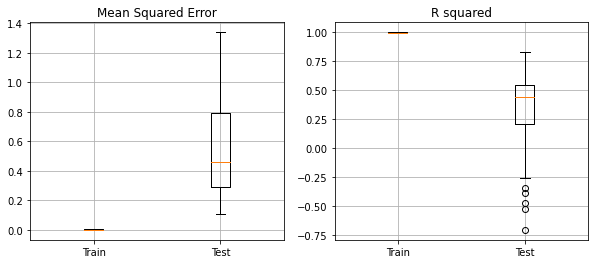

Train MSE standard deviation: 0.0012130030684111338
Test MSE standard deviation:  0.3138887652695911

Train_R2 standard deviation: 0.001030408413401816
Test_R2 standard deviation:  0.3112560479741035


In [118]:
'''
model = KNeighborsRegressor(n_neighbors=100)
#model = RandomForestRegressor(n_estimators=10) #Number of trees in the forest
#model = ExtraTreesRegressor(n_estimators=10)
#model = GradientBoostingRegressor(n_estimators = 10) #Number of trees in the forest
#model = XGBRegressor(objective="reg:squarederror", random_state=42)
#model = CatBoostRegressor() #Change fit in functions
#model = LGBMRegressor() #Change fit in functions

#Model_Performance(model,X_train,y_train,X_test, y_test)
Model_Performance(model,X_train_st,y_train,X_test_st, y_test)
'''

model = catboost_model

Model_Performance(model,X_train_st,y_train,X_test_st, y_test)

### Feature Importance

Learning rate set to 0.5
0:	learn: 0.8643326	total: 1.9ms	remaining: 17.1ms
1:	learn: 0.7484689	total: 2.61ms	remaining: 10.5ms
2:	learn: 0.6504314	total: 3.53ms	remaining: 8.24ms
3:	learn: 0.6118392	total: 4.32ms	remaining: 6.49ms
4:	learn: 0.5359581	total: 5.17ms	remaining: 5.17ms
5:	learn: 0.4965546	total: 6.13ms	remaining: 4.08ms
6:	learn: 0.4495743	total: 6.94ms	remaining: 2.98ms
7:	learn: 0.4106250	total: 7.83ms	remaining: 1.96ms
8:	learn: 0.3789702	total: 8.47ms	remaining: 941us
9:	learn: 0.3412619	total: 9.06ms	remaining: 0us


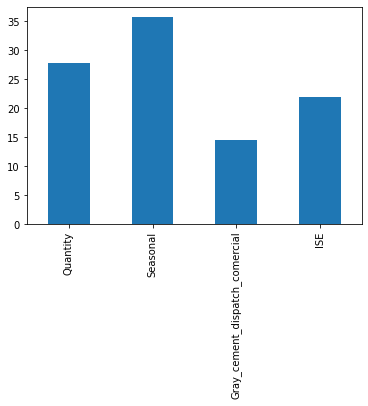

In [119]:
'''
RegForest = RandomForestRegressor(n_estimators=10)
RegForest.fit(X_train,y_train)

Features = df.columns[0:4]

Feature_importances = pd.Series(RegForest.feature_importances_, index=Features)
Feature_importances.plot.bar()
'''

#RegCatBoost = CatBoostRegressor(n_estimators=10)
RegCatBoost = CatBoostRegressor(n_estimators=10)
RegCatBoost.fit(X_train,y_train)

Features = dataframe.columns[0:4]

Feature_importances = pd.Series(RegCatBoost.feature_importances_, index=Features)
Feature_importances.plot.bar()


## Juans CATBoost Section

In [120]:
 Metrics(y_test, y_pred_Test)

Test Metrics:
R squared: 0.7829237457050231
Mean Absolute Error: 0.23174088608895685
Mean Squared Error: 0.17142190365175156
Root Mean Squared Error: 0.41403128342161727


### Feature importance

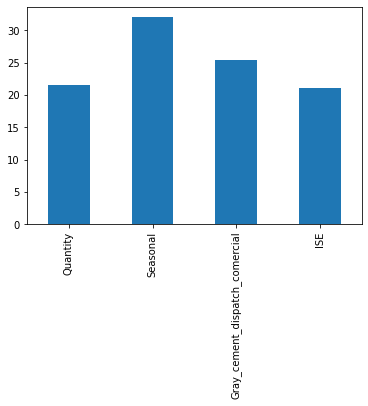

In [121]:
cb = CatBoostRegressor()
cb.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=0)

Features = dataframe.columns[0:4]

Feature_importances = pd.Series(cb.feature_importances_, index=Features)
Feature_importances.plot.bar()

## Calling Juans Functions

1.   Model Performance
2.   Metrics
3.   Predicted Plot
4.   Multiple Runs



### Model Performance

Learning rate set to 0.160694
0:	learn: 0.9813696	total: 610us	remaining: 60.5ms
1:	learn: 0.9356888	total: 918us	remaining: 45ms
2:	learn: 0.8875495	total: 1.27ms	remaining: 41ms
3:	learn: 0.8582278	total: 1.9ms	remaining: 45.6ms
4:	learn: 0.8235573	total: 2.21ms	remaining: 42ms
5:	learn: 0.7946661	total: 2.47ms	remaining: 38.7ms
6:	learn: 0.7614589	total: 2.79ms	remaining: 37.1ms
7:	learn: 0.7313558	total: 3.07ms	remaining: 35.3ms
8:	learn: 0.7013984	total: 3.27ms	remaining: 33ms
9:	learn: 0.6719941	total: 3.54ms	remaining: 31.8ms
10:	learn: 0.6463130	total: 5.73ms	remaining: 46.4ms
11:	learn: 0.6214553	total: 6.26ms	remaining: 45.9ms
12:	learn: 0.5965114	total: 6.9ms	remaining: 46.2ms
13:	learn: 0.5752500	total: 7.18ms	remaining: 44.1ms
14:	learn: 0.5527897	total: 7.38ms	remaining: 41.8ms
15:	learn: 0.5361291	total: 7.67ms	remaining: 40.2ms
16:	learn: 0.5204020	total: 7.96ms	remaining: 38.9ms
17:	learn: 0.5055247	total: 9.57ms	remaining: 43.6ms
18:	learn: 0.4876332	total: 10.1ms	rem

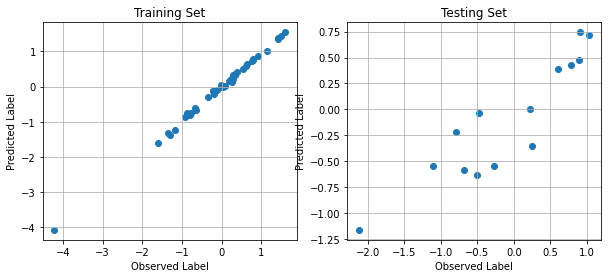

  1%|          | 1/100 [00:00<00:12,  8.22it/s]

Learning rate set to 0.162497
0:	learn: 0.9962900	total: 806us	remaining: 79.8ms
1:	learn: 0.9477762	total: 1.7ms	remaining: 83.1ms
2:	learn: 0.8968685	total: 2.32ms	remaining: 75ms
3:	learn: 0.8651071	total: 2.74ms	remaining: 65.7ms
4:	learn: 0.8219095	total: 3.01ms	remaining: 57.2ms
5:	learn: 0.7912376	total: 3.32ms	remaining: 52ms
6:	learn: 0.7542860	total: 3.61ms	remaining: 48ms
7:	learn: 0.7164658	total: 4.07ms	remaining: 46.8ms
8:	learn: 0.6845177	total: 8.96ms	remaining: 90.6ms
9:	learn: 0.6545517	total: 9.53ms	remaining: 85.8ms
10:	learn: 0.6269339	total: 10.1ms	remaining: 81.4ms
11:	learn: 0.5972085	total: 10.6ms	remaining: 77.7ms
12:	learn: 0.5747307	total: 11.1ms	remaining: 74.4ms
13:	learn: 0.5554951	total: 11.6ms	remaining: 71.5ms
14:	learn: 0.5339779	total: 12.1ms	remaining: 68.8ms
15:	learn: 0.5156014	total: 12.6ms	remaining: 66ms
16:	learn: 0.4936046	total: 13.1ms	remaining: 64ms
17:	learn: 0.4782421	total: 13.6ms	remaining: 62.1ms
18:	learn: 0.4605042	total: 14.1ms	rem

  3%|▎         | 3/100 [00:00<00:11,  8.60it/s]

Learning rate set to 0.162497
0:	learn: 0.9991776	total: 411us	remaining: 40.7ms
1:	learn: 0.9409765	total: 1.04ms	remaining: 51ms
2:	learn: 0.8886166	total: 1.57ms	remaining: 50.8ms
3:	learn: 0.8709545	total: 1.98ms	remaining: 47.6ms
4:	learn: 0.8275147	total: 2.48ms	remaining: 47.1ms
5:	learn: 0.7844265	total: 3.3ms	remaining: 51.8ms
6:	learn: 0.7448248	total: 3.84ms	remaining: 51ms
7:	learn: 0.7091367	total: 4.35ms	remaining: 50.1ms
8:	learn: 0.6823125	total: 4.87ms	remaining: 49.3ms
9:	learn: 0.6517030	total: 5.39ms	remaining: 48.6ms
10:	learn: 0.6246191	total: 5.9ms	remaining: 47.8ms
11:	learn: 0.6024284	total: 6.42ms	remaining: 47.1ms
12:	learn: 0.5794791	total: 6.95ms	remaining: 46.5ms
13:	learn: 0.5622382	total: 7.44ms	remaining: 45.7ms
14:	learn: 0.5438639	total: 8.69ms	remaining: 49.3ms
15:	learn: 0.5218420	total: 9.26ms	remaining: 48.6ms
16:	learn: 0.5006229	total: 9.79ms	remaining: 47.8ms
17:	learn: 0.4805561	total: 10.3ms	remaining: 47ms
18:	learn: 0.4626441	total: 10.8ms	

  5%|▌         | 5/100 [00:00<00:10,  9.09it/s]

Learning rate set to 0.162497
0:	learn: 1.0120267	total: 391us	remaining: 38.7ms
1:	learn: 0.9503316	total: 955us	remaining: 46.8ms
2:	learn: 0.8944376	total: 1.5ms	remaining: 48.5ms
3:	learn: 0.8601406	total: 2.02ms	remaining: 48.5ms
4:	learn: 0.8199133	total: 2.47ms	remaining: 46.9ms
5:	learn: 0.7877058	total: 2.98ms	remaining: 46.7ms
6:	learn: 0.7537899	total: 3.29ms	remaining: 43.7ms
7:	learn: 0.7120668	total: 3.81ms	remaining: 43.9ms
8:	learn: 0.6773966	total: 4.33ms	remaining: 43.8ms
9:	learn: 0.6498539	total: 4.86ms	remaining: 43.8ms
10:	learn: 0.6225107	total: 5.4ms	remaining: 43.7ms
11:	learn: 0.5949312	total: 5.91ms	remaining: 43.3ms
12:	learn: 0.5730076	total: 6.42ms	remaining: 43ms
13:	learn: 0.5550660	total: 6.91ms	remaining: 42.5ms
14:	learn: 0.5314101	total: 7.42ms	remaining: 42ms
15:	learn: 0.5103619	total: 8.13ms	remaining: 42.7ms
16:	learn: 0.4883078	total: 8.73ms	remaining: 42.6ms
17:	learn: 0.4702494	total: 9.28ms	remaining: 42.3ms
18:	learn: 0.4529265	total: 9.84ms

  7%|▋         | 7/100 [00:00<00:10,  8.91it/s]

Learning rate set to 0.162497
0:	learn: 0.7735889	total: 654us	remaining: 64.8ms
1:	learn: 0.7344295	total: 1.22ms	remaining: 60ms
2:	learn: 0.6956787	total: 1.79ms	remaining: 57.9ms
3:	learn: 0.6639170	total: 2.35ms	remaining: 56.3ms
4:	learn: 0.6301711	total: 3.03ms	remaining: 57.5ms
5:	learn: 0.5984141	total: 3.54ms	remaining: 55.4ms
6:	learn: 0.5708881	total: 3.91ms	remaining: 51.9ms
7:	learn: 0.5436310	total: 4.42ms	remaining: 50.8ms
8:	learn: 0.5272056	total: 4.95ms	remaining: 50.1ms
9:	learn: 0.5018027	total: 5.48ms	remaining: 49.3ms
10:	learn: 0.4782106	total: 5.99ms	remaining: 48.4ms
11:	learn: 0.4633479	total: 6.46ms	remaining: 47.4ms
12:	learn: 0.4473910	total: 7.04ms	remaining: 47.1ms
13:	learn: 0.4304246	total: 7.56ms	remaining: 46.4ms
14:	learn: 0.4125276	total: 8.11ms	remaining: 46ms
15:	learn: 0.3991857	total: 8.5ms	remaining: 44.6ms
16:	learn: 0.3832033	total: 9.02ms	remaining: 44ms
17:	learn: 0.3660468	total: 9.53ms	remaining: 43.4ms
18:	learn: 0.3521606	total: 10ms	r

  9%|▉         | 9/100 [00:01<00:10,  8.80it/s]

Learning rate set to 0.162497
0:	learn: 1.0279657	total: 705us	remaining: 69.9ms
1:	learn: 0.9682536	total: 1.32ms	remaining: 64.8ms
2:	learn: 0.9139300	total: 1.86ms	remaining: 60.2ms
3:	learn: 0.8698027	total: 2.17ms	remaining: 52.2ms
4:	learn: 0.8298754	total: 2.74ms	remaining: 52ms
5:	learn: 0.7917199	total: 3.34ms	remaining: 52.3ms
6:	learn: 0.7529464	total: 3.49ms	remaining: 46.3ms
7:	learn: 0.7139228	total: 3.78ms	remaining: 43.5ms
8:	learn: 0.6884666	total: 4.06ms	remaining: 41.1ms
9:	learn: 0.6508429	total: 5.29ms	remaining: 47.6ms
10:	learn: 0.6211583	total: 5.83ms	remaining: 47.2ms
11:	learn: 0.5934749	total: 6.38ms	remaining: 46.8ms
12:	learn: 0.5687973	total: 6.9ms	remaining: 46.2ms
13:	learn: 0.5489160	total: 7.42ms	remaining: 45.6ms
14:	learn: 0.5306098	total: 7.88ms	remaining: 44.6ms
15:	learn: 0.5165159	total: 8.27ms	remaining: 43.4ms
16:	learn: 0.4950877	total: 8.82ms	remaining: 43ms
17:	learn: 0.4790610	total: 9.35ms	remaining: 42.6ms
18:	learn: 0.4640091	total: 9.9m

 11%|█         | 11/100 [00:01<00:10,  8.42it/s]

97:	learn: 0.0562768	total: 57.2ms	remaining: 1.17ms
98:	learn: 0.0550590	total: 59.4ms	remaining: 599us
99:	learn: 0.0542858	total: 59.7ms	remaining: 0us
Learning rate set to 0.162497
0:	learn: 1.0253866	total: 415us	remaining: 41.1ms
1:	learn: 0.9670398	total: 1.01ms	remaining: 49.7ms
2:	learn: 0.9099024	total: 1.54ms	remaining: 49.9ms
3:	learn: 0.8719701	total: 2.09ms	remaining: 50.2ms
4:	learn: 0.8280950	total: 2.56ms	remaining: 48.7ms
5:	learn: 0.7890225	total: 3.06ms	remaining: 47.9ms
6:	learn: 0.7553085	total: 3.82ms	remaining: 50.8ms
7:	learn: 0.7185559	total: 4.39ms	remaining: 50.5ms
8:	learn: 0.6816262	total: 4.93ms	remaining: 49.9ms
9:	learn: 0.6482529	total: 5.45ms	remaining: 49ms
10:	learn: 0.6192687	total: 6ms	remaining: 48.6ms
11:	learn: 0.5933634	total: 6.51ms	remaining: 47.8ms
12:	learn: 0.5661686	total: 7.05ms	remaining: 47.2ms
13:	learn: 0.5467069	total: 7.67ms	remaining: 47.1ms
14:	learn: 0.5297205	total: 8.18ms	remaining: 46.4ms
15:	learn: 0.5086899	total: 8.7ms	re

 13%|█▎        | 13/100 [00:01<00:09,  8.74it/s]

60:	learn: 0.1430530	total: 28.4ms	remaining: 18.2ms
61:	learn: 0.1350654	total: 29ms	remaining: 17.8ms
62:	learn: 0.1319769	total: 29.5ms	remaining: 17.3ms
63:	learn: 0.1255385	total: 32.1ms	remaining: 18ms
64:	learn: 0.1222533	total: 32.8ms	remaining: 17.6ms
65:	learn: 0.1166205	total: 33.5ms	remaining: 17.3ms
66:	learn: 0.1137259	total: 34.2ms	remaining: 16.8ms
67:	learn: 0.1122335	total: 34.7ms	remaining: 16.3ms
68:	learn: 0.1091933	total: 35.2ms	remaining: 15.8ms
69:	learn: 0.1077069	total: 35.7ms	remaining: 15.3ms
70:	learn: 0.1063349	total: 36.3ms	remaining: 14.8ms
71:	learn: 0.1045423	total: 36.8ms	remaining: 14.3ms
72:	learn: 0.1012551	total: 37.3ms	remaining: 13.8ms
73:	learn: 0.0984758	total: 37.8ms	remaining: 13.3ms
74:	learn: 0.0963486	total: 38.3ms	remaining: 12.8ms
75:	learn: 0.0938386	total: 38.9ms	remaining: 12.3ms
76:	learn: 0.0918878	total: 39.4ms	remaining: 11.8ms
77:	learn: 0.0900802	total: 39.9ms	remaining: 11.3ms
78:	learn: 0.0885651	total: 40.4ms	remaining: 10.7

 15%|█▌        | 15/100 [00:01<00:09,  8.71it/s]

31:	learn: 0.3052330	total: 23.4ms	remaining: 49.7ms
32:	learn: 0.2997788	total: 23.8ms	remaining: 48.2ms
33:	learn: 0.2897005	total: 24.3ms	remaining: 47.1ms
34:	learn: 0.2839039	total: 24.7ms	remaining: 45.8ms
35:	learn: 0.2774441	total: 27.7ms	remaining: 49.3ms
36:	learn: 0.2714745	total: 28.8ms	remaining: 49.1ms
37:	learn: 0.2659000	total: 29.4ms	remaining: 47.9ms
38:	learn: 0.2587807	total: 30.4ms	remaining: 47.5ms
39:	learn: 0.2470699	total: 31.7ms	remaining: 47.5ms
40:	learn: 0.2429924	total: 32.2ms	remaining: 46.4ms
41:	learn: 0.2378371	total: 32.8ms	remaining: 45.2ms
42:	learn: 0.2341084	total: 33.3ms	remaining: 44.2ms
43:	learn: 0.2286137	total: 34.2ms	remaining: 43.6ms
44:	learn: 0.2181516	total: 34.8ms	remaining: 42.6ms
45:	learn: 0.2120603	total: 35.3ms	remaining: 41.4ms
46:	learn: 0.2090164	total: 35.7ms	remaining: 40.2ms
47:	learn: 0.2028057	total: 36.1ms	remaining: 39.1ms
48:	learn: 0.1999734	total: 37.5ms	remaining: 39.1ms
49:	learn: 0.1951561	total: 38.1ms	remaining: 

 17%|█▋        | 17/100 [00:01<00:09,  8.95it/s]

7:	learn: 0.6961655	total: 5.1ms	remaining: 58.7ms
8:	learn: 0.6653950	total: 5.56ms	remaining: 56.2ms
9:	learn: 0.6333680	total: 6ms	remaining: 54ms
10:	learn: 0.6076092	total: 7.3ms	remaining: 59.1ms
11:	learn: 0.5871642	total: 7.81ms	remaining: 57.3ms
12:	learn: 0.5666059	total: 8.31ms	remaining: 55.6ms
13:	learn: 0.5491549	total: 8.81ms	remaining: 54.1ms
14:	learn: 0.5287369	total: 9.32ms	remaining: 52.8ms
15:	learn: 0.5139771	total: 9.8ms	remaining: 51.5ms
16:	learn: 0.4926677	total: 10.3ms	remaining: 50.4ms
17:	learn: 0.4782838	total: 13.3ms	remaining: 60.7ms
18:	learn: 0.4666835	total: 13.9ms	remaining: 59.1ms
19:	learn: 0.4463678	total: 14.4ms	remaining: 57.6ms
20:	learn: 0.4316670	total: 14.9ms	remaining: 56.1ms
21:	learn: 0.4216618	total: 15.4ms	remaining: 54.7ms
22:	learn: 0.4113196	total: 15.9ms	remaining: 53.3ms
23:	learn: 0.3983967	total: 16.4ms	remaining: 52ms
24:	learn: 0.3867459	total: 16.9ms	remaining: 50.7ms
25:	learn: 0.3726916	total: 17.4ms	remaining: 49.6ms
26:	le

 18%|█▊        | 18/100 [00:02<00:09,  8.88it/s]

Learning rate set to 0.162497
0:	learn: 0.7635150	total: 1.37ms	remaining: 135ms
1:	learn: 0.7234156	total: 1.97ms	remaining: 96.7ms
2:	learn: 0.6827009	total: 2.5ms	remaining: 81ms
3:	learn: 0.6540682	total: 2.79ms	remaining: 67ms
4:	learn: 0.6196387	total: 3.07ms	remaining: 58.4ms
5:	learn: 0.5992197	total: 4.01ms	remaining: 62.9ms
6:	learn: 0.5649910	total: 4.35ms	remaining: 57.8ms
7:	learn: 0.5349617	total: 5.12ms	remaining: 58.9ms
8:	learn: 0.5135780	total: 5.66ms	remaining: 57.2ms
9:	learn: 0.4935178	total: 6.19ms	remaining: 55.7ms
10:	learn: 0.4720652	total: 6.71ms	remaining: 54.3ms
11:	learn: 0.4544004	total: 7.22ms	remaining: 53ms
12:	learn: 0.4367181	total: 7.74ms	remaining: 51.8ms
13:	learn: 0.4208037	total: 8.25ms	remaining: 50.7ms
14:	learn: 0.4090596	total: 8.76ms	remaining: 49.7ms
15:	learn: 0.4004540	total: 9.29ms	remaining: 48.8ms
16:	learn: 0.3807750	total: 9.8ms	remaining: 47.9ms
17:	learn: 0.3705107	total: 10.3ms	remaining: 47.1ms
18:	learn: 0.3573979	total: 10.9ms	

 20%|██        | 20/100 [00:02<00:09,  8.58it/s]

Learning rate set to 0.162497
0:	learn: 0.9675601	total: 448us	remaining: 44.4ms
1:	learn: 0.9099909	total: 1.06ms	remaining: 52.2ms
2:	learn: 0.8621808	total: 1.6ms	remaining: 51.6ms
3:	learn: 0.8306838	total: 2.14ms	remaining: 51.4ms
4:	learn: 0.7914769	total: 2.71ms	remaining: 51.4ms
5:	learn: 0.7582911	total: 3.16ms	remaining: 49.6ms
6:	learn: 0.7241593	total: 3.73ms	remaining: 49.6ms
7:	learn: 0.6910131	total: 4.27ms	remaining: 49.1ms
8:	learn: 0.6581502	total: 4.79ms	remaining: 48.4ms
9:	learn: 0.6355886	total: 5.32ms	remaining: 47.9ms
10:	learn: 0.6110556	total: 5.83ms	remaining: 47.2ms
11:	learn: 0.5858227	total: 6.35ms	remaining: 46.6ms
12:	learn: 0.5631265	total: 6.88ms	remaining: 46.1ms
13:	learn: 0.5476866	total: 7.49ms	remaining: 46ms
14:	learn: 0.5210841	total: 8.06ms	remaining: 45.7ms
15:	learn: 0.5055719	total: 8.67ms	remaining: 45.5ms
16:	learn: 0.4895365	total: 9.19ms	remaining: 44.9ms
17:	learn: 0.4776902	total: 9.71ms	remaining: 44.2ms
18:	learn: 0.4683642	total: 10

 22%|██▏       | 22/100 [00:02<00:08,  8.68it/s]

Learning rate set to 0.162497
0:	learn: 1.0050880	total: 380us	remaining: 37.6ms
1:	learn: 0.9617501	total: 991us	remaining: 48.6ms
2:	learn: 0.9123203	total: 1.55ms	remaining: 50.2ms
3:	learn: 0.8883255	total: 1.95ms	remaining: 46.9ms
4:	learn: 0.8456406	total: 2.59ms	remaining: 49.2ms
5:	learn: 0.8039636	total: 3.19ms	remaining: 50ms
6:	learn: 0.7753051	total: 3.76ms	remaining: 49.9ms
7:	learn: 0.7494115	total: 4.31ms	remaining: 49.5ms
8:	learn: 0.7176738	total: 5.03ms	remaining: 50.8ms
9:	learn: 0.6874339	total: 5.6ms	remaining: 50.4ms
10:	learn: 0.6588232	total: 6.19ms	remaining: 50.1ms
11:	learn: 0.6314845	total: 7.07ms	remaining: 51.8ms
12:	learn: 0.6095694	total: 7.66ms	remaining: 51.3ms
13:	learn: 0.5866544	total: 8.46ms	remaining: 52ms
14:	learn: 0.5656957	total: 9.11ms	remaining: 51.6ms
15:	learn: 0.5386469	total: 9.96ms	remaining: 52.3ms
16:	learn: 0.5196572	total: 10.6ms	remaining: 51.7ms
17:	learn: 0.5057489	total: 11.3ms	remaining: 51.3ms
18:	learn: 0.4853899	total: 11.9m

 24%|██▍       | 24/100 [00:02<00:08,  8.82it/s]

Learning rate set to 0.162497
0:	learn: 0.7876927	total: 890us	remaining: 88.2ms
1:	learn: 0.7451299	total: 1.32ms	remaining: 64.6ms
2:	learn: 0.7069965	total: 1.97ms	remaining: 63.6ms
3:	learn: 0.6699681	total: 2.39ms	remaining: 57.5ms
4:	learn: 0.6316423	total: 3.84ms	remaining: 72.9ms
5:	learn: 0.6067474	total: 4.33ms	remaining: 67.8ms
6:	learn: 0.5737866	total: 5.17ms	remaining: 68.7ms
7:	learn: 0.5457505	total: 5.7ms	remaining: 65.6ms
8:	learn: 0.5205025	total: 6.26ms	remaining: 63.3ms
9:	learn: 0.4963530	total: 6.95ms	remaining: 62.5ms
10:	learn: 0.4687348	total: 7.51ms	remaining: 60.8ms
11:	learn: 0.4482698	total: 8.04ms	remaining: 58.9ms
12:	learn: 0.4289820	total: 8.57ms	remaining: 57.4ms
13:	learn: 0.4128025	total: 9.08ms	remaining: 55.8ms
14:	learn: 0.3981323	total: 9.58ms	remaining: 54.3ms
15:	learn: 0.3793857	total: 9.98ms	remaining: 52.4ms
16:	learn: 0.3619082	total: 10.5ms	remaining: 51.2ms
17:	learn: 0.3437957	total: 13ms	remaining: 59.4ms
18:	learn: 0.3285102	total: 13

 26%|██▌       | 26/100 [00:02<00:08,  8.79it/s]

Learning rate set to 0.162497
0:	learn: 0.9821095	total: 384us	remaining: 38ms
1:	learn: 0.9304586	total: 2.17ms	remaining: 106ms
2:	learn: 0.8800946	total: 3.08ms	remaining: 99.7ms
3:	learn: 0.8475338	total: 3.64ms	remaining: 87.3ms
4:	learn: 0.8079083	total: 4.1ms	remaining: 77.9ms
5:	learn: 0.7742796	total: 4.63ms	remaining: 72.5ms
6:	learn: 0.7372594	total: 5.18ms	remaining: 68.9ms
7:	learn: 0.7063294	total: 5.57ms	remaining: 64.1ms
8:	learn: 0.6821156	total: 6.1ms	remaining: 61.7ms
9:	learn: 0.6545539	total: 6.63ms	remaining: 59.6ms
10:	learn: 0.6346852	total: 7.12ms	remaining: 57.6ms
11:	learn: 0.6123260	total: 7.65ms	remaining: 56.1ms
12:	learn: 0.5866995	total: 8.19ms	remaining: 54.8ms
13:	learn: 0.5620413	total: 8.69ms	remaining: 53.4ms
14:	learn: 0.5405149	total: 9.2ms	remaining: 52.1ms
15:	learn: 0.5252919	total: 9.7ms	remaining: 50.9ms
16:	learn: 0.5055431	total: 10.2ms	remaining: 49.9ms
17:	learn: 0.4899396	total: 10.7ms	remaining: 48.9ms
18:	learn: 0.4732543	total: 11.2ms

 28%|██▊       | 28/100 [00:03<00:08,  8.76it/s]

Learning rate set to 0.162497
0:	learn: 0.9783458	total: 398us	remaining: 39.5ms
1:	learn: 0.9274614	total: 989us	remaining: 48.5ms
2:	learn: 0.8811251	total: 1.52ms	remaining: 49.3ms
3:	learn: 0.8629358	total: 1.9ms	remaining: 45.6ms
4:	learn: 0.8233895	total: 2.41ms	remaining: 45.8ms
5:	learn: 0.7874455	total: 2.94ms	remaining: 46ms
6:	learn: 0.7565313	total: 3.43ms	remaining: 45.6ms
7:	learn: 0.7255460	total: 4.01ms	remaining: 46.1ms
8:	learn: 0.7009018	total: 4.54ms	remaining: 45.9ms
9:	learn: 0.6675540	total: 5.08ms	remaining: 45.7ms
10:	learn: 0.6411444	total: 5.61ms	remaining: 45.4ms
11:	learn: 0.6162393	total: 6.13ms	remaining: 45ms
12:	learn: 0.5888309	total: 6.64ms	remaining: 44.4ms
13:	learn: 0.5719126	total: 7.38ms	remaining: 45.3ms
14:	learn: 0.5537378	total: 8ms	remaining: 45.4ms
15:	learn: 0.5314494	total: 8.53ms	remaining: 44.8ms
16:	learn: 0.5072300	total: 9.1ms	remaining: 44.4ms
17:	learn: 0.4876090	total: 9.64ms	remaining: 43.9ms
18:	learn: 0.4702746	total: 10.2ms	re

 30%|███       | 30/100 [00:03<00:08,  8.66it/s]

Learning rate set to 0.162497
0:	learn: 0.8093846	total: 910us	remaining: 90.2ms
1:	learn: 0.7667535	total: 1.36ms	remaining: 66.8ms
2:	learn: 0.7177463	total: 1.76ms	remaining: 56.9ms
3:	learn: 0.6842369	total: 2.04ms	remaining: 49ms
4:	learn: 0.6460020	total: 2.36ms	remaining: 44.8ms
5:	learn: 0.6188492	total: 3.17ms	remaining: 49.6ms
6:	learn: 0.5886283	total: 4.1ms	remaining: 54.5ms
7:	learn: 0.5562760	total: 4.68ms	remaining: 53.9ms
8:	learn: 0.5304000	total: 5.24ms	remaining: 53ms
9:	learn: 0.5083349	total: 5.74ms	remaining: 51.7ms
10:	learn: 0.4885011	total: 6.27ms	remaining: 50.7ms
11:	learn: 0.4707287	total: 6.78ms	remaining: 49.7ms
12:	learn: 0.4502443	total: 7.48ms	remaining: 50.1ms
13:	learn: 0.4344442	total: 7.91ms	remaining: 48.6ms
14:	learn: 0.4176206	total: 8.46ms	remaining: 47.9ms
15:	learn: 0.3969661	total: 8.99ms	remaining: 47.2ms
16:	learn: 0.3793545	total: 9.53ms	remaining: 46.6ms
17:	learn: 0.3597389	total: 10ms	remaining: 45.8ms
18:	learn: 0.3446387	total: 10.6ms

 33%|███▎      | 33/100 [00:03<00:07,  8.94it/s]

Learning rate set to 0.162497
0:	learn: 0.9884531	total: 385us	remaining: 38.2ms
1:	learn: 0.9373107	total: 952us	remaining: 46.6ms
2:	learn: 0.8930958	total: 1.8ms	remaining: 58.2ms
3:	learn: 0.8563005	total: 2.35ms	remaining: 56.5ms
4:	learn: 0.8140064	total: 2.88ms	remaining: 54.7ms
5:	learn: 0.7791489	total: 3.42ms	remaining: 53.6ms
6:	learn: 0.7408763	total: 3.94ms	remaining: 52.4ms
7:	learn: 0.7112321	total: 4.45ms	remaining: 51.2ms
8:	learn: 0.6814322	total: 4.96ms	remaining: 50.2ms
9:	learn: 0.6507284	total: 5.51ms	remaining: 49.6ms
10:	learn: 0.6259484	total: 6ms	remaining: 48.6ms
11:	learn: 0.6013332	total: 6.52ms	remaining: 47.8ms
12:	learn: 0.5763965	total: 7.05ms	remaining: 47.2ms
13:	learn: 0.5595846	total: 7.55ms	remaining: 46.4ms
14:	learn: 0.5355713	total: 8.08ms	remaining: 45.8ms
15:	learn: 0.5123332	total: 8.63ms	remaining: 45.3ms
16:	learn: 0.4954728	total: 9.15ms	remaining: 44.7ms
17:	learn: 0.4768986	total: 9.66ms	remaining: 44ms
18:	learn: 0.4614862	total: 10.2ms

 34%|███▍      | 34/100 [00:03<00:07,  8.74it/s]

Learning rate set to 0.162497
0:	learn: 0.9535425	total: 1.84ms	remaining: 182ms
1:	learn: 0.9102785	total: 2.75ms	remaining: 135ms
2:	learn: 0.8666640	total: 4.1ms	remaining: 133ms
3:	learn: 0.8482083	total: 4.64ms	remaining: 111ms
4:	learn: 0.8081206	total: 5.07ms	remaining: 96.3ms
5:	learn: 0.7712055	total: 5.73ms	remaining: 89.8ms
6:	learn: 0.7370128	total: 6.06ms	remaining: 80.5ms
7:	learn: 0.7071056	total: 6.4ms	remaining: 73.6ms
8:	learn: 0.6809235	total: 6.72ms	remaining: 68ms
9:	learn: 0.6529899	total: 7.06ms	remaining: 63.5ms
10:	learn: 0.6232599	total: 7.39ms	remaining: 59.8ms
11:	learn: 0.5939487	total: 7.71ms	remaining: 56.5ms
12:	learn: 0.5670791	total: 8.04ms	remaining: 53.8ms
13:	learn: 0.5479306	total: 8.34ms	remaining: 51.3ms
14:	learn: 0.5234450	total: 8.66ms	remaining: 49.1ms
15:	learn: 0.5026470	total: 8.98ms	remaining: 47.2ms
16:	learn: 0.4815417	total: 9.3ms	remaining: 45.4ms
17:	learn: 0.4673702	total: 9.61ms	remaining: 43.8ms
18:	learn: 0.4536257	total: 9.92ms	

 36%|███▌      | 36/100 [00:04<00:07,  8.71it/s]

Learning rate set to 0.162497
0:	learn: 0.8206383	total: 437us	remaining: 43.3ms
1:	learn: 0.7679280	total: 800us	remaining: 39.2ms
2:	learn: 0.7180713	total: 1.13ms	remaining: 36.6ms
3:	learn: 0.6682699	total: 1.46ms	remaining: 35.1ms
4:	learn: 0.6305119	total: 1.78ms	remaining: 33.8ms
5:	learn: 0.6048798	total: 2.11ms	remaining: 33ms
6:	learn: 0.5730657	total: 3.06ms	remaining: 40.6ms
7:	learn: 0.5469365	total: 3.42ms	remaining: 39.4ms
8:	learn: 0.5216025	total: 3.85ms	remaining: 38.9ms
9:	learn: 0.4976187	total: 4.38ms	remaining: 39.4ms
10:	learn: 0.4739128	total: 4.69ms	remaining: 37.9ms
11:	learn: 0.4532076	total: 5.2ms	remaining: 38.1ms
12:	learn: 0.4349111	total: 5.94ms	remaining: 39.8ms
13:	learn: 0.4176604	total: 6.38ms	remaining: 39.2ms
14:	learn: 0.3943802	total: 6.93ms	remaining: 39.3ms
15:	learn: 0.3770871	total: 7.43ms	remaining: 39ms
16:	learn: 0.3635050	total: 7.97ms	remaining: 38.9ms
17:	learn: 0.3481744	total: 8.52ms	remaining: 38.8ms
18:	learn: 0.3354905	total: 9.04m

 38%|███▊      | 38/100 [00:04<00:07,  8.85it/s]

Learning rate set to 0.162497
0:	learn: 0.7857754	total: 1.01ms	remaining: 99.9ms
1:	learn: 0.7402621	total: 1.59ms	remaining: 78.1ms
2:	learn: 0.7016266	total: 2.25ms	remaining: 72.9ms
3:	learn: 0.6655066	total: 2.76ms	remaining: 66.3ms
4:	learn: 0.6261316	total: 3.31ms	remaining: 62.9ms
5:	learn: 0.5970634	total: 4.18ms	remaining: 65.5ms
6:	learn: 0.5676372	total: 4.72ms	remaining: 62.7ms
7:	learn: 0.5359267	total: 5.21ms	remaining: 60ms
8:	learn: 0.5143656	total: 5.75ms	remaining: 58.1ms
9:	learn: 0.4932847	total: 6.27ms	remaining: 56.4ms
10:	learn: 0.4817244	total: 6.61ms	remaining: 53.5ms
11:	learn: 0.4601637	total: 7.2ms	remaining: 52.8ms
12:	learn: 0.4412034	total: 7.69ms	remaining: 51.5ms
13:	learn: 0.4227350	total: 8.22ms	remaining: 50.5ms
14:	learn: 0.4034918	total: 8.92ms	remaining: 50.5ms
15:	learn: 0.3863865	total: 9.55ms	remaining: 50.2ms
16:	learn: 0.3711150	total: 10.1ms	remaining: 49.3ms
17:	learn: 0.3581059	total: 10.7ms	remaining: 48.6ms
18:	learn: 0.3436581	total: 1

 40%|████      | 40/100 [00:04<00:06,  8.94it/s]

Learning rate set to 0.162497
0:	learn: 0.9674198	total: 411us	remaining: 40.7ms
1:	learn: 0.9104522	total: 966us	remaining: 47.4ms
2:	learn: 0.8621884	total: 1.5ms	remaining: 48.6ms
3:	learn: 0.8264373	total: 2.15ms	remaining: 51.7ms
4:	learn: 0.7856577	total: 2.72ms	remaining: 51.7ms
5:	learn: 0.7470826	total: 3.3ms	remaining: 51.7ms
6:	learn: 0.7096424	total: 3.83ms	remaining: 50.9ms
7:	learn: 0.6800789	total: 4.33ms	remaining: 49.8ms
8:	learn: 0.6489075	total: 5ms	remaining: 50.6ms
9:	learn: 0.6179283	total: 5.57ms	remaining: 50.1ms
10:	learn: 0.6024955	total: 5.96ms	remaining: 48.2ms
11:	learn: 0.5773257	total: 6.63ms	remaining: 48.6ms
12:	learn: 0.5534301	total: 7.17ms	remaining: 48ms
13:	learn: 0.5319462	total: 7.68ms	remaining: 47.2ms
14:	learn: 0.5082819	total: 8.3ms	remaining: 47ms
15:	learn: 0.4906356	total: 8.73ms	remaining: 45.8ms
16:	learn: 0.4725572	total: 9.23ms	remaining: 45.1ms
17:	learn: 0.4571341	total: 9.76ms	remaining: 44.4ms
18:	learn: 0.4389736	total: 10.3ms	rem

 42%|████▏     | 42/100 [00:04<00:06,  8.83it/s]

Learning rate set to 0.162497
0:	learn: 0.7048635	total: 491us	remaining: 48.6ms
1:	learn: 0.6546910	total: 1.08ms	remaining: 52.9ms
2:	learn: 0.6181088	total: 1.85ms	remaining: 59.9ms
3:	learn: 0.5860117	total: 2.53ms	remaining: 60.7ms
4:	learn: 0.5528653	total: 3.33ms	remaining: 63.2ms
5:	learn: 0.5348739	total: 3.85ms	remaining: 60.4ms
6:	learn: 0.5099068	total: 4.37ms	remaining: 58.1ms
7:	learn: 0.4850086	total: 4.89ms	remaining: 56.2ms
8:	learn: 0.4643079	total: 5.42ms	remaining: 54.9ms
9:	learn: 0.4440979	total: 5.93ms	remaining: 53.4ms
10:	learn: 0.4246448	total: 6.43ms	remaining: 52ms
11:	learn: 0.4076221	total: 6.96ms	remaining: 51ms
12:	learn: 0.3916451	total: 7.46ms	remaining: 49.9ms
13:	learn: 0.3748189	total: 7.86ms	remaining: 48.3ms
14:	learn: 0.3582732	total: 8.36ms	remaining: 47.4ms
15:	learn: 0.3469001	total: 8.87ms	remaining: 46.6ms
16:	learn: 0.3308613	total: 9.39ms	remaining: 45.9ms
17:	learn: 0.3162005	total: 9.89ms	remaining: 45.1ms
18:	learn: 0.3035307	total: 10.

 44%|████▍     | 44/100 [00:05<00:06,  8.63it/s]

Learning rate set to 0.162497
0:	learn: 0.7810654	total: 449us	remaining: 44.5ms
1:	learn: 0.7294008	total: 1.13ms	remaining: 55.3ms
2:	learn: 0.6893969	total: 1.69ms	remaining: 54.7ms
3:	learn: 0.6516121	total: 2.22ms	remaining: 53.2ms
4:	learn: 0.6139560	total: 2.77ms	remaining: 52.7ms
5:	learn: 0.5875055	total: 3.29ms	remaining: 51.6ms
6:	learn: 0.5539795	total: 3.81ms	remaining: 50.7ms
7:	learn: 0.5266306	total: 4.59ms	remaining: 52.8ms
8:	learn: 0.4956275	total: 5.17ms	remaining: 52.3ms
9:	learn: 0.4710493	total: 5.74ms	remaining: 51.6ms
10:	learn: 0.4459586	total: 6.28ms	remaining: 50.8ms
11:	learn: 0.4278373	total: 6.82ms	remaining: 50ms
12:	learn: 0.4141747	total: 7.32ms	remaining: 49ms
13:	learn: 0.3962459	total: 7.85ms	remaining: 48.2ms
14:	learn: 0.3792965	total: 8.36ms	remaining: 47.4ms
15:	learn: 0.3608702	total: 8.76ms	remaining: 46ms
16:	learn: 0.3453608	total: 9.28ms	remaining: 45.3ms
17:	learn: 0.3331372	total: 9.84ms	remaining: 44.8ms
18:	learn: 0.3175966	total: 10.4m

 46%|████▌     | 46/100 [00:05<00:06,  8.42it/s]

Learning rate set to 0.162497
0:	learn: 0.8345304	total: 1.72ms	remaining: 171ms
1:	learn: 0.7873527	total: 2.89ms	remaining: 142ms
2:	learn: 0.7432680	total: 3.83ms	remaining: 124ms
3:	learn: 0.7048147	total: 4.7ms	remaining: 113ms
4:	learn: 0.6631700	total: 5.23ms	remaining: 99.5ms
5:	learn: 0.6370782	total: 5.82ms	remaining: 91.2ms
6:	learn: 0.6042149	total: 6.38ms	remaining: 84.7ms
7:	learn: 0.5785673	total: 6.9ms	remaining: 79.3ms
8:	learn: 0.5548934	total: 7.44ms	remaining: 75.2ms
9:	learn: 0.5263855	total: 7.96ms	remaining: 71.7ms
10:	learn: 0.4983342	total: 8.48ms	remaining: 68.7ms
11:	learn: 0.4748141	total: 9.01ms	remaining: 66ms
12:	learn: 0.4511804	total: 9.53ms	remaining: 63.7ms
13:	learn: 0.4308181	total: 10.2ms	remaining: 62.5ms
14:	learn: 0.4164388	total: 10.6ms	remaining: 60.1ms
15:	learn: 0.3998531	total: 11ms	remaining: 57.8ms
16:	learn: 0.3802493	total: 12.3ms	remaining: 60ms
17:	learn: 0.3602735	total: 13.7ms	remaining: 62.2ms
18:	learn: 0.3434677	total: 14ms	remai

 48%|████▊     | 48/100 [00:05<00:06,  8.50it/s]

Learning rate set to 0.162497
0:	learn: 0.9649009	total: 3.5ms	remaining: 347ms
1:	learn: 0.9182966	total: 4.24ms	remaining: 208ms
2:	learn: 0.8748648	total: 4.83ms	remaining: 156ms
3:	learn: 0.8407962	total: 5.38ms	remaining: 129ms
4:	learn: 0.8024672	total: 5.91ms	remaining: 112ms
5:	learn: 0.7735191	total: 6.44ms	remaining: 101ms
6:	learn: 0.7453555	total: 6.98ms	remaining: 92.7ms
7:	learn: 0.7096609	total: 7.49ms	remaining: 86.2ms
8:	learn: 0.6849144	total: 8.02ms	remaining: 81ms
9:	learn: 0.6569881	total: 8.71ms	remaining: 78.4ms
10:	learn: 0.6459295	total: 9.11ms	remaining: 73.7ms
11:	learn: 0.6232455	total: 9.68ms	remaining: 71ms
12:	learn: 0.5968086	total: 10.2ms	remaining: 68.3ms
13:	learn: 0.5759160	total: 10.6ms	remaining: 65.1ms
14:	learn: 0.5564041	total: 11.1ms	remaining: 63.1ms
15:	learn: 0.5354567	total: 11.6ms	remaining: 61.1ms
16:	learn: 0.5145508	total: 12.2ms	remaining: 59.5ms
17:	learn: 0.4954094	total: 12.7ms	remaining: 57.9ms
18:	learn: 0.4802238	total: 13.2ms	re

 50%|█████     | 50/100 [00:05<00:05,  8.74it/s]

Learning rate set to 0.162497
0:	learn: 0.9154971	total: 630us	remaining: 62.5ms
1:	learn: 0.8768134	total: 1.3ms	remaining: 63.6ms
2:	learn: 0.8344340	total: 2.02ms	remaining: 65.4ms
3:	learn: 0.8132686	total: 2.24ms	remaining: 53.8ms
4:	learn: 0.7778877	total: 2.94ms	remaining: 55.9ms
5:	learn: 0.7515606	total: 3.63ms	remaining: 56.9ms
6:	learn: 0.7258401	total: 4.21ms	remaining: 56ms
7:	learn: 0.7033603	total: 4.91ms	remaining: 56.5ms
8:	learn: 0.6752074	total: 5.53ms	remaining: 55.9ms
9:	learn: 0.6474645	total: 6.19ms	remaining: 55.7ms
10:	learn: 0.6273187	total: 6.66ms	remaining: 53.9ms
11:	learn: 0.6051933	total: 7.17ms	remaining: 52.6ms
12:	learn: 0.5780890	total: 7.72ms	remaining: 51.6ms
13:	learn: 0.5579679	total: 8.23ms	remaining: 50.6ms
14:	learn: 0.5418560	total: 8.78ms	remaining: 49.7ms
15:	learn: 0.5237939	total: 9.31ms	remaining: 48.9ms
16:	learn: 0.5046093	total: 9.85ms	remaining: 48.1ms
17:	learn: 0.4882543	total: 10.4ms	remaining: 47.4ms
18:	learn: 0.4753818	total: 10

 52%|█████▏    | 52/100 [00:06<00:05,  8.41it/s]

Learning rate set to 0.162497
0:	learn: 0.9466052	total: 739us	remaining: 73.2ms
1:	learn: 0.8898919	total: 3.08ms	remaining: 151ms
2:	learn: 0.8407786	total: 3.79ms	remaining: 123ms
3:	learn: 0.8080598	total: 4.4ms	remaining: 106ms
4:	learn: 0.7684036	total: 4.94ms	remaining: 93.9ms
5:	learn: 0.7359507	total: 5.5ms	remaining: 86.2ms
6:	learn: 0.7014383	total: 6.11ms	remaining: 81.2ms
7:	learn: 0.6709456	total: 6.67ms	remaining: 76.7ms
8:	learn: 0.6461241	total: 7.2ms	remaining: 72.8ms
9:	learn: 0.6163733	total: 7.74ms	remaining: 69.7ms
10:	learn: 0.6006589	total: 8.1ms	remaining: 65.5ms
11:	learn: 0.5742667	total: 8.63ms	remaining: 63.3ms
12:	learn: 0.5501059	total: 9.15ms	remaining: 61.2ms
13:	learn: 0.5271896	total: 9.67ms	remaining: 59.4ms
14:	learn: 0.5081232	total: 10.2ms	remaining: 57.8ms
15:	learn: 0.4897252	total: 10.7ms	remaining: 56.2ms
16:	learn: 0.4727116	total: 11.2ms	remaining: 54.9ms
17:	learn: 0.4639309	total: 11.6ms	remaining: 52.9ms
18:	learn: 0.4486736	total: 12.1ms

 54%|█████▍    | 54/100 [00:06<00:05,  8.68it/s]

Learning rate set to 0.162497
0:	learn: 0.9515072	total: 421us	remaining: 41.7ms
1:	learn: 0.8958028	total: 1.11ms	remaining: 54.3ms
2:	learn: 0.8465403	total: 1.68ms	remaining: 54.3ms
3:	learn: 0.8135937	total: 2.24ms	remaining: 53.8ms
4:	learn: 0.7746876	total: 2.74ms	remaining: 52ms
5:	learn: 0.7422477	total: 3.25ms	remaining: 51ms
6:	learn: 0.7037215	total: 3.89ms	remaining: 51.7ms
7:	learn: 0.6693568	total: 4.49ms	remaining: 51.6ms
8:	learn: 0.6373057	total: 5.13ms	remaining: 51.9ms
9:	learn: 0.6075714	total: 5.66ms	remaining: 51ms
10:	learn: 0.5785887	total: 6.24ms	remaining: 50.5ms
11:	learn: 0.5547710	total: 6.76ms	remaining: 49.6ms
12:	learn: 0.5334360	total: 7.28ms	remaining: 48.7ms
13:	learn: 0.5167983	total: 7.87ms	remaining: 48.3ms
14:	learn: 0.4982009	total: 8.46ms	remaining: 47.9ms
15:	learn: 0.4777787	total: 8.99ms	remaining: 47.2ms
16:	learn: 0.4599954	total: 9.49ms	remaining: 46.4ms
17:	learn: 0.4430328	total: 9.99ms	remaining: 45.5ms
18:	learn: 0.4266513	total: 10.5m

 56%|█████▌    | 56/100 [00:06<00:05,  8.50it/s]

Learning rate set to 0.162497
0:	learn: 0.9464160	total: 812us	remaining: 80.4ms
1:	learn: 0.8977151	total: 1.19ms	remaining: 58.5ms
2:	learn: 0.8507423	total: 1.54ms	remaining: 49.7ms
3:	learn: 0.8057046	total: 1.88ms	remaining: 45ms
4:	learn: 0.7613932	total: 2.12ms	remaining: 40.4ms
5:	learn: 0.7340107	total: 2.46ms	remaining: 38.6ms
6:	learn: 0.6994445	total: 2.8ms	remaining: 37.2ms
7:	learn: 0.6629912	total: 3.12ms	remaining: 35.9ms
8:	learn: 0.6331427	total: 3.58ms	remaining: 36.2ms
9:	learn: 0.6059004	total: 3.89ms	remaining: 35.1ms
10:	learn: 0.5760865	total: 4.2ms	remaining: 34ms
11:	learn: 0.5523522	total: 4.52ms	remaining: 33.2ms
12:	learn: 0.5317799	total: 4.84ms	remaining: 32.4ms
13:	learn: 0.5169307	total: 5.17ms	remaining: 31.8ms
14:	learn: 0.4959891	total: 5.49ms	remaining: 31.1ms
15:	learn: 0.4756776	total: 5.81ms	remaining: 30.5ms
16:	learn: 0.4627343	total: 6.13ms	remaining: 29.9ms
17:	learn: 0.4504077	total: 6.37ms	remaining: 29ms
18:	learn: 0.4316445	total: 6.7ms	r

 58%|█████▊    | 58/100 [00:06<00:05,  8.37it/s]

Learning rate set to 0.162497
0:	learn: 0.9691398	total: 423us	remaining: 41.9ms
1:	learn: 0.9198014	total: 1.11ms	remaining: 54.6ms
2:	learn: 0.8644723	total: 1.69ms	remaining: 54.7ms
3:	learn: 0.8294861	total: 2.36ms	remaining: 56.7ms
4:	learn: 0.7868897	total: 2.86ms	remaining: 54.3ms
5:	learn: 0.7512931	total: 3.44ms	remaining: 53.9ms
6:	learn: 0.7136799	total: 4ms	remaining: 53.1ms
7:	learn: 0.6840513	total: 4.71ms	remaining: 54.1ms
8:	learn: 0.6499731	total: 5.3ms	remaining: 53.6ms
9:	learn: 0.6193479	total: 5.84ms	remaining: 52.5ms
10:	learn: 0.5913998	total: 6.37ms	remaining: 51.5ms
11:	learn: 0.5660958	total: 6.9ms	remaining: 50.6ms
12:	learn: 0.5450659	total: 7.46ms	remaining: 49.9ms
13:	learn: 0.5254862	total: 8.17ms	remaining: 50.2ms
14:	learn: 0.5073915	total: 8.71ms	remaining: 49.4ms
15:	learn: 0.4892617	total: 9.28ms	remaining: 48.7ms
16:	learn: 0.4732040	total: 9.87ms	remaining: 48.2ms
17:	learn: 0.4558369	total: 10.4ms	remaining: 47.5ms
18:	learn: 0.4415039	total: 11ms

 60%|██████    | 60/100 [00:06<00:04,  8.38it/s]

Learning rate set to 0.162497
0:	learn: 0.7898533	total: 1.13ms	remaining: 112ms
1:	learn: 0.7452978	total: 1.99ms	remaining: 97.3ms
2:	learn: 0.7013624	total: 2.51ms	remaining: 81.2ms
3:	learn: 0.6667554	total: 3.04ms	remaining: 73ms
4:	learn: 0.6267684	total: 3.56ms	remaining: 67.6ms
5:	learn: 0.6015116	total: 4.1ms	remaining: 64.3ms
6:	learn: 0.5719730	total: 4.61ms	remaining: 61.3ms
7:	learn: 0.5415181	total: 5.12ms	remaining: 58.9ms
8:	learn: 0.5164248	total: 5.65ms	remaining: 57.2ms
9:	learn: 0.4932258	total: 6.16ms	remaining: 55.4ms
10:	learn: 0.4700663	total: 6.69ms	remaining: 54.2ms
11:	learn: 0.4491299	total: 7.26ms	remaining: 53.2ms
12:	learn: 0.4316257	total: 7.76ms	remaining: 51.9ms
13:	learn: 0.4150281	total: 8.29ms	remaining: 50.9ms
14:	learn: 0.4008949	total: 8.81ms	remaining: 50ms
15:	learn: 0.3891832	total: 9.33ms	remaining: 49ms
16:	learn: 0.3745094	total: 9.91ms	remaining: 48.4ms
17:	learn: 0.3632333	total: 10.4ms	remaining: 47.5ms
18:	learn: 0.3504665	total: 11ms	r

 62%|██████▏   | 62/100 [00:07<00:04,  8.37it/s]

92:	learn: 0.0631218	total: 59.8ms	remaining: 4.5ms
93:	learn: 0.0623961	total: 60.3ms	remaining: 3.85ms
94:	learn: 0.0608449	total: 60.8ms	remaining: 3.2ms
95:	learn: 0.0600688	total: 61.2ms	remaining: 2.55ms
96:	learn: 0.0588014	total: 61.6ms	remaining: 1.91ms
97:	learn: 0.0568967	total: 62ms	remaining: 1.27ms
98:	learn: 0.0562200	total: 62.4ms	remaining: 630us
99:	learn: 0.0556060	total: 62.8ms	remaining: 0us
Learning rate set to 0.162497
0:	learn: 0.7576015	total: 527us	remaining: 52.2ms
1:	learn: 0.7082780	total: 1.22ms	remaining: 59.5ms
2:	learn: 0.6658453	total: 1.8ms	remaining: 58.2ms
3:	learn: 0.6349028	total: 2.36ms	remaining: 56.7ms
4:	learn: 0.6038004	total: 2.82ms	remaining: 53.6ms
5:	learn: 0.5812309	total: 3.33ms	remaining: 52.2ms
6:	learn: 0.5526243	total: 3.87ms	remaining: 51.4ms
7:	learn: 0.5233403	total: 5.27ms	remaining: 60.6ms
8:	learn: 0.4949221	total: 5.72ms	remaining: 57.8ms
9:	learn: 0.4678704	total: 6.98ms	remaining: 62.8ms
10:	learn: 0.4497134	total: 7.4ms	re

 64%|██████▍   | 64/100 [00:07<00:04,  8.22it/s]

99:	learn: 0.0413550	total: 76.8ms	remaining: 0us
Learning rate set to 0.162497
0:	learn: 1.0012256	total: 576us	remaining: 57.1ms
1:	learn: 0.9441312	total: 1.38ms	remaining: 67.5ms
2:	learn: 0.8949211	total: 2.01ms	remaining: 65ms
3:	learn: 0.8614386	total: 2.58ms	remaining: 61.9ms
4:	learn: 0.8250567	total: 3.12ms	remaining: 59.2ms
5:	learn: 0.7882968	total: 3.67ms	remaining: 57.6ms
6:	learn: 0.7474289	total: 4.21ms	remaining: 56ms
7:	learn: 0.7081579	total: 4.73ms	remaining: 54.4ms
8:	learn: 0.6804830	total: 5.27ms	remaining: 53.2ms
9:	learn: 0.6467012	total: 5.8ms	remaining: 52.2ms
10:	learn: 0.6326212	total: 6.15ms	remaining: 49.8ms
11:	learn: 0.6123439	total: 6.72ms	remaining: 49.3ms
12:	learn: 0.5844711	total: 7.25ms	remaining: 48.5ms
13:	learn: 0.5607064	total: 7.79ms	remaining: 47.8ms
14:	learn: 0.5456388	total: 8.26ms	remaining: 46.8ms
15:	learn: 0.5265629	total: 8.79ms	remaining: 46.1ms
16:	learn: 0.5048630	total: 9.34ms	remaining: 45.6ms
17:	learn: 0.4870781	total: 9.87ms	

 66%|██████▌   | 66/100 [00:07<00:04,  8.00it/s]

39:	learn: 0.2663479	total: 21.2ms	remaining: 31.7ms
40:	learn: 0.2619274	total: 21.6ms	remaining: 31.1ms
41:	learn: 0.2581893	total: 22.1ms	remaining: 30.5ms
42:	learn: 0.2465493	total: 22.5ms	remaining: 29.8ms
43:	learn: 0.2427400	total: 23ms	remaining: 29.3ms
44:	learn: 0.2339643	total: 23.5ms	remaining: 28.7ms
45:	learn: 0.2254316	total: 24ms	remaining: 28.1ms
46:	learn: 0.2223345	total: 24.4ms	remaining: 27.5ms
47:	learn: 0.2146378	total: 24.8ms	remaining: 26.8ms
48:	learn: 0.2075310	total: 25.2ms	remaining: 26.2ms
49:	learn: 0.1987304	total: 25.5ms	remaining: 25.5ms
50:	learn: 0.1945134	total: 25.9ms	remaining: 24.8ms
51:	learn: 0.1879449	total: 26.2ms	remaining: 24.2ms
52:	learn: 0.1819783	total: 26.5ms	remaining: 23.5ms
53:	learn: 0.1765499	total: 26.8ms	remaining: 22.8ms
54:	learn: 0.1722086	total: 27.1ms	remaining: 22.2ms
55:	learn: 0.1655606	total: 27.4ms	remaining: 21.6ms
56:	learn: 0.1601269	total: 27.7ms	remaining: 20.9ms
57:	learn: 0.1545025	total: 28.1ms	remaining: 20.3

 67%|██████▋   | 67/100 [00:07<00:03,  8.25it/s]

Learning rate set to 0.162497
0:	learn: 0.9662323	total: 1.04ms	remaining: 103ms
1:	learn: 0.9192538	total: 1.5ms	remaining: 73.6ms
2:	learn: 0.8734044	total: 1.83ms	remaining: 59.2ms
3:	learn: 0.8409867	total: 2.18ms	remaining: 52.4ms
4:	learn: 0.8016774	total: 2.42ms	remaining: 45.9ms
5:	learn: 0.7750255	total: 2.74ms	remaining: 42.9ms
6:	learn: 0.7383797	total: 3.06ms	remaining: 40.6ms
7:	learn: 0.7025991	total: 3.38ms	remaining: 38.8ms
8:	learn: 0.6753562	total: 3.68ms	remaining: 37.2ms
9:	learn: 0.6482125	total: 3.99ms	remaining: 35.9ms
10:	learn: 0.6259278	total: 4.17ms	remaining: 33.7ms
11:	learn: 0.6072162	total: 4.46ms	remaining: 32.8ms
12:	learn: 0.5814034	total: 4.88ms	remaining: 32.7ms
13:	learn: 0.5564878	total: 5.35ms	remaining: 32.9ms
14:	learn: 0.5337162	total: 5.6ms	remaining: 31.7ms
15:	learn: 0.5136969	total: 6.03ms	remaining: 31.6ms
16:	learn: 0.4954809	total: 6.45ms	remaining: 31.5ms
17:	learn: 0.4755324	total: 6.87ms	remaining: 31.3ms
18:	learn: 0.4582924	total: 7

 69%|██████▉   | 69/100 [00:08<00:03,  8.23it/s]

Learning rate set to 0.162497
0:	learn: 0.9783417	total: 993us	remaining: 98.4ms
1:	learn: 0.9271901	total: 1.83ms	remaining: 89.7ms
2:	learn: 0.8825963	total: 2.48ms	remaining: 80.3ms
3:	learn: 0.8373937	total: 3.06ms	remaining: 73.4ms
4:	learn: 0.7966954	total: 3.58ms	remaining: 68.1ms
5:	learn: 0.7646007	total: 3.82ms	remaining: 59.9ms
6:	learn: 0.7347680	total: 4.16ms	remaining: 55.3ms
7:	learn: 0.7038092	total: 4.49ms	remaining: 51.6ms
8:	learn: 0.6751639	total: 4.82ms	remaining: 48.7ms
9:	learn: 0.6453290	total: 5.15ms	remaining: 46.4ms
10:	learn: 0.6299713	total: 5.34ms	remaining: 43.2ms
11:	learn: 0.6067835	total: 5.67ms	remaining: 41.6ms
12:	learn: 0.5890809	total: 5.98ms	remaining: 40ms
13:	learn: 0.5699885	total: 6.28ms	remaining: 38.6ms
14:	learn: 0.5482896	total: 6.59ms	remaining: 37.3ms
15:	learn: 0.5329246	total: 6.78ms	remaining: 35.6ms
16:	learn: 0.5122856	total: 7.1ms	remaining: 34.6ms
17:	learn: 0.4950634	total: 7.4ms	remaining: 33.7ms
18:	learn: 0.4808924	total: 7.7

 71%|███████   | 71/100 [00:08<00:03,  7.88it/s]

Learning rate set to 0.162497
0:	learn: 0.7291807	total: 482us	remaining: 47.7ms
1:	learn: 0.6891079	total: 844us	remaining: 41.4ms
2:	learn: 0.6487223	total: 1.21ms	remaining: 39.3ms
3:	learn: 0.6251740	total: 1.45ms	remaining: 34.7ms
4:	learn: 0.5901601	total: 1.77ms	remaining: 33.7ms
5:	learn: 0.5640615	total: 2.75ms	remaining: 43.1ms
6:	learn: 0.5366928	total: 3.11ms	remaining: 41.3ms
7:	learn: 0.5136839	total: 3.47ms	remaining: 39.9ms
8:	learn: 0.4975551	total: 3.85ms	remaining: 39ms
9:	learn: 0.4760614	total: 4.18ms	remaining: 37.6ms
10:	learn: 0.4527266	total: 4.45ms	remaining: 36ms
11:	learn: 0.4327092	total: 4.79ms	remaining: 35.2ms
12:	learn: 0.4161910	total: 5.1ms	remaining: 34.2ms
13:	learn: 0.3988532	total: 5.33ms	remaining: 32.7ms
14:	learn: 0.3787472	total: 5.64ms	remaining: 32ms
15:	learn: 0.3683201	total: 5.84ms	remaining: 30.7ms
16:	learn: 0.3516274	total: 6.16ms	remaining: 30.1ms
17:	learn: 0.3396093	total: 6.48ms	remaining: 29.5ms
18:	learn: 0.3306048	total: 6.8ms	r

 73%|███████▎  | 73/100 [00:08<00:03,  8.17it/s]

Learning rate set to 0.162497
0:	learn: 1.0146356	total: 395us	remaining: 39.2ms
1:	learn: 0.9613715	total: 958us	remaining: 47ms
2:	learn: 0.9183732	total: 1.58ms	remaining: 51.2ms
3:	learn: 0.8724186	total: 2.12ms	remaining: 50.9ms
4:	learn: 0.8276557	total: 2.55ms	remaining: 48.5ms
5:	learn: 0.7934061	total: 3.08ms	remaining: 48.3ms
6:	learn: 0.7520911	total: 3.59ms	remaining: 47.7ms
7:	learn: 0.7241550	total: 4.1ms	remaining: 47.1ms
8:	learn: 0.6879094	total: 4.63ms	remaining: 46.8ms
9:	learn: 0.6595373	total: 5.16ms	remaining: 46.5ms
10:	learn: 0.6262204	total: 5.67ms	remaining: 45.9ms
11:	learn: 0.6007792	total: 6.2ms	remaining: 45.5ms
12:	learn: 0.5797309	total: 6.71ms	remaining: 44.9ms
13:	learn: 0.5593695	total: 7.26ms	remaining: 44.6ms
14:	learn: 0.5378962	total: 7.77ms	remaining: 44ms
15:	learn: 0.5158457	total: 8.27ms	remaining: 43.4ms
16:	learn: 0.4943053	total: 8.79ms	remaining: 42.9ms
17:	learn: 0.4761586	total: 9.28ms	remaining: 42.3ms
18:	learn: 0.4609810	total: 9.78ms

 75%|███████▌  | 75/100 [00:08<00:03,  8.19it/s]

Learning rate set to 0.162497
0:	learn: 0.9989889	total: 407us	remaining: 40.3ms
1:	learn: 0.9461830	total: 1.1ms	remaining: 53.9ms
2:	learn: 0.8932777	total: 1.72ms	remaining: 55.7ms
3:	learn: 0.8465827	total: 2.27ms	remaining: 54.4ms
4:	learn: 0.8090476	total: 2.72ms	remaining: 51.6ms
5:	learn: 0.7783806	total: 3.25ms	remaining: 50.8ms
6:	learn: 0.7447561	total: 3.77ms	remaining: 50.1ms
7:	learn: 0.7120780	total: 4.61ms	remaining: 53.1ms
8:	learn: 0.6814841	total: 5.14ms	remaining: 52ms
9:	learn: 0.6578292	total: 5.67ms	remaining: 51.1ms
10:	learn: 0.6274631	total: 6.19ms	remaining: 50.1ms
11:	learn: 0.6059262	total: 6.69ms	remaining: 49.1ms
12:	learn: 0.5838923	total: 7.22ms	remaining: 48.3ms
13:	learn: 0.5640056	total: 7.73ms	remaining: 47.5ms
14:	learn: 0.5439962	total: 8.26ms	remaining: 46.8ms
15:	learn: 0.5281707	total: 9.04ms	remaining: 47.4ms
16:	learn: 0.5130031	total: 9.59ms	remaining: 46.8ms
17:	learn: 0.4999487	total: 10.1ms	remaining: 45.9ms
18:	learn: 0.4826547	total: 10

 77%|███████▋  | 77/100 [00:09<00:02,  8.36it/s]

Learning rate set to 0.162497
0:	learn: 1.0061360	total: 417us	remaining: 41.4ms
1:	learn: 0.9521115	total: 1.03ms	remaining: 50.6ms
2:	learn: 0.9013659	total: 1.68ms	remaining: 54.2ms
3:	learn: 0.8660817	total: 2.73ms	remaining: 65.5ms
4:	learn: 0.8244042	total: 3.37ms	remaining: 64ms
5:	learn: 0.7867712	total: 3.92ms	remaining: 61.5ms
6:	learn: 0.7536713	total: 4.33ms	remaining: 57.5ms
7:	learn: 0.7159833	total: 4.89ms	remaining: 56.2ms
8:	learn: 0.6886855	total: 5.48ms	remaining: 55.4ms
9:	learn: 0.6623206	total: 6.12ms	remaining: 55ms
10:	learn: 0.6423184	total: 6.55ms	remaining: 53ms
11:	learn: 0.6216991	total: 6.89ms	remaining: 50.6ms
12:	learn: 0.5977994	total: 7.25ms	remaining: 48.5ms
13:	learn: 0.5806306	total: 8.14ms	remaining: 50ms
14:	learn: 0.5577932	total: 8.46ms	remaining: 47.9ms
15:	learn: 0.5333186	total: 8.86ms	remaining: 46.5ms
16:	learn: 0.5109092	total: 9.16ms	remaining: 44.7ms
17:	learn: 0.4921894	total: 10.4ms	remaining: 47.6ms
18:	learn: 0.4731787	total: 10.8ms	

 79%|███████▉  | 79/100 [00:09<00:02,  8.33it/s]

Learning rate set to 0.162497
0:	learn: 0.7985130	total: 429us	remaining: 42.5ms
1:	learn: 0.7489602	total: 1.21ms	remaining: 59.5ms
2:	learn: 0.7124456	total: 1.97ms	remaining: 63.7ms
3:	learn: 0.6759926	total: 2.61ms	remaining: 62.6ms
4:	learn: 0.6381731	total: 3.27ms	remaining: 62.2ms
5:	learn: 0.6119813	total: 3.82ms	remaining: 59.9ms
6:	learn: 0.5792004	total: 4.49ms	remaining: 59.7ms
7:	learn: 0.5526712	total: 5.02ms	remaining: 57.8ms
8:	learn: 0.5240221	total: 5.69ms	remaining: 57.5ms
9:	learn: 0.4982770	total: 6.31ms	remaining: 56.8ms
10:	learn: 0.4709715	total: 6.88ms	remaining: 55.7ms
11:	learn: 0.4510152	total: 7.52ms	remaining: 55.2ms
12:	learn: 0.4302877	total: 8.09ms	remaining: 54.1ms
13:	learn: 0.4120202	total: 9.16ms	remaining: 56.3ms
14:	learn: 0.3897861	total: 9.55ms	remaining: 54.1ms
15:	learn: 0.3726754	total: 10.2ms	remaining: 53.5ms
16:	learn: 0.3562978	total: 10.9ms	remaining: 53.3ms
17:	learn: 0.3357523	total: 11.5ms	remaining: 52.3ms
18:	learn: 0.3215592	total:

 81%|████████  | 81/100 [00:09<00:02,  8.42it/s]

Learning rate set to 0.162497
0:	learn: 0.9401156	total: 630us	remaining: 62.5ms
1:	learn: 0.8893386	total: 2.82ms	remaining: 138ms
2:	learn: 0.8452526	total: 3.17ms	remaining: 102ms
3:	learn: 0.8189530	total: 3.39ms	remaining: 81.5ms
4:	learn: 0.7801190	total: 3.73ms	remaining: 70.8ms
5:	learn: 0.7444790	total: 4.07ms	remaining: 63.7ms
6:	learn: 0.7106028	total: 4.39ms	remaining: 58.3ms
7:	learn: 0.6764759	total: 4.69ms	remaining: 54ms
8:	learn: 0.6518361	total: 5.01ms	remaining: 50.6ms
9:	learn: 0.6215146	total: 5.33ms	remaining: 47.9ms
10:	learn: 0.6067543	total: 5.51ms	remaining: 44.6ms
11:	learn: 0.5824218	total: 5.83ms	remaining: 42.7ms
12:	learn: 0.5597233	total: 6.16ms	remaining: 41.3ms
13:	learn: 0.5390652	total: 6.48ms	remaining: 39.8ms
14:	learn: 0.5231681	total: 6.79ms	remaining: 38.5ms
15:	learn: 0.5077088	total: 6.97ms	remaining: 36.6ms
16:	learn: 0.4873984	total: 7.29ms	remaining: 35.6ms
17:	learn: 0.4730425	total: 7.59ms	remaining: 34.6ms
18:	learn: 0.4610024	total: 7.8

 83%|████████▎ | 83/100 [00:09<00:02,  8.20it/s]

Learning rate set to 0.162497
0:	learn: 0.9857681	total: 445us	remaining: 44.1ms
1:	learn: 0.9279148	total: 1.18ms	remaining: 57.9ms
2:	learn: 0.8805413	total: 2.32ms	remaining: 75.1ms
3:	learn: 0.8472562	total: 2.73ms	remaining: 65.4ms
4:	learn: 0.8088864	total: 3.27ms	remaining: 62.2ms
5:	learn: 0.7738967	total: 3.75ms	remaining: 58.7ms
6:	learn: 0.7352461	total: 4.26ms	remaining: 56.6ms
7:	learn: 0.7053080	total: 4.69ms	remaining: 53.9ms
8:	learn: 0.6790115	total: 5.12ms	remaining: 51.8ms
9:	learn: 0.6518729	total: 5.68ms	remaining: 51.1ms
10:	learn: 0.6207435	total: 6.25ms	remaining: 50.6ms
11:	learn: 0.5950215	total: 6.95ms	remaining: 51ms
12:	learn: 0.5714737	total: 7.27ms	remaining: 48.7ms
13:	learn: 0.5569121	total: 7.56ms	remaining: 46.4ms
14:	learn: 0.5392096	total: 7.86ms	remaining: 44.5ms
15:	learn: 0.5257552	total: 8.26ms	remaining: 43.4ms
16:	learn: 0.5071116	total: 8.48ms	remaining: 41.4ms
17:	learn: 0.4962265	total: 8.91ms	remaining: 40.6ms
18:	learn: 0.4796965	total: 9

 85%|████████▌ | 85/100 [00:10<00:01,  8.37it/s]

Learning rate set to 0.162497
0:	learn: 0.7373714	total: 555us	remaining: 55ms
1:	learn: 0.6969917	total: 1.41ms	remaining: 69ms
2:	learn: 0.6629107	total: 1.85ms	remaining: 60ms
3:	learn: 0.6377718	total: 2.27ms	remaining: 54.4ms
4:	learn: 0.6051229	total: 3.77ms	remaining: 71.6ms
5:	learn: 0.5821623	total: 4.08ms	remaining: 63.9ms
6:	learn: 0.5577156	total: 4.45ms	remaining: 59.2ms
7:	learn: 0.5362983	total: 4.83ms	remaining: 55.6ms
8:	learn: 0.5112144	total: 5.53ms	remaining: 55.9ms
9:	learn: 0.4959847	total: 5.83ms	remaining: 52.5ms
10:	learn: 0.4724170	total: 6.46ms	remaining: 52.2ms
11:	learn: 0.4519388	total: 7.13ms	remaining: 52.3ms
12:	learn: 0.4321441	total: 7.64ms	remaining: 51.2ms
13:	learn: 0.4124919	total: 8.31ms	remaining: 51ms
14:	learn: 0.3974234	total: 8.9ms	remaining: 50.4ms
15:	learn: 0.3834603	total: 9.42ms	remaining: 49.5ms
16:	learn: 0.3699275	total: 9.96ms	remaining: 48.6ms
17:	learn: 0.3570956	total: 10.5ms	remaining: 47.8ms
18:	learn: 0.3471963	total: 11ms	rem

 87%|████████▋ | 87/100 [00:10<00:01,  8.68it/s]

Learning rate set to 0.162497
0:	learn: 0.8155504	total: 2.74ms	remaining: 271ms
1:	learn: 0.7648391	total: 3.44ms	remaining: 168ms
2:	learn: 0.7198771	total: 4.01ms	remaining: 130ms
3:	learn: 0.6829112	total: 4.52ms	remaining: 109ms
4:	learn: 0.6439128	total: 5.2ms	remaining: 98.9ms
5:	learn: 0.6184805	total: 7.83ms	remaining: 123ms
6:	learn: 0.5859304	total: 8.43ms	remaining: 112ms
7:	learn: 0.5579830	total: 8.97ms	remaining: 103ms
8:	learn: 0.5342484	total: 9.55ms	remaining: 96.6ms
9:	learn: 0.5110345	total: 10.2ms	remaining: 91.7ms
10:	learn: 0.4856131	total: 10.8ms	remaining: 87ms
11:	learn: 0.4628722	total: 11.2ms	remaining: 81.9ms
12:	learn: 0.4364359	total: 11.7ms	remaining: 78.6ms
13:	learn: 0.4151369	total: 12.3ms	remaining: 75.3ms
14:	learn: 0.4002830	total: 12.8ms	remaining: 72.5ms
15:	learn: 0.3832629	total: 13.3ms	remaining: 69.9ms
16:	learn: 0.3652830	total: 13.8ms	remaining: 67.6ms
17:	learn: 0.3491322	total: 14.4ms	remaining: 65.6ms
18:	learn: 0.3351547	total: 14.9ms	r

 89%|████████▉ | 89/100 [00:10<00:01,  8.53it/s]

Learning rate set to 0.162497
0:	learn: 0.9454462	total: 636us	remaining: 63ms
1:	learn: 0.8954628	total: 1.11ms	remaining: 54.4ms
2:	learn: 0.8463302	total: 1.51ms	remaining: 49ms
3:	learn: 0.8113065	total: 1.98ms	remaining: 47.5ms
4:	learn: 0.7761741	total: 2.39ms	remaining: 45.4ms
5:	learn: 0.7469221	total: 2.78ms	remaining: 43.5ms
6:	learn: 0.7118627	total: 2.92ms	remaining: 38.7ms
7:	learn: 0.6836447	total: 3.31ms	remaining: 38.1ms
8:	learn: 0.6600395	total: 3.68ms	remaining: 37.2ms
9:	learn: 0.6318944	total: 4.06ms	remaining: 36.5ms
10:	learn: 0.6123337	total: 4.43ms	remaining: 35.9ms
11:	learn: 0.5858856	total: 4.79ms	remaining: 35.2ms
12:	learn: 0.5619078	total: 10ms	remaining: 67ms
13:	learn: 0.5425914	total: 10.9ms	remaining: 67.1ms
14:	learn: 0.5202430	total: 11.8ms	remaining: 67ms
15:	learn: 0.5046345	total: 12.9ms	remaining: 67.7ms
16:	learn: 0.4892202	total: 13.6ms	remaining: 66.3ms
17:	learn: 0.4730849	total: 14.1ms	remaining: 64.3ms
18:	learn: 0.4561315	total: 14.6ms	re

 91%|█████████ | 91/100 [00:10<00:01,  8.49it/s]

Learning rate set to 0.162497
0:	learn: 0.9614547	total: 546us	remaining: 54.1ms
1:	learn: 0.9085667	total: 2.3ms	remaining: 113ms
2:	learn: 0.8625210	total: 2.94ms	remaining: 94.9ms
3:	learn: 0.8305351	total: 3.51ms	remaining: 84.3ms
4:	learn: 0.7879652	total: 4ms	remaining: 76ms
5:	learn: 0.7587380	total: 4.33ms	remaining: 67.8ms
6:	learn: 0.7224454	total: 4.66ms	remaining: 61.9ms
7:	learn: 0.6904347	total: 4.98ms	remaining: 57.3ms
8:	learn: 0.6581852	total: 5.31ms	remaining: 53.7ms
9:	learn: 0.6322598	total: 5.63ms	remaining: 50.6ms
10:	learn: 0.6077876	total: 5.81ms	remaining: 47ms
11:	learn: 0.5835327	total: 6.13ms	remaining: 45ms
12:	learn: 0.5620609	total: 6.45ms	remaining: 43.2ms
13:	learn: 0.5411820	total: 6.78ms	remaining: 41.6ms
14:	learn: 0.5242993	total: 7.09ms	remaining: 40.2ms
15:	learn: 0.5087368	total: 7.84ms	remaining: 41.2ms
16:	learn: 0.4889056	total: 8.18ms	remaining: 39.9ms
17:	learn: 0.4738789	total: 8.49ms	remaining: 38.7ms
18:	learn: 0.4647375	total: 8.67ms	rem

 93%|█████████▎| 93/100 [00:10<00:00,  8.58it/s]

Learning rate set to 0.162497
0:	learn: 0.9778335	total: 397us	remaining: 39.4ms
1:	learn: 0.9241208	total: 1.29ms	remaining: 63.2ms
2:	learn: 0.8725007	total: 1.91ms	remaining: 61.9ms
3:	learn: 0.8325024	total: 2.58ms	remaining: 61.8ms
4:	learn: 0.7873640	total: 3.02ms	remaining: 57.4ms
5:	learn: 0.7499004	total: 3.56ms	remaining: 55.7ms
6:	learn: 0.7165083	total: 4.07ms	remaining: 54.1ms
7:	learn: 0.6804487	total: 4.58ms	remaining: 52.7ms
8:	learn: 0.6437288	total: 5.12ms	remaining: 51.8ms
9:	learn: 0.6116995	total: 5.63ms	remaining: 50.7ms
10:	learn: 0.5788981	total: 6.14ms	remaining: 49.7ms
11:	learn: 0.5553573	total: 6.67ms	remaining: 48.9ms
12:	learn: 0.5325564	total: 7.17ms	remaining: 48ms
13:	learn: 0.5119606	total: 7.69ms	remaining: 47.2ms
14:	learn: 0.4882101	total: 8.2ms	remaining: 46.5ms
15:	learn: 0.4680776	total: 8.72ms	remaining: 45.8ms
16:	learn: 0.4496672	total: 9.25ms	remaining: 45.2ms
17:	learn: 0.4354580	total: 9.74ms	remaining: 44.4ms
18:	learn: 0.4202063	total: 10

 95%|█████████▌| 95/100 [00:11<00:00,  8.49it/s]

Learning rate set to 0.162497
0:	learn: 0.8087632	total: 476us	remaining: 47.1ms
1:	learn: 0.7565480	total: 1.19ms	remaining: 58.1ms
2:	learn: 0.7167754	total: 1.74ms	remaining: 56.4ms
3:	learn: 0.6866604	total: 2.27ms	remaining: 54.4ms
4:	learn: 0.6487898	total: 2.88ms	remaining: 54.8ms
5:	learn: 0.6230137	total: 3.43ms	remaining: 53.8ms
6:	learn: 0.5974749	total: 4.09ms	remaining: 54.4ms
7:	learn: 0.5667164	total: 4.66ms	remaining: 53.6ms
8:	learn: 0.5428143	total: 5.18ms	remaining: 52.4ms
9:	learn: 0.5163771	total: 5.7ms	remaining: 51.3ms
10:	learn: 0.4968943	total: 6.23ms	remaining: 50.4ms
11:	learn: 0.4773479	total: 6.74ms	remaining: 49.4ms
12:	learn: 0.4489228	total: 7.28ms	remaining: 48.7ms
13:	learn: 0.4281090	total: 7.73ms	remaining: 47.5ms
14:	learn: 0.4121123	total: 8.23ms	remaining: 46.6ms
15:	learn: 0.3991004	total: 8.6ms	remaining: 45.2ms
16:	learn: 0.3843005	total: 9.1ms	remaining: 44.4ms
17:	learn: 0.3680029	total: 9.64ms	remaining: 43.9ms
18:	learn: 0.3577722	total: 10

 97%|█████████▋| 97/100 [00:11<00:00,  8.32it/s]

Learning rate set to 0.162497
0:	learn: 1.0044991	total: 1.87ms	remaining: 185ms
1:	learn: 0.9478739	total: 2.89ms	remaining: 142ms
2:	learn: 0.8896550	total: 3.63ms	remaining: 117ms
3:	learn: 0.8493622	total: 5.57ms	remaining: 134ms
4:	learn: 0.8031053	total: 6.63ms	remaining: 126ms
5:	learn: 0.7670045	total: 7.56ms	remaining: 119ms
6:	learn: 0.7269802	total: 8.56ms	remaining: 114ms
7:	learn: 0.6893319	total: 9.55ms	remaining: 110ms
8:	learn: 0.6539682	total: 10.4ms	remaining: 105ms
9:	learn: 0.6250448	total: 11.2ms	remaining: 100ms
10:	learn: 0.5922113	total: 11.5ms	remaining: 93.1ms
11:	learn: 0.5689107	total: 12.1ms	remaining: 88.8ms
12:	learn: 0.5488751	total: 12.6ms	remaining: 84.4ms
13:	learn: 0.5303390	total: 13.2ms	remaining: 80.9ms
14:	learn: 0.5080814	total: 13.7ms	remaining: 77.7ms
15:	learn: 0.4861160	total: 14.2ms	remaining: 74.7ms
16:	learn: 0.4673631	total: 14.8ms	remaining: 72.3ms
17:	learn: 0.4518270	total: 15.3ms	remaining: 69.7ms
18:	learn: 0.4365303	total: 15.8ms	r

 99%|█████████▉| 99/100 [00:11<00:00,  8.45it/s]

Learning rate set to 0.162497
0:	learn: 0.8098256	total: 3.18ms	remaining: 315ms
1:	learn: 0.7689162	total: 3.56ms	remaining: 174ms
2:	learn: 0.7191942	total: 3.89ms	remaining: 126ms
3:	learn: 0.6924405	total: 4.21ms	remaining: 101ms
4:	learn: 0.6557455	total: 4.55ms	remaining: 86.4ms
5:	learn: 0.6322205	total: 4.87ms	remaining: 76.3ms
6:	learn: 0.5983188	total: 5.21ms	remaining: 69.2ms
7:	learn: 0.5716533	total: 5.51ms	remaining: 63.4ms
8:	learn: 0.5488379	total: 5.96ms	remaining: 60.3ms
9:	learn: 0.5207955	total: 6.3ms	remaining: 56.7ms
10:	learn: 0.4906323	total: 6.62ms	remaining: 53.6ms
11:	learn: 0.4715833	total: 7.08ms	remaining: 51.9ms
12:	learn: 0.4516850	total: 7.54ms	remaining: 50.5ms
13:	learn: 0.4304140	total: 7.79ms	remaining: 47.9ms
14:	learn: 0.4111334	total: 8.11ms	remaining: 46ms
15:	learn: 0.3941402	total: 8.44ms	remaining: 44.3ms
16:	learn: 0.3784423	total: 8.89ms	remaining: 43.4ms
17:	learn: 0.3559521	total: 9.4ms	remaining: 42.8ms
18:	learn: 0.3422196	total: 10.2ms

100%|██████████| 100/100 [00:11<00:00,  8.49it/s]


Train MSE median: 0.0026167606309353427
Test MSE median: 0.5095000695852892

Train_R2 median: 0.997532316717153
Test_R2 median: 0.4936398078641959


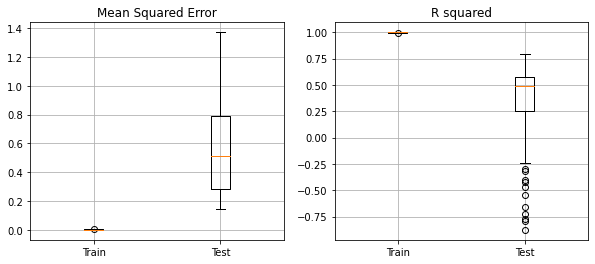

Train MSE standard deviation: 0.001263316460617386
Test MSE standard deviation:  0.30267017896007103

Train_R2 standard deviation: 0.001072911044571722
Test_R2 standard deviation:  0.3865682161644482


In [122]:
# Juan's ##### MODEL PERFORMANCE #############

Model_Performance(model,X_train,y_train,X_test, y_test)

In [123]:
############## JUAN'S METRICS ###############

y_pred_Test   = model.predict(X_test) 

Metrics(y_test, y_pred_Test)

Test Metrics:
R squared: 0.9140351172412737
Mean Absolute Error: 0.14637941950404373
Mean Squared Error: 0.06788519498625557
Root Mean Squared Error: 0.26054787465311546


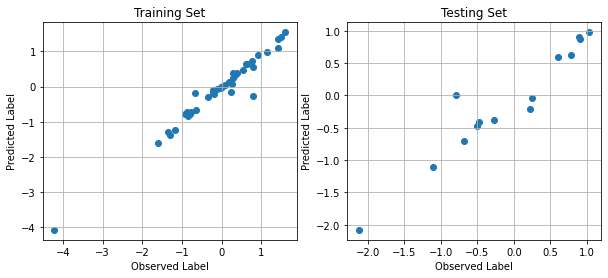

In [124]:
############### PREDICTED PLOT ##################

y_pred_Train  = model.predict(X_train)  #Predictions on training model
y_pred_Test   = model.predict(X_test)
#
Predicted_Plot(y_train, y_pred_Train, y_test, y_pred_Test)

### Multiple Runs

  1%|          | 1/100 [00:00<00:12,  7.74it/s]

Learning rate set to 0.162497
0:	learn: 1.0090684	total: 772us	remaining: 76.5ms
1:	learn: 0.9573490	total: 1.69ms	remaining: 82.9ms
2:	learn: 0.9086304	total: 2.03ms	remaining: 65.5ms
3:	learn: 0.8743899	total: 3.2ms	remaining: 76.8ms
4:	learn: 0.8240748	total: 3.63ms	remaining: 69ms
5:	learn: 0.7851793	total: 4.04ms	remaining: 63.3ms
6:	learn: 0.7439518	total: 4.38ms	remaining: 58.1ms
7:	learn: 0.7099270	total: 4.65ms	remaining: 53.4ms
8:	learn: 0.6816467	total: 5.2ms	remaining: 52.6ms
9:	learn: 0.6457265	total: 10.1ms	remaining: 90.9ms
10:	learn: 0.6133693	total: 10.4ms	remaining: 84.4ms
11:	learn: 0.5889230	total: 12.8ms	remaining: 93.7ms
12:	learn: 0.5653646	total: 13.1ms	remaining: 87.6ms
13:	learn: 0.5429153	total: 13.4ms	remaining: 82.2ms
14:	learn: 0.5277288	total: 13.8ms	remaining: 78ms
15:	learn: 0.5123084	total: 14ms	remaining: 73.5ms
16:	learn: 0.4906748	total: 18.1ms	remaining: 88.2ms
17:	learn: 0.4710300	total: 18.4ms	remaining: 83.8ms
18:	learn: 0.4565282	total: 19.7ms	

  3%|▎         | 3/100 [00:00<00:12,  7.64it/s]

90:	learn: 0.0779645	total: 67.6ms	remaining: 6.69ms
91:	learn: 0.0762541	total: 68.9ms	remaining: 5.99ms
92:	learn: 0.0750468	total: 69.6ms	remaining: 5.24ms
93:	learn: 0.0739224	total: 70.2ms	remaining: 4.48ms
94:	learn: 0.0713410	total: 70.8ms	remaining: 3.72ms
95:	learn: 0.0684383	total: 71.6ms	remaining: 2.98ms
96:	learn: 0.0667257	total: 72.2ms	remaining: 2.23ms
97:	learn: 0.0643974	total: 72.8ms	remaining: 1.48ms
98:	learn: 0.0630412	total: 73.3ms	remaining: 740us
99:	learn: 0.0612224	total: 73.8ms	remaining: 0us
Learning rate set to 0.162497
0:	learn: 0.9952911	total: 453us	remaining: 44.9ms
1:	learn: 0.9400924	total: 1.15ms	remaining: 56.2ms
2:	learn: 0.8894461	total: 1.73ms	remaining: 56.1ms
3:	learn: 0.8504034	total: 2.26ms	remaining: 54.3ms
4:	learn: 0.8120613	total: 2.83ms	remaining: 53.7ms
5:	learn: 0.7747278	total: 3.36ms	remaining: 52.7ms
6:	learn: 0.7420158	total: 3.9ms	remaining: 51.8ms
7:	learn: 0.7126421	total: 4.45ms	remaining: 51.2ms
8:	learn: 0.6806450	total: 4.9

  4%|▍         | 4/100 [00:00<00:12,  7.53it/s]

18:	learn: 0.4575718	total: 10.6ms	remaining: 45.3ms
19:	learn: 0.4431498	total: 11.1ms	remaining: 44.3ms
20:	learn: 0.4282219	total: 11.9ms	remaining: 44.7ms
21:	learn: 0.4183313	total: 12.3ms	remaining: 43.7ms
22:	learn: 0.4029004	total: 12.8ms	remaining: 42.7ms
23:	learn: 0.3885616	total: 13.2ms	remaining: 41.7ms
24:	learn: 0.3777030	total: 13.7ms	remaining: 41.2ms
25:	learn: 0.3622850	total: 14.9ms	remaining: 42.3ms
26:	learn: 0.3564347	total: 15ms	remaining: 40.7ms
27:	learn: 0.3473062	total: 15.4ms	remaining: 39.6ms
28:	learn: 0.3388959	total: 15.7ms	remaining: 38.5ms
29:	learn: 0.3303780	total: 16ms	remaining: 37.4ms
30:	learn: 0.3209799	total: 16.4ms	remaining: 36.5ms
31:	learn: 0.3053469	total: 16.7ms	remaining: 35.5ms
32:	learn: 0.2970643	total: 17ms	remaining: 34.6ms
33:	learn: 0.2930598	total: 17.2ms	remaining: 33.4ms
34:	learn: 0.2824037	total: 17.5ms	remaining: 32.5ms
35:	learn: 0.2744446	total: 17.8ms	remaining: 31.7ms
36:	learn: 0.2690365	total: 18.1ms	remaining: 30.9ms

  6%|▌         | 6/100 [00:00<00:12,  7.80it/s]

Learning rate set to 0.162497
0:	learn: 0.9683895	total: 481us	remaining: 47.6ms
1:	learn: 0.9215139	total: 858us	remaining: 42.1ms
2:	learn: 0.8741794	total: 1.23ms	remaining: 39.9ms
3:	learn: 0.8439423	total: 1.87ms	remaining: 44.9ms
4:	learn: 0.8025202	total: 2.45ms	remaining: 46.6ms
5:	learn: 0.7700266	total: 3ms	remaining: 47.1ms
6:	learn: 0.7295581	total: 3.53ms	remaining: 47ms
7:	learn: 0.6993521	total: 4.07ms	remaining: 46.8ms
8:	learn: 0.6664666	total: 4.61ms	remaining: 46.6ms
9:	learn: 0.6339906	total: 5.12ms	remaining: 46.1ms
10:	learn: 0.6053441	total: 5.66ms	remaining: 45.8ms
11:	learn: 0.5785596	total: 6.18ms	remaining: 45.3ms
12:	learn: 0.5561934	total: 6.91ms	remaining: 46.2ms
13:	learn: 0.5386470	total: 7.43ms	remaining: 45.7ms
14:	learn: 0.5225848	total: 8.01ms	remaining: 45.4ms
15:	learn: 0.5013137	total: 8.55ms	remaining: 44.9ms
16:	learn: 0.4824231	total: 9.07ms	remaining: 44.3ms
17:	learn: 0.4653755	total: 9.59ms	remaining: 43.7ms
18:	learn: 0.4515307	total: 10ms	

  8%|▊         | 8/100 [00:01<00:11,  8.17it/s]

Learning rate set to 0.162497
0:	learn: 0.9777292	total: 1.32ms	remaining: 130ms
1:	learn: 0.9188442	total: 1.8ms	remaining: 88.1ms
2:	learn: 0.8677461	total: 3.2ms	remaining: 103ms
3:	learn: 0.8327441	total: 3.52ms	remaining: 84.6ms
4:	learn: 0.7903513	total: 3.86ms	remaining: 73.4ms
5:	learn: 0.7551532	total: 4.33ms	remaining: 67.8ms
6:	learn: 0.7198493	total: 4.76ms	remaining: 63.2ms
7:	learn: 0.6861563	total: 5.16ms	remaining: 59.4ms
8:	learn: 0.6499693	total: 5.68ms	remaining: 57.4ms
9:	learn: 0.6210126	total: 6.08ms	remaining: 54.7ms
10:	learn: 0.5918045	total: 6.46ms	remaining: 52.3ms
11:	learn: 0.5666907	total: 7.38ms	remaining: 54.2ms
12:	learn: 0.5429840	total: 7.79ms	remaining: 52.1ms
13:	learn: 0.5221565	total: 8.14ms	remaining: 50ms
14:	learn: 0.4988633	total: 8.47ms	remaining: 48ms
15:	learn: 0.4804098	total: 10.1ms	remaining: 52.9ms
16:	learn: 0.4622058	total: 10.5ms	remaining: 51.4ms
17:	learn: 0.4497449	total: 10.9ms	remaining: 49.8ms
18:	learn: 0.4361619	total: 11.3ms

 10%|█         | 10/100 [00:01<00:10,  8.21it/s]

Learning rate set to 0.162497
0:	learn: 0.7385869	total: 489us	remaining: 48.5ms
1:	learn: 0.7029323	total: 1.12ms	remaining: 54.9ms
2:	learn: 0.6631342	total: 1.7ms	remaining: 55ms
3:	learn: 0.6397307	total: 2.22ms	remaining: 53.4ms
4:	learn: 0.6082482	total: 3.01ms	remaining: 57.2ms
5:	learn: 0.5812678	total: 3.54ms	remaining: 55.5ms
6:	learn: 0.5544297	total: 4.11ms	remaining: 54.6ms
7:	learn: 0.5248209	total: 4.65ms	remaining: 53.5ms
8:	learn: 0.5023640	total: 5.3ms	remaining: 53.6ms
9:	learn: 0.4801585	total: 6.22ms	remaining: 56ms
10:	learn: 0.4583290	total: 6.75ms	remaining: 54.6ms
11:	learn: 0.4395709	total: 7.55ms	remaining: 55.4ms
12:	learn: 0.4190077	total: 8.46ms	remaining: 56.6ms
13:	learn: 0.4038684	total: 9.01ms	remaining: 55.3ms
14:	learn: 0.3897452	total: 9.54ms	remaining: 54.1ms
15:	learn: 0.3734446	total: 10.1ms	remaining: 53ms
16:	learn: 0.3576576	total: 10.6ms	remaining: 52ms
17:	learn: 0.3448895	total: 11.2ms	remaining: 50.9ms
18:	learn: 0.3347396	total: 11.7ms	re

 12%|█▏        | 12/100 [00:01<00:10,  8.58it/s]

Learning rate set to 0.162497
0:	learn: 0.9901085	total: 456us	remaining: 45.2ms
1:	learn: 0.9379734	total: 832us	remaining: 40.8ms
2:	learn: 0.8866205	total: 1.17ms	remaining: 37.7ms
3:	learn: 0.8484788	total: 1.5ms	remaining: 36ms
4:	learn: 0.8043917	total: 1.75ms	remaining: 33.2ms
5:	learn: 0.7689126	total: 2.07ms	remaining: 32.4ms
6:	learn: 0.7350948	total: 2.42ms	remaining: 32.2ms
7:	learn: 0.7043932	total: 2.77ms	remaining: 31.9ms
8:	learn: 0.6689938	total: 3.34ms	remaining: 33.7ms
9:	learn: 0.6388438	total: 3.86ms	remaining: 34.8ms
10:	learn: 0.6101237	total: 4.37ms	remaining: 35.4ms
11:	learn: 0.5825269	total: 4.89ms	remaining: 35.9ms
12:	learn: 0.5625937	total: 5.41ms	remaining: 36.2ms
13:	learn: 0.5438336	total: 5.93ms	remaining: 36.4ms
14:	learn: 0.5226540	total: 6.68ms	remaining: 37.9ms
15:	learn: 0.5040095	total: 7.58ms	remaining: 39.8ms
16:	learn: 0.4859004	total: 8.29ms	remaining: 40.5ms
17:	learn: 0.4657369	total: 9.02ms	remaining: 41.1ms
18:	learn: 0.4539381	total: 9.6

 14%|█▍        | 14/100 [00:01<00:09,  8.67it/s]

Learning rate set to 0.162497
0:	learn: 0.7996735	total: 1.43ms	remaining: 142ms
1:	learn: 0.7601589	total: 1.83ms	remaining: 89.9ms
2:	learn: 0.7212668	total: 2.18ms	remaining: 70.5ms
3:	learn: 0.6833308	total: 2.51ms	remaining: 60.2ms
4:	learn: 0.6484383	total: 2.76ms	remaining: 52.4ms
5:	learn: 0.6255504	total: 3.08ms	remaining: 48.3ms
6:	learn: 0.5900782	total: 3.44ms	remaining: 45.7ms
7:	learn: 0.5636334	total: 3.77ms	remaining: 43.3ms
8:	learn: 0.5345355	total: 4.09ms	remaining: 41.3ms
9:	learn: 0.5118880	total: 4.42ms	remaining: 39.8ms
10:	learn: 0.4852714	total: 4.77ms	remaining: 38.6ms
11:	learn: 0.4636847	total: 5.09ms	remaining: 37.3ms
12:	learn: 0.4439425	total: 5.42ms	remaining: 36.3ms
13:	learn: 0.4254562	total: 5.75ms	remaining: 35.3ms
14:	learn: 0.4100063	total: 6.08ms	remaining: 34.4ms
15:	learn: 0.3992216	total: 6.39ms	remaining: 33.6ms
16:	learn: 0.3773174	total: 6.71ms	remaining: 32.8ms
17:	learn: 0.3633182	total: 7.05ms	remaining: 32.1ms
18:	learn: 0.3508966	total:

 16%|█▌        | 16/100 [00:01<00:10,  8.36it/s]

Learning rate set to 0.162497
0:	learn: 0.9962817	total: 418us	remaining: 41.4ms
1:	learn: 0.9465188	total: 1.05ms	remaining: 51.7ms
2:	learn: 0.8941575	total: 4.53ms	remaining: 146ms
3:	learn: 0.8650881	total: 5.45ms	remaining: 131ms
4:	learn: 0.8190651	total: 6.54ms	remaining: 124ms
5:	learn: 0.7817875	total: 7.69ms	remaining: 121ms
6:	learn: 0.7444989	total: 8.76ms	remaining: 116ms
7:	learn: 0.7155793	total: 9.75ms	remaining: 112ms
8:	learn: 0.6915457	total: 10.8ms	remaining: 109ms
9:	learn: 0.6591183	total: 11.8ms	remaining: 107ms
10:	learn: 0.6420848	total: 12ms	remaining: 97.2ms
11:	learn: 0.6159269	total: 12.6ms	remaining: 92.6ms
12:	learn: 0.5917530	total: 13.2ms	remaining: 88.4ms
13:	learn: 0.5679268	total: 13.9ms	remaining: 85.2ms
14:	learn: 0.5431354	total: 14.4ms	remaining: 81.5ms
15:	learn: 0.5257442	total: 15.1ms	remaining: 79.2ms
16:	learn: 0.5028125	total: 15.7ms	remaining: 76.7ms
17:	learn: 0.4847598	total: 16.4ms	remaining: 74.8ms
18:	learn: 0.4683788	total: 17ms	rema

 18%|█▊        | 18/100 [00:02<00:09,  8.57it/s]

Learning rate set to 0.162497
0:	learn: 0.9330356	total: 403us	remaining: 40ms
1:	learn: 0.8950946	total: 1.02ms	remaining: 49.9ms
2:	learn: 0.8690045	total: 1.49ms	remaining: 48ms
3:	learn: 0.8311239	total: 1.94ms	remaining: 46.6ms
4:	learn: 0.7873786	total: 2.5ms	remaining: 47.6ms
5:	learn: 0.7514762	total: 3.09ms	remaining: 48.5ms
6:	learn: 0.7212153	total: 3.61ms	remaining: 48ms
7:	learn: 0.6899933	total: 4.15ms	remaining: 47.7ms
8:	learn: 0.6596920	total: 4.75ms	remaining: 48.1ms
9:	learn: 0.6252949	total: 5.92ms	remaining: 53.3ms
10:	learn: 0.6013340	total: 6.5ms	remaining: 52.6ms
11:	learn: 0.5768327	total: 7.21ms	remaining: 52.9ms
12:	learn: 0.5532272	total: 7.75ms	remaining: 51.9ms
13:	learn: 0.5367032	total: 8.12ms	remaining: 49.9ms
14:	learn: 0.5122798	total: 8.62ms	remaining: 48.9ms
15:	learn: 0.4934380	total: 9.03ms	remaining: 47.4ms
16:	learn: 0.4771971	total: 9.55ms	remaining: 46.6ms
17:	learn: 0.4607593	total: 10.1ms	remaining: 46ms
18:	learn: 0.4487800	total: 10.6ms	re

 20%|██        | 20/100 [00:02<00:09,  8.58it/s]

Learning rate set to 0.162497
0:	learn: 1.0001968	total: 417us	remaining: 41.3ms
1:	learn: 0.9442078	total: 1.15ms	remaining: 56.3ms
2:	learn: 0.8935276	total: 2.34ms	remaining: 75.8ms
3:	learn: 0.8517512	total: 3.58ms	remaining: 86.1ms
4:	learn: 0.8076330	total: 4.15ms	remaining: 78.8ms
5:	learn: 0.7708288	total: 4.7ms	remaining: 73.7ms
6:	learn: 0.7419122	total: 5.06ms	remaining: 67.3ms
7:	learn: 0.7035922	total: 5.58ms	remaining: 64.2ms
8:	learn: 0.6813336	total: 6.1ms	remaining: 61.6ms
9:	learn: 0.6483635	total: 6.62ms	remaining: 59.6ms
10:	learn: 0.6289100	total: 7.15ms	remaining: 57.9ms
11:	learn: 0.6065978	total: 7.7ms	remaining: 56.4ms
12:	learn: 0.5826330	total: 8.22ms	remaining: 55ms
13:	learn: 0.5616262	total: 8.75ms	remaining: 53.8ms
14:	learn: 0.5420084	total: 9.65ms	remaining: 54.7ms
15:	learn: 0.5264733	total: 10.2ms	remaining: 53.4ms
16:	learn: 0.5080878	total: 10.7ms	remaining: 52.4ms
17:	learn: 0.4987833	total: 11.2ms	remaining: 51ms
18:	learn: 0.4781112	total: 11.7ms

 22%|██▏       | 22/100 [00:02<00:09,  7.93it/s]

Learning rate set to 0.162497
0:	learn: 0.9756917	total: 550us	remaining: 54.5ms
1:	learn: 0.9304850	total: 2.62ms	remaining: 128ms
2:	learn: 0.8813019	total: 4.11ms	remaining: 133ms
3:	learn: 0.8632122	total: 4.83ms	remaining: 116ms
4:	learn: 0.8165050	total: 5.58ms	remaining: 106ms
5:	learn: 0.7758165	total: 6.63ms	remaining: 104ms
6:	learn: 0.7416633	total: 7.68ms	remaining: 102ms
7:	learn: 0.7106587	total: 8.79ms	remaining: 101ms
8:	learn: 0.6797067	total: 9.91ms	remaining: 100ms
9:	learn: 0.6486861	total: 11ms	remaining: 99ms
10:	learn: 0.6362672	total: 11.8ms	remaining: 95.6ms
11:	learn: 0.6175695	total: 12.6ms	remaining: 92.3ms
12:	learn: 0.5924993	total: 13.9ms	remaining: 93.1ms
13:	learn: 0.5718435	total: 14.9ms	remaining: 91.6ms
14:	learn: 0.5494062	total: 16ms	remaining: 90.8ms
15:	learn: 0.5334050	total: 16.7ms	remaining: 87.5ms
16:	learn: 0.5120077	total: 17.3ms	remaining: 84.6ms
17:	learn: 0.4901761	total: 18.5ms	remaining: 84.1ms
18:	learn: 0.4739410	total: 19ms	remainin

 24%|██▍       | 24/100 [00:02<00:10,  7.53it/s]

75:	learn: 0.0874370	total: 46.7ms	remaining: 14.7ms
76:	learn: 0.0844796	total: 47.3ms	remaining: 14.1ms
77:	learn: 0.0830289	total: 47.7ms	remaining: 13.5ms
78:	learn: 0.0800298	total: 48.8ms	remaining: 13ms
79:	learn: 0.0790556	total: 49.2ms	remaining: 12.3ms
80:	learn: 0.0770256	total: 49.6ms	remaining: 11.6ms
81:	learn: 0.0751581	total: 55.2ms	remaining: 12.1ms
82:	learn: 0.0725043	total: 56.8ms	remaining: 11.6ms
83:	learn: 0.0716847	total: 57.4ms	remaining: 10.9ms
84:	learn: 0.0704906	total: 58ms	remaining: 10.2ms
85:	learn: 0.0688520	total: 60.9ms	remaining: 9.91ms
86:	learn: 0.0669031	total: 63.3ms	remaining: 9.45ms
87:	learn: 0.0654442	total: 63.8ms	remaining: 8.7ms
88:	learn: 0.0640714	total: 64.3ms	remaining: 7.94ms
89:	learn: 0.0611902	total: 64.8ms	remaining: 7.2ms
90:	learn: 0.0599487	total: 65.4ms	remaining: 6.46ms
91:	learn: 0.0578668	total: 65.9ms	remaining: 5.73ms
92:	learn: 0.0572260	total: 66.5ms	remaining: 5ms
93:	learn: 0.0556603	total: 67ms	remaining: 4.27ms
94:	

 25%|██▌       | 25/100 [00:03<00:09,  7.66it/s]

Learning rate set to 0.162497
0:	learn: 0.9785281	total: 412us	remaining: 40.9ms
1:	learn: 0.9197821	total: 2.96ms	remaining: 145ms
2:	learn: 0.8668826	total: 3.69ms	remaining: 119ms
3:	learn: 0.8325341	total: 4.56ms	remaining: 109ms
4:	learn: 0.7941556	total: 5.32ms	remaining: 101ms
5:	learn: 0.7559130	total: 5.92ms	remaining: 92.8ms
6:	learn: 0.7188320	total: 6.55ms	remaining: 87ms
7:	learn: 0.6890544	total: 7.21ms	remaining: 82.9ms
8:	learn: 0.6540879	total: 7.79ms	remaining: 78.7ms
9:	learn: 0.6290459	total: 8.35ms	remaining: 75.1ms
10:	learn: 0.5966216	total: 8.88ms	remaining: 71.9ms
11:	learn: 0.5724643	total: 9.41ms	remaining: 69ms
12:	learn: 0.5519538	total: 10.1ms	remaining: 67.6ms
13:	learn: 0.5326332	total: 10.7ms	remaining: 65.6ms
14:	learn: 0.5141265	total: 11.2ms	remaining: 63.6ms
15:	learn: 0.4924697	total: 11.7ms	remaining: 61.4ms
16:	learn: 0.4781376	total: 12.2ms	remaining: 59.8ms
17:	learn: 0.4632423	total: 12.7ms	remaining: 57.8ms
18:	learn: 0.4454675	total: 13.2ms	

 27%|██▋       | 27/100 [00:03<00:08,  8.16it/s]

Learning rate set to 0.162497
0:	learn: 0.9967744	total: 420us	remaining: 41.7ms
1:	learn: 0.9364160	total: 776us	remaining: 38ms
2:	learn: 0.8864720	total: 1.15ms	remaining: 37ms
3:	learn: 0.8443342	total: 1.59ms	remaining: 38.2ms
4:	learn: 0.8000379	total: 2.16ms	remaining: 41ms
5:	learn: 0.7631510	total: 2.68ms	remaining: 42ms
6:	learn: 0.7342748	total: 3.01ms	remaining: 40ms
7:	learn: 0.6982567	total: 3.58ms	remaining: 41.1ms
8:	learn: 0.6752804	total: 4.13ms	remaining: 41.8ms
9:	learn: 0.6427524	total: 4.66ms	remaining: 42ms
10:	learn: 0.6164081	total: 5.19ms	remaining: 42ms
11:	learn: 0.5983360	total: 5.71ms	remaining: 41.9ms
12:	learn: 0.5763723	total: 6.22ms	remaining: 41.6ms
13:	learn: 0.5538595	total: 6.85ms	remaining: 42.1ms
14:	learn: 0.5354134	total: 7.37ms	remaining: 41.8ms
15:	learn: 0.5154418	total: 7.9ms	remaining: 41.5ms
16:	learn: 0.4942283	total: 8.46ms	remaining: 41.3ms
17:	learn: 0.4758560	total: 9.01ms	remaining: 41.1ms
18:	learn: 0.4576932	total: 9.54ms	remainin

 29%|██▉       | 29/100 [00:03<00:08,  8.51it/s]

Learning rate set to 0.162497
0:	learn: 0.9942888	total: 437us	remaining: 43.3ms
1:	learn: 0.9445571	total: 1.11ms	remaining: 54.2ms
2:	learn: 0.8954826	total: 1.66ms	remaining: 53.8ms
3:	learn: 0.8640704	total: 2.21ms	remaining: 53ms
4:	learn: 0.8253225	total: 2.64ms	remaining: 50.1ms
5:	learn: 0.7944048	total: 3.17ms	remaining: 49.6ms
6:	learn: 0.7613030	total: 3.9ms	remaining: 51.9ms
7:	learn: 0.7268962	total: 4.47ms	remaining: 51.4ms
8:	learn: 0.6918227	total: 5.18ms	remaining: 52.4ms
9:	learn: 0.6689710	total: 5.75ms	remaining: 51.8ms
10:	learn: 0.6428773	total: 6.51ms	remaining: 52.7ms
11:	learn: 0.6142609	total: 7.07ms	remaining: 51.9ms
12:	learn: 0.5918395	total: 7.72ms	remaining: 51.7ms
13:	learn: 0.5721642	total: 8.26ms	remaining: 50.7ms
14:	learn: 0.5430266	total: 8.99ms	remaining: 51ms
15:	learn: 0.5247411	total: 9.53ms	remaining: 50ms
16:	learn: 0.5074498	total: 10ms	remaining: 49.1ms
17:	learn: 0.4931452	total: 10.6ms	remaining: 48.1ms
18:	learn: 0.4795410	total: 11.1ms	r

 31%|███       | 31/100 [00:03<00:08,  8.54it/s]

Learning rate set to 0.162497
0:	learn: 1.0151115	total: 486us	remaining: 48.1ms
1:	learn: 0.9701470	total: 1.03ms	remaining: 50.5ms
2:	learn: 0.9156966	total: 1.9ms	remaining: 61.5ms
3:	learn: 0.8819423	total: 2.24ms	remaining: 53.7ms
4:	learn: 0.8362994	total: 2.56ms	remaining: 48.6ms
5:	learn: 0.7997228	total: 3.57ms	remaining: 55.9ms
6:	learn: 0.7639387	total: 3.91ms	remaining: 51.9ms
7:	learn: 0.7275208	total: 4.7ms	remaining: 54.1ms
8:	learn: 0.6992559	total: 5.04ms	remaining: 51ms
9:	learn: 0.6701806	total: 5.81ms	remaining: 52.3ms
10:	learn: 0.6382528	total: 6.13ms	remaining: 49.6ms
11:	learn: 0.6070911	total: 6.84ms	remaining: 50.1ms
12:	learn: 0.5820540	total: 7.14ms	remaining: 47.8ms
13:	learn: 0.5636995	total: 7.35ms	remaining: 45.2ms
14:	learn: 0.5463664	total: 8.28ms	remaining: 46.9ms
15:	learn: 0.5257652	total: 8.58ms	remaining: 45.1ms
16:	learn: 0.5097028	total: 8.87ms	remaining: 43.3ms
17:	learn: 0.4965798	total: 9.87ms	remaining: 44.9ms
18:	learn: 0.4804395	total: 10.

 33%|███▎      | 33/100 [00:04<00:08,  8.24it/s]

Learning rate set to 0.162497
0:	learn: 1.0102391	total: 388us	remaining: 38.5ms
1:	learn: 0.9509827	total: 996us	remaining: 48.8ms
2:	learn: 0.8951618	total: 1.55ms	remaining: 50ms
3:	learn: 0.8662543	total: 1.94ms	remaining: 46.6ms
4:	learn: 0.8235049	total: 2.46ms	remaining: 46.8ms
5:	learn: 0.7791095	total: 2.98ms	remaining: 46.7ms
6:	learn: 0.7444984	total: 3.49ms	remaining: 46.4ms
7:	learn: 0.7097319	total: 4.03ms	remaining: 46.3ms
8:	learn: 0.6851988	total: 4.55ms	remaining: 46ms
9:	learn: 0.6505917	total: 5.08ms	remaining: 45.7ms
10:	learn: 0.6370755	total: 5.61ms	remaining: 45.4ms
11:	learn: 0.6088403	total: 6.16ms	remaining: 45.2ms
12:	learn: 0.5770018	total: 6.71ms	remaining: 44.9ms
13:	learn: 0.5494791	total: 7.25ms	remaining: 44.6ms
14:	learn: 0.5256239	total: 7.78ms	remaining: 44.1ms
15:	learn: 0.5034611	total: 8.19ms	remaining: 43ms
16:	learn: 0.4829804	total: 8.71ms	remaining: 42.5ms
17:	learn: 0.4607236	total: 9.21ms	remaining: 42ms
18:	learn: 0.4436279	total: 9.73ms	r

 35%|███▌      | 35/100 [00:04<00:07,  8.46it/s]

Learning rate set to 0.162497
0:	learn: 0.9999774	total: 392us	remaining: 38.9ms
1:	learn: 0.9446691	total: 1ms	remaining: 49.3ms
2:	learn: 0.8922364	total: 1.54ms	remaining: 49.7ms
3:	learn: 0.8522511	total: 2.08ms	remaining: 49.9ms
4:	learn: 0.8091747	total: 2.53ms	remaining: 48.1ms
5:	learn: 0.7697814	total: 3.04ms	remaining: 47.7ms
6:	learn: 0.7335078	total: 3.74ms	remaining: 49.7ms
7:	learn: 0.6946296	total: 4.3ms	remaining: 49.5ms
8:	learn: 0.6618440	total: 4.83ms	remaining: 48.8ms
9:	learn: 0.6339132	total: 5.36ms	remaining: 48.2ms
10:	learn: 0.6052939	total: 5.88ms	remaining: 47.6ms
11:	learn: 0.5777233	total: 6.39ms	remaining: 46.9ms
12:	learn: 0.5568575	total: 6.92ms	remaining: 46.3ms
13:	learn: 0.5387264	total: 8.36ms	remaining: 51.4ms
14:	learn: 0.5179449	total: 8.73ms	remaining: 49.5ms
15:	learn: 0.5022904	total: 9.27ms	remaining: 48.7ms
16:	learn: 0.4875148	total: 9.79ms	remaining: 47.8ms
17:	learn: 0.4711681	total: 10.3ms	remaining: 47ms
18:	learn: 0.4534331	total: 10.8m

 37%|███▋      | 37/100 [00:04<00:07,  8.27it/s]

Learning rate set to 0.162497
0:	learn: 0.9596739	total: 426us	remaining: 42.2ms
1:	learn: 0.9183929	total: 792us	remaining: 38.8ms
2:	learn: 0.8710384	total: 1.2ms	remaining: 38.8ms
3:	learn: 0.8398435	total: 1.6ms	remaining: 38.3ms
4:	learn: 0.8017592	total: 2.3ms	remaining: 43.7ms
5:	learn: 0.7649410	total: 2.84ms	remaining: 44.5ms
6:	learn: 0.7370022	total: 3.27ms	remaining: 43.4ms
7:	learn: 0.7046192	total: 3.84ms	remaining: 44.2ms
8:	learn: 0.6756605	total: 4.41ms	remaining: 44.6ms
9:	learn: 0.6473962	total: 5.14ms	remaining: 46.2ms
10:	learn: 0.6246059	total: 5.87ms	remaining: 47.5ms
11:	learn: 0.6008276	total: 6.53ms	remaining: 47.9ms
12:	learn: 0.5763080	total: 7.06ms	remaining: 47.2ms
13:	learn: 0.5550103	total: 7.66ms	remaining: 47.1ms
14:	learn: 0.5328218	total: 8.37ms	remaining: 47.4ms
15:	learn: 0.5133527	total: 8.93ms	remaining: 46.9ms
16:	learn: 0.4919761	total: 9.45ms	remaining: 46.2ms
17:	learn: 0.4772220	total: 10.3ms	remaining: 46.8ms
18:	learn: 0.4632400	total: 10.

 39%|███▉      | 39/100 [00:04<00:07,  8.39it/s]

96:	learn: 0.0556150	total: 62.6ms	remaining: 1.94ms
97:	learn: 0.0548486	total: 63ms	remaining: 1.29ms
98:	learn: 0.0533240	total: 63.4ms	remaining: 640us
99:	learn: 0.0521272	total: 64.9ms	remaining: 0us
Learning rate set to 0.162497
0:	learn: 0.9936748	total: 428us	remaining: 42.5ms
1:	learn: 0.9423522	total: 1.08ms	remaining: 52.8ms
2:	learn: 0.8898243	total: 1.62ms	remaining: 52.3ms
3:	learn: 0.8713246	total: 2.03ms	remaining: 48.7ms
4:	learn: 0.8246380	total: 2.54ms	remaining: 48.3ms
5:	learn: 0.7845860	total: 3.06ms	remaining: 48ms
6:	learn: 0.7488965	total: 3.66ms	remaining: 48.6ms
7:	learn: 0.7121335	total: 4.18ms	remaining: 48ms
8:	learn: 0.6905045	total: 4.72ms	remaining: 47.8ms
9:	learn: 0.6603457	total: 5.26ms	remaining: 47.3ms
10:	learn: 0.6473858	total: 5.64ms	remaining: 45.6ms
11:	learn: 0.6252742	total: 6.17ms	remaining: 45.3ms
12:	learn: 0.6004713	total: 6.84ms	remaining: 45.7ms
13:	learn: 0.5802687	total: 7.34ms	remaining: 45.1ms
14:	learn: 0.5591112	total: 7.86ms	re

 41%|████      | 41/100 [00:04<00:07,  8.39it/s]

75:	learn: 0.0951257	total: 43.7ms	remaining: 13.8ms
76:	learn: 0.0916257	total: 44.1ms	remaining: 13.2ms
77:	learn: 0.0886029	total: 44.6ms	remaining: 12.6ms
78:	learn: 0.0860144	total: 45ms	remaining: 12ms
79:	learn: 0.0848399	total: 46.1ms	remaining: 11.5ms
80:	learn: 0.0823259	total: 46.6ms	remaining: 10.9ms
81:	learn: 0.0812295	total: 52.3ms	remaining: 11.5ms
82:	learn: 0.0788469	total: 52.9ms	remaining: 10.8ms
83:	learn: 0.0766454	total: 53.4ms	remaining: 10.2ms
84:	learn: 0.0751235	total: 54ms	remaining: 9.53ms
85:	learn: 0.0728794	total: 54.6ms	remaining: 8.88ms
86:	learn: 0.0705561	total: 55.4ms	remaining: 8.27ms
87:	learn: 0.0696635	total: 55.9ms	remaining: 7.62ms
88:	learn: 0.0674791	total: 56.5ms	remaining: 6.98ms
89:	learn: 0.0661806	total: 57ms	remaining: 6.34ms
90:	learn: 0.0646678	total: 57.5ms	remaining: 5.69ms
91:	learn: 0.0626835	total: 58.1ms	remaining: 5.05ms
92:	learn: 0.0612653	total: 58.6ms	remaining: 4.41ms
93:	learn: 0.0595350	total: 59.1ms	remaining: 3.77ms
9

 42%|████▏     | 42/100 [00:05<00:07,  8.25it/s]

18:	learn: 0.4718648	total: 15.4ms	remaining: 65.5ms
19:	learn: 0.4610666	total: 15.8ms	remaining: 63.3ms
20:	learn: 0.4485104	total: 16.3ms	remaining: 61.3ms
21:	learn: 0.4345595	total: 16.7ms	remaining: 59.2ms
22:	learn: 0.4205956	total: 17.3ms	remaining: 58ms
23:	learn: 0.4094921	total: 18ms	remaining: 57.1ms
24:	learn: 0.3982429	total: 18.6ms	remaining: 55.8ms
25:	learn: 0.3891238	total: 19.1ms	remaining: 54.3ms
26:	learn: 0.3756341	total: 19.6ms	remaining: 52.9ms
27:	learn: 0.3685037	total: 24.1ms	remaining: 62ms
28:	learn: 0.3602457	total: 24.7ms	remaining: 60.5ms
29:	learn: 0.3432928	total: 25.3ms	remaining: 59ms
30:	learn: 0.3326285	total: 25.8ms	remaining: 57.5ms
31:	learn: 0.3189401	total: 26.4ms	remaining: 56ms
32:	learn: 0.3099768	total: 26.9ms	remaining: 54.6ms
33:	learn: 0.3037571	total: 27.4ms	remaining: 53.3ms
34:	learn: 0.2942113	total: 28ms	remaining: 51.9ms
35:	learn: 0.2858827	total: 28.5ms	remaining: 50.7ms
36:	learn: 0.2780720	total: 29ms	remaining: 49.4ms
37:	lea

 44%|████▍     | 44/100 [00:05<00:07,  7.89it/s]

Learning rate set to 0.162497
0:	learn: 0.9689846	total: 376us	remaining: 37.2ms
1:	learn: 0.9089099	total: 1.9ms	remaining: 93.3ms
2:	learn: 0.8646515	total: 2.55ms	remaining: 82.5ms
3:	learn: 0.8341655	total: 3ms	remaining: 72.1ms
4:	learn: 0.7955157	total: 3.42ms	remaining: 65ms
5:	learn: 0.7562066	total: 4.07ms	remaining: 63.7ms
6:	learn: 0.7251636	total: 4.64ms	remaining: 61.7ms
7:	learn: 0.6955984	total: 5.19ms	remaining: 59.7ms
8:	learn: 0.6686910	total: 5.75ms	remaining: 58.1ms
9:	learn: 0.6443709	total: 6.3ms	remaining: 56.8ms
10:	learn: 0.6324077	total: 6.76ms	remaining: 54.7ms
11:	learn: 0.6146394	total: 7.13ms	remaining: 52.3ms
12:	learn: 0.5911841	total: 7.75ms	remaining: 51.9ms
13:	learn: 0.5731791	total: 8.27ms	remaining: 50.8ms
14:	learn: 0.5502713	total: 8.83ms	remaining: 50ms
15:	learn: 0.5350492	total: 9.25ms	remaining: 48.5ms
16:	learn: 0.5154395	total: 9.64ms	remaining: 47.1ms
17:	learn: 0.5024218	total: 10.3ms	remaining: 46.8ms
18:	learn: 0.4869336	total: 10.8ms	r

 46%|████▌     | 46/100 [00:05<00:06,  8.23it/s]

Learning rate set to 0.162497
0:	learn: 0.8140851	total: 595us	remaining: 59ms
1:	learn: 0.7602636	total: 2.09ms	remaining: 103ms
2:	learn: 0.7160686	total: 2.73ms	remaining: 88.5ms
3:	learn: 0.6809847	total: 3.33ms	remaining: 79.9ms
4:	learn: 0.6417935	total: 3.92ms	remaining: 74.5ms
5:	learn: 0.6136428	total: 4.75ms	remaining: 74.3ms
6:	learn: 0.5751353	total: 5.3ms	remaining: 70.4ms
7:	learn: 0.5413338	total: 5.88ms	remaining: 67.6ms
8:	learn: 0.5144912	total: 6.45ms	remaining: 65.2ms
9:	learn: 0.4905712	total: 6.97ms	remaining: 62.8ms
10:	learn: 0.4692433	total: 7.5ms	remaining: 60.7ms
11:	learn: 0.4484946	total: 8ms	remaining: 58.7ms
12:	learn: 0.4294251	total: 8.52ms	remaining: 57ms
13:	learn: 0.4099062	total: 8.94ms	remaining: 54.9ms
14:	learn: 0.3935131	total: 9.45ms	remaining: 53.6ms
15:	learn: 0.3747927	total: 9.98ms	remaining: 52.4ms
16:	learn: 0.3530899	total: 10.4ms	remaining: 50.9ms
17:	learn: 0.3382469	total: 10.9ms	remaining: 49.5ms
18:	learn: 0.3231429	total: 11.4ms	re

 49%|████▉     | 49/100 [00:05<00:05,  8.94it/s]

Learning rate set to 0.162497
0:	learn: 0.8096800	total: 443us	remaining: 43.9ms
1:	learn: 0.7587275	total: 1.04ms	remaining: 50.8ms
2:	learn: 0.7148190	total: 1.55ms	remaining: 50.3ms
3:	learn: 0.6747458	total: 2.09ms	remaining: 50.1ms
4:	learn: 0.6351488	total: 2.62ms	remaining: 49.8ms
5:	learn: 0.6120130	total: 3.13ms	remaining: 49ms
6:	learn: 0.5833404	total: 3.49ms	remaining: 46.3ms
7:	learn: 0.5546978	total: 3.97ms	remaining: 45.7ms
8:	learn: 0.5289747	total: 4.5ms	remaining: 45.5ms
9:	learn: 0.5049371	total: 5.01ms	remaining: 45.1ms
10:	learn: 0.4819265	total: 5.53ms	remaining: 44.7ms
11:	learn: 0.4614714	total: 6.04ms	remaining: 44.3ms
12:	learn: 0.4333421	total: 6.55ms	remaining: 43.9ms
13:	learn: 0.4135767	total: 7.05ms	remaining: 43.3ms
14:	learn: 0.3966572	total: 7.57ms	remaining: 42.9ms
15:	learn: 0.3826044	total: 8.08ms	remaining: 42.4ms
16:	learn: 0.3657103	total: 8.74ms	remaining: 42.7ms
17:	learn: 0.3521522	total: 9.28ms	remaining: 42.3ms
18:	learn: 0.3438571	total: 9.

 50%|█████     | 50/100 [00:06<00:05,  8.59it/s]

Learning rate set to 0.162497
0:	learn: 0.9844758	total: 827us	remaining: 81.9ms
1:	learn: 0.9198131	total: 2.62ms	remaining: 128ms
2:	learn: 0.8661384	total: 2.96ms	remaining: 95.6ms
3:	learn: 0.8278759	total: 3.28ms	remaining: 78.6ms
4:	learn: 0.7912242	total: 3.59ms	remaining: 68.3ms
5:	learn: 0.7609209	total: 3.99ms	remaining: 62.5ms
6:	learn: 0.7207043	total: 4.61ms	remaining: 61.3ms
7:	learn: 0.6887027	total: 5.05ms	remaining: 58.1ms
8:	learn: 0.6636488	total: 5.46ms	remaining: 55.2ms
9:	learn: 0.6344216	total: 5.82ms	remaining: 52.3ms
10:	learn: 0.6060625	total: 7.4ms	remaining: 59.9ms
11:	learn: 0.5851824	total: 7.81ms	remaining: 57.3ms
12:	learn: 0.5590228	total: 8.23ms	remaining: 55.1ms
13:	learn: 0.5358771	total: 8.44ms	remaining: 51.8ms
14:	learn: 0.5166089	total: 8.82ms	remaining: 50ms
15:	learn: 0.4964469	total: 9.25ms	remaining: 48.6ms
16:	learn: 0.4787539	total: 9.63ms	remaining: 47ms
17:	learn: 0.4646105	total: 11.2ms	remaining: 51ms
18:	learn: 0.4515590	total: 11.8ms	

 52%|█████▏    | 52/100 [00:06<00:05,  8.66it/s]

Learning rate set to 0.162497
0:	learn: 0.9862991	total: 424us	remaining: 42.1ms
1:	learn: 0.9278678	total: 787us	remaining: 38.6ms
2:	learn: 0.8809280	total: 1.11ms	remaining: 35.9ms
3:	learn: 0.8422795	total: 1.3ms	remaining: 31.2ms
4:	learn: 0.8052529	total: 1.62ms	remaining: 30.7ms
5:	learn: 0.7654094	total: 1.93ms	remaining: 30.2ms
6:	learn: 0.7354404	total: 2.26ms	remaining: 30ms
7:	learn: 0.7045046	total: 2.56ms	remaining: 29.5ms
8:	learn: 0.6748027	total: 2.9ms	remaining: 29.3ms
9:	learn: 0.6440008	total: 3.21ms	remaining: 28.9ms
10:	learn: 0.6321922	total: 3.38ms	remaining: 27.3ms
11:	learn: 0.6124881	total: 3.84ms	remaining: 28.2ms
12:	learn: 0.5878864	total: 4.35ms	remaining: 29.1ms
13:	learn: 0.5638115	total: 4.88ms	remaining: 30ms
14:	learn: 0.5418921	total: 5.38ms	remaining: 30.5ms
15:	learn: 0.5218213	total: 5.76ms	remaining: 30.3ms
16:	learn: 0.5057956	total: 6.28ms	remaining: 30.6ms
17:	learn: 0.4892839	total: 6.81ms	remaining: 31ms
18:	learn: 0.4746570	total: 7.33ms	r

 54%|█████▍    | 54/100 [00:06<00:05,  8.57it/s]

Learning rate set to 0.162497
0:	learn: 0.8081209	total: 1.38ms	remaining: 137ms
1:	learn: 0.7640162	total: 2.48ms	remaining: 121ms
2:	learn: 0.7192871	total: 3.25ms	remaining: 105ms
3:	learn: 0.6881801	total: 3.6ms	remaining: 86.5ms
4:	learn: 0.6479595	total: 3.94ms	remaining: 74.9ms
5:	learn: 0.6175452	total: 4.3ms	remaining: 67.3ms
6:	learn: 0.5878503	total: 4.64ms	remaining: 61.6ms
7:	learn: 0.5612954	total: 4.95ms	remaining: 57ms
8:	learn: 0.5359090	total: 5.28ms	remaining: 53.4ms
9:	learn: 0.5095534	total: 5.63ms	remaining: 50.6ms
10:	learn: 0.4839727	total: 5.95ms	remaining: 48.2ms
11:	learn: 0.4653826	total: 6.29ms	remaining: 46.1ms
12:	learn: 0.4415214	total: 6.61ms	remaining: 44.3ms
13:	learn: 0.4261010	total: 6.78ms	remaining: 41.6ms
14:	learn: 0.4106995	total: 7.14ms	remaining: 40.5ms
15:	learn: 0.3882110	total: 7.5ms	remaining: 39.4ms
16:	learn: 0.3713005	total: 8.1ms	remaining: 39.5ms
17:	learn: 0.3524059	total: 8.67ms	remaining: 39.5ms
18:	learn: 0.3405071	total: 9.28ms	

 56%|█████▌    | 56/100 [00:06<00:05,  8.75it/s]

Learning rate set to 0.162497
0:	learn: 0.9352415	total: 408us	remaining: 40.4ms
1:	learn: 0.8816063	total: 1.02ms	remaining: 49.8ms
2:	learn: 0.8389764	total: 1.8ms	remaining: 58.1ms
3:	learn: 0.8026709	total: 2.53ms	remaining: 60.7ms
4:	learn: 0.7633212	total: 3.06ms	remaining: 58.1ms
5:	learn: 0.7317128	total: 3.59ms	remaining: 56.3ms
6:	learn: 0.7012125	total: 4.13ms	remaining: 54.8ms
7:	learn: 0.6703406	total: 4.65ms	remaining: 53.5ms
8:	learn: 0.6382406	total: 5.16ms	remaining: 52.1ms
9:	learn: 0.6105235	total: 5.67ms	remaining: 51.1ms
10:	learn: 0.5897361	total: 6.18ms	remaining: 50ms
11:	learn: 0.5642340	total: 6.69ms	remaining: 49.1ms
12:	learn: 0.5443842	total: 7.21ms	remaining: 48.3ms
13:	learn: 0.5288845	total: 7.71ms	remaining: 47.4ms
14:	learn: 0.5095150	total: 8.23ms	remaining: 46.7ms
15:	learn: 0.4932350	total: 8.67ms	remaining: 45.5ms
16:	learn: 0.4743481	total: 9.17ms	remaining: 44.8ms
17:	learn: 0.4630859	total: 9.71ms	remaining: 44.2ms
18:	learn: 0.4507185	total: 10

 58%|█████▊    | 58/100 [00:06<00:04,  8.60it/s]

Learning rate set to 0.162497
0:	learn: 0.9827404	total: 374us	remaining: 37.1ms
1:	learn: 0.9305556	total: 1.08ms	remaining: 52.8ms
2:	learn: 0.8815943	total: 1.69ms	remaining: 54.7ms
3:	learn: 0.8500346	total: 2.25ms	remaining: 54ms
4:	learn: 0.8120809	total: 2.96ms	remaining: 56.3ms
5:	learn: 0.7793113	total: 3.52ms	remaining: 55.1ms
6:	learn: 0.7461069	total: 4.03ms	remaining: 53.6ms
7:	learn: 0.7094020	total: 4.6ms	remaining: 52.9ms
8:	learn: 0.6744318	total: 5.12ms	remaining: 51.8ms
9:	learn: 0.6503860	total: 5.67ms	remaining: 51ms
10:	learn: 0.6191167	total: 6.19ms	remaining: 50.1ms
11:	learn: 0.5886468	total: 6.7ms	remaining: 49.2ms
12:	learn: 0.5691649	total: 7.26ms	remaining: 48.6ms
13:	learn: 0.5485779	total: 7.77ms	remaining: 47.7ms
14:	learn: 0.5264942	total: 8.28ms	remaining: 46.9ms
15:	learn: 0.5048783	total: 8.82ms	remaining: 46.3ms
16:	learn: 0.4855818	total: 9.34ms	remaining: 45.6ms
17:	learn: 0.4718172	total: 9.85ms	remaining: 44.9ms
18:	learn: 0.4545816	total: 10.4m

 60%|██████    | 60/100 [00:07<00:04,  8.37it/s]

Learning rate set to 0.162497
0:	learn: 0.9515917	total: 888us	remaining: 88ms
1:	learn: 0.9004893	total: 1.84ms	remaining: 90.2ms
2:	learn: 0.8507308	total: 2.2ms	remaining: 71ms
3:	learn: 0.8125947	total: 2.88ms	remaining: 69.2ms
4:	learn: 0.7714717	total: 3.44ms	remaining: 65.5ms
5:	learn: 0.7364153	total: 3.89ms	remaining: 61ms
6:	learn: 0.7009974	total: 4.05ms	remaining: 53.8ms
7:	learn: 0.6698164	total: 4.49ms	remaining: 51.6ms
8:	learn: 0.6441575	total: 4.88ms	remaining: 49.4ms
9:	learn: 0.6155649	total: 5.29ms	remaining: 47.6ms
10:	learn: 0.5873046	total: 5.68ms	remaining: 46ms
11:	learn: 0.5625451	total: 6.13ms	remaining: 45ms
12:	learn: 0.5403547	total: 6.55ms	remaining: 43.8ms
13:	learn: 0.5192326	total: 6.78ms	remaining: 41.6ms
14:	learn: 0.5025800	total: 14ms	remaining: 79.2ms
15:	learn: 0.4852665	total: 14.6ms	remaining: 76.5ms
16:	learn: 0.4677328	total: 15.1ms	remaining: 73.8ms
17:	learn: 0.4498732	total: 15.6ms	remaining: 71.2ms
18:	learn: 0.4358516	total: 15.9ms	remai

 62%|██████▏   | 62/100 [00:07<00:04,  8.66it/s]

Learning rate set to 0.162497
0:	learn: 0.9742918	total: 695us	remaining: 68.9ms
1:	learn: 0.9208532	total: 1.54ms	remaining: 75.3ms
2:	learn: 0.8740149	total: 2.1ms	remaining: 67.8ms
3:	learn: 0.8475273	total: 2.5ms	remaining: 60.1ms
4:	learn: 0.8087219	total: 3.03ms	remaining: 57.5ms
5:	learn: 0.7687360	total: 3.66ms	remaining: 57.3ms
6:	learn: 0.7364260	total: 4ms	remaining: 53.1ms
7:	learn: 0.7142486	total: 4.51ms	remaining: 51.8ms
8:	learn: 0.6795124	total: 5.04ms	remaining: 51ms
9:	learn: 0.6464184	total: 5.58ms	remaining: 50.2ms
10:	learn: 0.6213983	total: 6.07ms	remaining: 49.1ms
11:	learn: 0.5978592	total: 6.58ms	remaining: 48.3ms
12:	learn: 0.5744241	total: 7.08ms	remaining: 47.4ms
13:	learn: 0.5508724	total: 7.58ms	remaining: 46.6ms
14:	learn: 0.5302399	total: 8.1ms	remaining: 45.9ms
15:	learn: 0.5092080	total: 8.69ms	remaining: 45.6ms
16:	learn: 0.4907719	total: 9.32ms	remaining: 45.5ms
17:	learn: 0.4754453	total: 9.94ms	remaining: 45.3ms
18:	learn: 0.4589214	total: 10.5ms	

 64%|██████▍   | 64/100 [00:07<00:04,  8.50it/s]

Learning rate set to 0.162497
0:	learn: 0.9916282	total: 478us	remaining: 47.4ms
1:	learn: 0.9374396	total: 1.27ms	remaining: 62.3ms
2:	learn: 0.8885635	total: 2.05ms	remaining: 66.3ms
3:	learn: 0.8540539	total: 2.77ms	remaining: 66.5ms
4:	learn: 0.8069429	total: 3.26ms	remaining: 61.9ms
5:	learn: 0.7703568	total: 4.76ms	remaining: 74.5ms
6:	learn: 0.7267057	total: 5.54ms	remaining: 73.6ms
7:	learn: 0.6965199	total: 6.11ms	remaining: 70.2ms
8:	learn: 0.6626619	total: 6.93ms	remaining: 70.1ms
9:	learn: 0.6354002	total: 7.93ms	remaining: 71.4ms
10:	learn: 0.6067142	total: 8.59ms	remaining: 69.5ms
11:	learn: 0.5878990	total: 9.28ms	remaining: 68.1ms
12:	learn: 0.5680386	total: 9.62ms	remaining: 64.4ms
13:	learn: 0.5489199	total: 10.1ms	remaining: 61.9ms
14:	learn: 0.5317673	total: 10.7ms	remaining: 60.9ms
15:	learn: 0.5131577	total: 11.3ms	remaining: 59.5ms
16:	learn: 0.4955036	total: 12ms	remaining: 58.6ms
17:	learn: 0.4750880	total: 12.5ms	remaining: 57.1ms
18:	learn: 0.4636521	total: 1

 66%|██████▌   | 66/100 [00:07<00:03,  8.57it/s]

Learning rate set to 0.162497
0:	learn: 1.0266543	total: 1.16ms	remaining: 115ms
1:	learn: 0.9731743	total: 2.2ms	remaining: 108ms
2:	learn: 0.9224989	total: 2.92ms	remaining: 94.5ms
3:	learn: 0.8808421	total: 3.58ms	remaining: 86ms
4:	learn: 0.8403238	total: 4.11ms	remaining: 78.1ms
5:	learn: 0.8079203	total: 4.63ms	remaining: 72.5ms
6:	learn: 0.7709490	total: 5.16ms	remaining: 68.6ms
7:	learn: 0.7384187	total: 5.66ms	remaining: 65.1ms
8:	learn: 0.7093445	total: 6.19ms	remaining: 62.6ms
9:	learn: 0.6809937	total: 6.75ms	remaining: 60.8ms
10:	learn: 0.6478200	total: 7.25ms	remaining: 58.7ms
11:	learn: 0.6134610	total: 7.75ms	remaining: 56.8ms
12:	learn: 0.5905443	total: 8.26ms	remaining: 55.3ms
13:	learn: 0.5687459	total: 8.75ms	remaining: 53.8ms
14:	learn: 0.5512411	total: 9.26ms	remaining: 52.5ms
15:	learn: 0.5287786	total: 9.65ms	remaining: 50.7ms
16:	learn: 0.5111560	total: 10.2ms	remaining: 49.6ms
17:	learn: 0.4944476	total: 10.7ms	remaining: 48.7ms
18:	learn: 0.4856772	total: 11.

 68%|██████▊   | 68/100 [00:08<00:03,  8.59it/s]

Learning rate set to 0.162497
0:	learn: 0.9972361	total: 614us	remaining: 60.9ms
1:	learn: 0.9526162	total: 1.28ms	remaining: 62.6ms
2:	learn: 0.9045530	total: 1.88ms	remaining: 60.6ms
3:	learn: 0.8748956	total: 3.41ms	remaining: 81.8ms
4:	learn: 0.8314766	total: 3.98ms	remaining: 75.7ms
5:	learn: 0.7919133	total: 4.52ms	remaining: 70.9ms
6:	learn: 0.7507704	total: 5.04ms	remaining: 67ms
7:	learn: 0.7206170	total: 5.57ms	remaining: 64.1ms
8:	learn: 0.6949190	total: 6.11ms	remaining: 61.7ms
9:	learn: 0.6664340	total: 6.6ms	remaining: 59.4ms
10:	learn: 0.6386452	total: 7.11ms	remaining: 57.5ms
11:	learn: 0.6160170	total: 7.61ms	remaining: 55.8ms
12:	learn: 0.5921224	total: 8.1ms	remaining: 54.2ms
13:	learn: 0.5750231	total: 8.57ms	remaining: 52.6ms
14:	learn: 0.5585257	total: 9.07ms	remaining: 51.4ms
15:	learn: 0.5367830	total: 9.63ms	remaining: 50.5ms
16:	learn: 0.5154561	total: 10.2ms	remaining: 49.6ms
17:	learn: 0.5034587	total: 10.8ms	remaining: 49ms
18:	learn: 0.4901012	total: 11.3m

 70%|███████   | 70/100 [00:08<00:03,  8.23it/s]

Learning rate set to 0.162497
0:	learn: 0.8293478	total: 419us	remaining: 41.5ms
1:	learn: 0.7877821	total: 1.17ms	remaining: 57.3ms
2:	learn: 0.7440425	total: 2ms	remaining: 64.5ms
3:	learn: 0.7075515	total: 2.58ms	remaining: 61.9ms
4:	learn: 0.6656279	total: 3.15ms	remaining: 59.8ms
5:	learn: 0.6418904	total: 3.87ms	remaining: 60.6ms
6:	learn: 0.6155322	total: 4.27ms	remaining: 56.7ms
7:	learn: 0.5854414	total: 4.78ms	remaining: 55ms
8:	learn: 0.5600054	total: 5.33ms	remaining: 54ms
9:	learn: 0.5290415	total: 5.86ms	remaining: 52.7ms
10:	learn: 0.5020787	total: 6.38ms	remaining: 51.6ms
11:	learn: 0.4841085	total: 7.18ms	remaining: 52.6ms
12:	learn: 0.4598557	total: 7.71ms	remaining: 51.6ms
13:	learn: 0.4394564	total: 8.23ms	remaining: 50.6ms
14:	learn: 0.4225586	total: 8.77ms	remaining: 49.7ms
15:	learn: 0.4070936	total: 9.3ms	remaining: 48.8ms
16:	learn: 0.3935180	total: 9.82ms	remaining: 47.9ms
17:	learn: 0.3832548	total: 10.3ms	remaining: 47ms
18:	learn: 0.3735137	total: 10.8ms	re

 72%|███████▏  | 72/100 [00:08<00:03,  8.34it/s]

Learning rate set to 0.162497
0:	learn: 1.0090651	total: 462us	remaining: 45.8ms
1:	learn: 0.9497978	total: 1.14ms	remaining: 56ms
2:	learn: 0.8965714	total: 1.83ms	remaining: 59.2ms
3:	learn: 0.8605064	total: 2.43ms	remaining: 58.4ms
4:	learn: 0.8173912	total: 3.06ms	remaining: 58.1ms
5:	learn: 0.7846914	total: 3.77ms	remaining: 59ms
6:	learn: 0.7460851	total: 3.91ms	remaining: 51.9ms
7:	learn: 0.7098795	total: 4.37ms	remaining: 50.2ms
8:	learn: 0.6828109	total: 4.8ms	remaining: 48.5ms
9:	learn: 0.6500917	total: 6.01ms	remaining: 54.1ms
10:	learn: 0.6248008	total: 6.34ms	remaining: 51.3ms
11:	learn: 0.5987371	total: 6.67ms	remaining: 48.9ms
12:	learn: 0.5743259	total: 7.03ms	remaining: 47ms
13:	learn: 0.5521117	total: 7.39ms	remaining: 45.4ms
14:	learn: 0.5327421	total: 7.86ms	remaining: 44.5ms
15:	learn: 0.5187937	total: 8.39ms	remaining: 44.1ms
16:	learn: 0.5027434	total: 8.93ms	remaining: 43.6ms
17:	learn: 0.4856183	total: 9.44ms	remaining: 43ms
18:	learn: 0.4650521	total: 9.97ms	r

 74%|███████▍  | 74/100 [00:08<00:03,  8.61it/s]

Learning rate set to 0.162497
0:	learn: 0.9931128	total: 730us	remaining: 72.4ms
1:	learn: 0.9383992	total: 1.1ms	remaining: 53.7ms
2:	learn: 0.8878629	total: 2.15ms	remaining: 69.4ms
3:	learn: 0.8514155	total: 2.79ms	remaining: 67ms
4:	learn: 0.8132065	total: 3.23ms	remaining: 61.3ms
5:	learn: 0.7758421	total: 3.64ms	remaining: 57.1ms
6:	learn: 0.7357274	total: 4.09ms	remaining: 54.3ms
7:	learn: 0.7007265	total: 4.48ms	remaining: 51.6ms
8:	learn: 0.6676059	total: 4.91ms	remaining: 49.7ms
9:	learn: 0.6419939	total: 5.31ms	remaining: 47.8ms
10:	learn: 0.6113342	total: 5.67ms	remaining: 45.9ms
11:	learn: 0.5859237	total: 8.39ms	remaining: 61.6ms
12:	learn: 0.5623583	total: 8.7ms	remaining: 58.3ms
13:	learn: 0.5437457	total: 9.69ms	remaining: 59.5ms
14:	learn: 0.5280273	total: 10.3ms	remaining: 58.4ms
15:	learn: 0.5128252	total: 10.8ms	remaining: 56.6ms
16:	learn: 0.4936758	total: 11.1ms	remaining: 54.1ms
17:	learn: 0.4790950	total: 11.5ms	remaining: 52.2ms
18:	learn: 0.4708255	total: 13.

 76%|███████▌  | 76/100 [00:09<00:02,  8.19it/s]

Learning rate set to 0.162497
0:	learn: 0.9318615	total: 729us	remaining: 72.2ms
1:	learn: 0.8834027	total: 1.34ms	remaining: 65.7ms
2:	learn: 0.8336952	total: 1.89ms	remaining: 61ms
3:	learn: 0.7937495	total: 2.44ms	remaining: 58.5ms
4:	learn: 0.7563473	total: 3ms	remaining: 57ms
5:	learn: 0.7232904	total: 3.67ms	remaining: 57.6ms
6:	learn: 0.6899207	total: 5.59ms	remaining: 74.3ms
7:	learn: 0.6613603	total: 7.3ms	remaining: 84ms
8:	learn: 0.6307382	total: 7.73ms	remaining: 78.2ms
9:	learn: 0.6014689	total: 10.9ms	remaining: 98.3ms
10:	learn: 0.5782429	total: 11.4ms	remaining: 92.2ms
11:	learn: 0.5577719	total: 12.9ms	remaining: 94.7ms
12:	learn: 0.5356392	total: 14.3ms	remaining: 96ms
13:	learn: 0.5156396	total: 14.9ms	remaining: 91.8ms
14:	learn: 0.5003909	total: 16ms	remaining: 90.6ms
15:	learn: 0.4856616	total: 16.9ms	remaining: 88.5ms
16:	learn: 0.4676614	total: 17.9ms	remaining: 87.4ms
17:	learn: 0.4525207	total: 19ms	remaining: 86.5ms
18:	learn: 0.4412355	total: 19.9ms	remainin

 79%|███████▉  | 79/100 [00:09<00:02,  8.82it/s]

Learning rate set to 0.162497
0:	learn: 0.9588043	total: 401us	remaining: 39.7ms
1:	learn: 0.9137064	total: 831us	remaining: 40.7ms
2:	learn: 0.8688525	total: 1.39ms	remaining: 44.9ms
3:	learn: 0.8416872	total: 1.79ms	remaining: 43ms
4:	learn: 0.8011549	total: 2.47ms	remaining: 46.9ms
5:	learn: 0.7658513	total: 3.11ms	remaining: 48.8ms
6:	learn: 0.7388943	total: 3.63ms	remaining: 48.3ms
7:	learn: 0.7058704	total: 4.17ms	remaining: 47.9ms
8:	learn: 0.6814156	total: 4.69ms	remaining: 47.4ms
9:	learn: 0.6577957	total: 5.2ms	remaining: 46.8ms
10:	learn: 0.6464348	total: 5.61ms	remaining: 45.4ms
11:	learn: 0.6244736	total: 6.1ms	remaining: 44.7ms
12:	learn: 0.6012286	total: 6.61ms	remaining: 44.3ms
13:	learn: 0.5787720	total: 7.13ms	remaining: 43.8ms
14:	learn: 0.5566742	total: 7.64ms	remaining: 43.3ms
15:	learn: 0.5325184	total: 8.16ms	remaining: 42.9ms
16:	learn: 0.5134676	total: 8.7ms	remaining: 42.5ms
17:	learn: 0.4951626	total: 9.2ms	remaining: 41.9ms
18:	learn: 0.4780683	total: 9.74ms

 80%|████████  | 80/100 [00:09<00:02,  8.45it/s]

Learning rate set to 0.162497
0:	learn: 0.9618265	total: 540us	remaining: 53.5ms
1:	learn: 0.9133322	total: 2.62ms	remaining: 129ms
2:	learn: 0.8620644	total: 3.76ms	remaining: 122ms
3:	learn: 0.8270093	total: 4.74ms	remaining: 114ms
4:	learn: 0.7875984	total: 5.7ms	remaining: 108ms
5:	learn: 0.7510603	total: 6.63ms	remaining: 104ms
6:	learn: 0.7146196	total: 7.6ms	remaining: 101ms
7:	learn: 0.6854806	total: 9.96ms	remaining: 115ms
8:	learn: 0.6613609	total: 11.2ms	remaining: 113ms
9:	learn: 0.6293889	total: 11.8ms	remaining: 107ms
10:	learn: 0.6134699	total: 12.6ms	remaining: 102ms
11:	learn: 0.5936157	total: 13ms	remaining: 95.4ms
12:	learn: 0.5683336	total: 13.6ms	remaining: 91.3ms
13:	learn: 0.5469753	total: 14ms	remaining: 85.8ms
14:	learn: 0.5229742	total: 14.4ms	remaining: 81.8ms
15:	learn: 0.5038885	total: 14.9ms	remaining: 78.5ms
16:	learn: 0.4834068	total: 15.5ms	remaining: 75.6ms
17:	learn: 0.4662004	total: 16ms	remaining: 72.8ms
18:	learn: 0.4489713	total: 16.5ms	remaining:

 82%|████████▏ | 82/100 [00:09<00:02,  8.62it/s]

Learning rate set to 0.162497
0:	learn: 0.9940149	total: 411us	remaining: 40.7ms
1:	learn: 0.9443622	total: 1.49ms	remaining: 73ms
2:	learn: 0.8978314	total: 2.17ms	remaining: 70.1ms
3:	learn: 0.8569553	total: 2.81ms	remaining: 67.5ms
4:	learn: 0.8209674	total: 3.48ms	remaining: 66.1ms
5:	learn: 0.7906495	total: 4.05ms	remaining: 63.5ms
6:	learn: 0.7565079	total: 4.58ms	remaining: 60.9ms
7:	learn: 0.7206757	total: 4.95ms	remaining: 56.9ms
8:	learn: 0.6886382	total: 5.54ms	remaining: 56ms
9:	learn: 0.6613227	total: 5.91ms	remaining: 53.2ms
10:	learn: 0.6340745	total: 6.11ms	remaining: 49.5ms
11:	learn: 0.6128577	total: 6.67ms	remaining: 48.9ms
12:	learn: 0.5844431	total: 7.21ms	remaining: 48.2ms
13:	learn: 0.5622801	total: 7.73ms	remaining: 47.5ms
14:	learn: 0.5432187	total: 8.26ms	remaining: 46.8ms
15:	learn: 0.5206170	total: 8.79ms	remaining: 46.1ms
16:	learn: 0.5007669	total: 9.31ms	remaining: 45.5ms
17:	learn: 0.4898400	total: 9.67ms	remaining: 44.1ms
18:	learn: 0.4691234	total: 10.

 84%|████████▍ | 84/100 [00:10<00:01,  8.30it/s]

Learning rate set to 0.162497
0:	learn: 0.9741716	total: 393us	remaining: 38.9ms
1:	learn: 0.9193987	total: 989us	remaining: 48.5ms
2:	learn: 0.8590838	total: 1.55ms	remaining: 50.3ms
3:	learn: 0.8155412	total: 2.09ms	remaining: 50.2ms
4:	learn: 0.7733749	total: 2.66ms	remaining: 50.5ms
5:	learn: 0.7365582	total: 3.36ms	remaining: 52.6ms
6:	learn: 0.7015358	total: 3.95ms	remaining: 52.5ms
7:	learn: 0.6719365	total: 4.49ms	remaining: 51.6ms
8:	learn: 0.6378678	total: 5.05ms	remaining: 51.1ms
9:	learn: 0.6091951	total: 5.64ms	remaining: 50.8ms
10:	learn: 0.5832459	total: 6.17ms	remaining: 49.9ms
11:	learn: 0.5593164	total: 6.68ms	remaining: 49ms
12:	learn: 0.5357425	total: 7.19ms	remaining: 48.1ms
13:	learn: 0.5162180	total: 7.69ms	remaining: 47.3ms
14:	learn: 0.4929983	total: 8.22ms	remaining: 46.6ms
15:	learn: 0.4761696	total: 8.74ms	remaining: 45.9ms
16:	learn: 0.4597614	total: 9.26ms	remaining: 45.2ms
17:	learn: 0.4431684	total: 9.79ms	remaining: 44.6ms
18:	learn: 0.4313768	total: 10

 86%|████████▌ | 86/100 [00:10<00:01,  8.37it/s]

Learning rate set to 0.162497
0:	learn: 0.9299537	total: 447us	remaining: 44.3ms
1:	learn: 0.8786702	total: 826us	remaining: 40.5ms
2:	learn: 0.8295857	total: 1.4ms	remaining: 45.2ms
3:	learn: 0.7904154	total: 1.99ms	remaining: 47.7ms
4:	learn: 0.7515669	total: 2.54ms	remaining: 48.3ms
5:	learn: 0.7143351	total: 3.31ms	remaining: 51.9ms
6:	learn: 0.6792471	total: 3.81ms	remaining: 50.6ms
7:	learn: 0.6527010	total: 4.34ms	remaining: 49.9ms
8:	learn: 0.6230154	total: 4.88ms	remaining: 49.3ms
9:	learn: 0.6002713	total: 5.45ms	remaining: 49ms
10:	learn: 0.5728578	total: 5.97ms	remaining: 48.3ms
11:	learn: 0.5530082	total: 6.51ms	remaining: 47.8ms
12:	learn: 0.5298554	total: 7.03ms	remaining: 47ms
13:	learn: 0.5126224	total: 7.57ms	remaining: 46.5ms
14:	learn: 0.4905475	total: 8.13ms	remaining: 46ms
15:	learn: 0.4754649	total: 8.65ms	remaining: 45.4ms
16:	learn: 0.4554576	total: 9.2ms	remaining: 44.9ms
17:	learn: 0.4412811	total: 9.73ms	remaining: 44.3ms
18:	learn: 0.4331836	total: 10.1ms	r

 88%|████████▊ | 88/100 [00:10<00:01,  8.28it/s]

Learning rate set to 0.162497
0:	learn: 0.9124437	total: 636us	remaining: 63ms
1:	learn: 0.8703867	total: 1.21ms	remaining: 59.2ms
2:	learn: 0.8273850	total: 3.08ms	remaining: 99.5ms
3:	learn: 0.7893694	total: 3.57ms	remaining: 85.6ms
4:	learn: 0.7481006	total: 4.03ms	remaining: 76.6ms
5:	learn: 0.7119033	total: 4.46ms	remaining: 69.9ms
6:	learn: 0.6747802	total: 4.88ms	remaining: 64.8ms
7:	learn: 0.6495867	total: 6.49ms	remaining: 74.6ms
8:	learn: 0.6236587	total: 6.96ms	remaining: 70.3ms
9:	learn: 0.5929916	total: 7.87ms	remaining: 70.8ms
10:	learn: 0.5662141	total: 8.49ms	remaining: 68.7ms
11:	learn: 0.5444911	total: 9.35ms	remaining: 68.6ms
12:	learn: 0.5203658	total: 9.91ms	remaining: 66.3ms
13:	learn: 0.5059339	total: 10.4ms	remaining: 63.7ms
14:	learn: 0.4894895	total: 10.9ms	remaining: 61.6ms
15:	learn: 0.4718578	total: 11.4ms	remaining: 60ms
16:	learn: 0.4548393	total: 12.2ms	remaining: 59.6ms
17:	learn: 0.4397393	total: 12.8ms	remaining: 58.2ms
18:	learn: 0.4309233	total: 13.

 90%|█████████ | 90/100 [00:10<00:01,  8.40it/s]

95:	learn: 0.0306656	total: 64.5ms	remaining: 2.69ms
96:	learn: 0.0294266	total: 64.9ms	remaining: 2.01ms
97:	learn: 0.0282842	total: 65.4ms	remaining: 1.33ms
98:	learn: 0.0274763	total: 65.9ms	remaining: 665us
99:	learn: 0.0267712	total: 66.5ms	remaining: 0us
Learning rate set to 0.162497
0:	learn: 0.8127537	total: 1.05ms	remaining: 104ms
1:	learn: 0.7634156	total: 2.21ms	remaining: 108ms
2:	learn: 0.7221843	total: 3.12ms	remaining: 101ms
3:	learn: 0.6841366	total: 3.68ms	remaining: 88.3ms
4:	learn: 0.6514036	total: 4.25ms	remaining: 80.9ms
5:	learn: 0.6245723	total: 4.8ms	remaining: 75.3ms
6:	learn: 0.5943767	total: 5.2ms	remaining: 69.1ms
7:	learn: 0.5637530	total: 5.71ms	remaining: 65.7ms
8:	learn: 0.5347119	total: 6.23ms	remaining: 63ms
9:	learn: 0.5096363	total: 6.76ms	remaining: 60.9ms
10:	learn: 0.4862525	total: 7.28ms	remaining: 58.9ms
11:	learn: 0.4687995	total: 7.79ms	remaining: 57.1ms
12:	learn: 0.4489629	total: 8.31ms	remaining: 55.6ms
13:	learn: 0.4309581	total: 8.83ms	re

 92%|█████████▏| 92/100 [00:11<00:00,  8.59it/s]

62:	learn: 0.0772667	total: 38.5ms	remaining: 22.6ms
63:	learn: 0.0753884	total: 38.9ms	remaining: 21.9ms
64:	learn: 0.0737226	total: 39.3ms	remaining: 21.2ms
65:	learn: 0.0715648	total: 39.8ms	remaining: 20.5ms
66:	learn: 0.0699746	total: 40.3ms	remaining: 19.9ms
67:	learn: 0.0674925	total: 40.8ms	remaining: 19.2ms
68:	learn: 0.0656753	total: 43ms	remaining: 19.3ms
69:	learn: 0.0639959	total: 43.5ms	remaining: 18.6ms
70:	learn: 0.0621364	total: 43.9ms	remaining: 17.9ms
71:	learn: 0.0602789	total: 44.3ms	remaining: 17.2ms
72:	learn: 0.0589807	total: 44.8ms	remaining: 16.6ms
73:	learn: 0.0572379	total: 45.1ms	remaining: 15.9ms
74:	learn: 0.0555458	total: 45.5ms	remaining: 15.2ms
75:	learn: 0.0538890	total: 45.9ms	remaining: 14.5ms
76:	learn: 0.0523945	total: 46.3ms	remaining: 13.8ms
77:	learn: 0.0511669	total: 46.7ms	remaining: 13.2ms
78:	learn: 0.0500571	total: 48.3ms	remaining: 12.8ms
79:	learn: 0.0487062	total: 48.7ms	remaining: 12.2ms
80:	learn: 0.0474447	total: 49.1ms	remaining: 11

 94%|█████████▍| 94/100 [00:11<00:00,  8.40it/s]

22:	learn: 0.4149913	total: 12.9ms	remaining: 43.2ms
23:	learn: 0.3995512	total: 13.3ms	remaining: 42.2ms
24:	learn: 0.3889232	total: 13.8ms	remaining: 41.4ms
25:	learn: 0.3766789	total: 14.9ms	remaining: 42.5ms
26:	learn: 0.3694349	total: 15.4ms	remaining: 41.5ms
27:	learn: 0.3545646	total: 15.8ms	remaining: 40.7ms
28:	learn: 0.3466210	total: 16.3ms	remaining: 39.8ms
29:	learn: 0.3311775	total: 16.7ms	remaining: 39ms
30:	learn: 0.3194074	total: 17.1ms	remaining: 38.1ms
31:	learn: 0.3073081	total: 17.5ms	remaining: 37.3ms
32:	learn: 0.2991236	total: 17.9ms	remaining: 36.4ms
33:	learn: 0.2908671	total: 18.3ms	remaining: 35.6ms
34:	learn: 0.2802450	total: 21.5ms	remaining: 40ms
35:	learn: 0.2738830	total: 22ms	remaining: 39ms
36:	learn: 0.2684567	total: 22.3ms	remaining: 38.1ms
37:	learn: 0.2582130	total: 22.7ms	remaining: 37.1ms
38:	learn: 0.2538570	total: 23.1ms	remaining: 36.2ms
39:	learn: 0.2470276	total: 23.5ms	remaining: 35.3ms
40:	learn: 0.2397892	total: 23.9ms	remaining: 34.5ms
4

 95%|█████████▌| 95/100 [00:11<00:00,  8.39it/s]

Learning rate set to 0.162497
0:	learn: 0.9598946	total: 1.98ms	remaining: 196ms
1:	learn: 0.9068323	total: 2.43ms	remaining: 119ms
2:	learn: 0.8581898	total: 2.85ms	remaining: 92.3ms
3:	learn: 0.8210585	total: 3.27ms	remaining: 78.4ms
4:	learn: 0.7766122	total: 3.52ms	remaining: 67ms
5:	learn: 0.7457068	total: 3.74ms	remaining: 58.6ms
6:	learn: 0.7222901	total: 3.85ms	remaining: 51.1ms
7:	learn: 0.6940719	total: 4.27ms	remaining: 49.1ms
8:	learn: 0.6664210	total: 4.67ms	remaining: 47.3ms
9:	learn: 0.6444078	total: 5.1ms	remaining: 45.9ms
10:	learn: 0.6177718	total: 5.51ms	remaining: 44.6ms
11:	learn: 0.5925933	total: 5.81ms	remaining: 42.6ms
12:	learn: 0.5653591	total: 6.08ms	remaining: 40.7ms
13:	learn: 0.5460233	total: 13.6ms	remaining: 83.7ms
14:	learn: 0.5265772	total: 14.3ms	remaining: 81.1ms
15:	learn: 0.5081644	total: 15.3ms	remaining: 80.6ms
16:	learn: 0.4894073	total: 15.7ms	remaining: 76.4ms
17:	learn: 0.4742177	total: 16.1ms	remaining: 73.2ms
18:	learn: 0.4599441	total: 16.

 98%|█████████▊| 98/100 [00:11<00:00,  8.84it/s]

Learning rate set to 0.162497
0:	learn: 0.9955853	total: 565us	remaining: 56ms
1:	learn: 0.9446413	total: 1.28ms	remaining: 62.7ms
2:	learn: 0.8990866	total: 1.81ms	remaining: 58.7ms
3:	learn: 0.8520582	total: 2.42ms	remaining: 58.2ms
4:	learn: 0.8120743	total: 2.9ms	remaining: 55.1ms
5:	learn: 0.7855049	total: 3.32ms	remaining: 52ms
6:	learn: 0.7567186	total: 3.88ms	remaining: 51.5ms
7:	learn: 0.7243078	total: 4.47ms	remaining: 51.4ms
8:	learn: 0.6949722	total: 4.93ms	remaining: 49.8ms
9:	learn: 0.6618641	total: 5.48ms	remaining: 49.3ms
10:	learn: 0.6316874	total: 6.02ms	remaining: 48.7ms
11:	learn: 0.6073647	total: 6.71ms	remaining: 49.2ms
12:	learn: 0.5828419	total: 7.3ms	remaining: 48.9ms
13:	learn: 0.5617243	total: 7.85ms	remaining: 48.2ms
14:	learn: 0.5428979	total: 8.3ms	remaining: 47.1ms
15:	learn: 0.5303165	total: 8.5ms	remaining: 44.6ms
16:	learn: 0.5103137	total: 9.05ms	remaining: 44.2ms
17:	learn: 0.4943547	total: 9.57ms	remaining: 43.6ms
18:	learn: 0.4804712	total: 10.1ms	

 99%|█████████▉| 99/100 [00:11<00:00,  8.70it/s]

Learning rate set to 0.162497
0:	learn: 0.7867064	total: 661us	remaining: 65.5ms
1:	learn: 0.7457271	total: 1.17ms	remaining: 57.3ms
2:	learn: 0.7060717	total: 1.64ms	remaining: 53ms
3:	learn: 0.6720079	total: 2.08ms	remaining: 49.9ms
4:	learn: 0.6410574	total: 2.58ms	remaining: 49ms
5:	learn: 0.6090538	total: 3.05ms	remaining: 47.8ms
6:	learn: 0.5737732	total: 8.04ms	remaining: 107ms
7:	learn: 0.5441065	total: 8.66ms	remaining: 99.6ms
8:	learn: 0.5200046	total: 8.97ms	remaining: 90.7ms
9:	learn: 0.4920348	total: 9.32ms	remaining: 83.9ms
10:	learn: 0.4679693	total: 9.73ms	remaining: 78.7ms
11:	learn: 0.4494572	total: 10.1ms	remaining: 74.2ms
12:	learn: 0.4280131	total: 10.5ms	remaining: 70.5ms
13:	learn: 0.4099155	total: 11ms	remaining: 67.3ms
14:	learn: 0.3888118	total: 11.3ms	remaining: 64.2ms
15:	learn: 0.3736613	total: 13.5ms	remaining: 70.9ms
16:	learn: 0.3569301	total: 13.8ms	remaining: 67.5ms
17:	learn: 0.3414488	total: 14.1ms	remaining: 64.4ms
18:	learn: 0.3262857	total: 14.5ms

100%|██████████| 100/100 [00:11<00:00,  8.36it/s]


Train MSE median: 0.0028458156434681987
Test MSE median: 0.44380009710433344

Train_R2 median: 0.9972989887210494
Test_R2 median: 0.4932507429864994


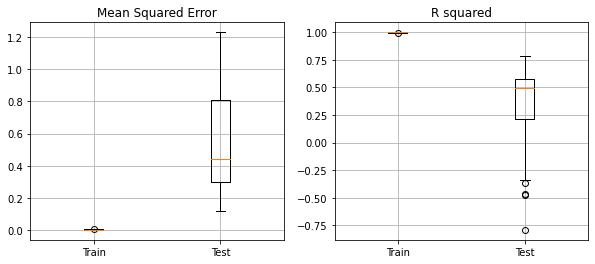

Train MSE standard deviation: 0.0012447075801574495
Test MSE standard deviation:  0.30006705392497607

Train_R2 standard deviation: 0.0010763067673912345
Test_R2 standard deviation:  0.31742820410506384


In [125]:
####################.JUAN'S MULTIPLE RUNS ##################

Multiple_Runs(model,X_train,y_train,X_test, y_test)

### get_param

In [126]:
print(model.get_params()) 

{'loss_function': 'RMSE', 'eval_metric': 'RMSE', 'n_estimators': 100}


In [127]:
model.feature_importances_

array([28.14398381, 30.72369124, 20.07129381, 21.06103114])

### Catboost Model 1 saved

In [128]:
model.save_model('cat_model_1.cbm')

In [129]:
CatBoostClassifier?

Object `CatBoostClassifier` not found.


# Tuning Catboost

https://medium.com/aiplusoau/hyperparameter-tuning-a5fe69d2a6c7

*   Hyper parameter is set before training. Set mauanually
*   Parameter is adjusted during training. Auto Adjusted

*   There are 3 methods:
      * Manual
      * Grid Search
      * Ronomized Search

**Manaul**:
  



In [130]:
# Want to see the "parameters" Put a "?" after the model.
# Apparently all of the parameters are set to default
model?

# Brian's  Algorythm 

# Dashboard

*  Dash
*  Other ones?

https://towardsdatascience.com/deep-dive-into-catboost-functionalities-for-model-interpretation-7cdef669aeed